In [1]:
%matplotlib inline
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Input
from keras.layers.convolutional import Conv1D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, LSTM, Embedding, Reshape, Flatten, concatenate
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils, plot_model
from keras.preprocessing import text
from IPython.display import Image
from keras.initializers import glorot_normal
from keras.optimizers import SGD, Adam, Adagrad
import xgboost
from sklearn.metrics import roc_curve, auc
import os

Using TensorFlow backend.
/home/a/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(42)

In [3]:
trn_1 = pd.read_csv("awidtrainingalmostfull")

/home/a/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,80,81,88,89,90,92,93,94,95,96,97,98,99,100,101,102,107,110,117,119,120,121,122,140,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
to_int16 = ['radiotap.present.reserved', 'wlan.fc.type_subtype', 'wlan.fc.ds', 'wlan_mgt.fixed.capabilities.cfpoll.ap', 'wlan_mgta.fixed.listen_ival', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp', 
'wlan_mgt.fixed.aid', 'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth_seq', 'wlan_mgt.fixed.htact', 'wlan_mgt.fixed.chanwidth', 'wlan_mgt.tim.bmapctl.offset', 'wlan_mgt.country_info.environment', 
'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 'wlan_mgt.rsn.capabilities.gtksa_replay_counter', 'wlan.wep.iv', 'wlan.wep.icv', 'wlan.qos.ack' ]
to_drop = ['frame.interface_id', 'frame.dlt', 'wlan.ra', 'wlan.da', 'wlan.ta', 'wlan.sa', 'wlan.bssid', 'wlan.ba.bm', 'wlan_mgt.fixed.current_ap', 
'wlan_mgt.ssid', 'wlan.tkip.extiv', 'wlan.ccmp.extiv', 'radiotap.dbm_antsignal', 'wlan_mgt.fixed.sequence' ]
to_drop2 = ['frame.interface_id','frame.dlt','frame.offset_shift','frame.time_delta_displayed','frame.cap_len','frame.marked','frame.ignored','radiotap.version','radiotap.pad','radiotap.length','radiotap.present.tsft','radiotap.present.flags','radiotap.present.rate','radiotap.present.channel','radiotap.present.fhss','radiotap.present.dbm_antsignal','radiotap.present.dbm_antnoise','radiotap.present.lock_quality','radiotap.present.tx_attenuation','radiotap.present.db_tx_attenuation','radiotap.present.dbm_tx_power','radiotap.present.antenna','radiotap.present.db_antsignal','radiotap.present.db_antnoise','radiotap.present.rxflags','radiotap.present.xchannel','radiotap.present.mcs','radiotap.present.ampdu','radiotap.present.vht','radiotap.present.reserved','radiotap.present.rtap_ns','radiotap.present.vendor_ns','radiotap.present.ext','radiotap.flags.cfp','radiotap.flags.preamble','radiotap.flags.wep','radiotap.flags.frag','radiotap.flags.fcs','radiotap.flags.datapad','radiotap.flags.badfcs','radiotap.flags.shortgi','radiotap.channel.freq','radiotap.channel.type.turbo','radiotap.channel.type.cck','radiotap.channel.type.ofdm','radiotap.channel.type.2ghz','radiotap.channel.type.5ghz','radiotap.channel.type.passive','radiotap.channel.type.dynamic','radiotap.channel.type.gfsk','radiotap.channel.type.gsm','radiotap.channel.type.sturbo','radiotap.channel.type.half','radiotap.channel.type.quarter','radiotap.dbm_antsignal','radiotap.antenna','radiotap.rxflags.badplcp','wlan.fc.type_subtype','wlan.fc.version','wlan.fc.ds','wlan.fc.moredata','wlan.fc.order','wlan.ra','wlan.da','wlan.ta','wlan.sa','wlan.bssid','wlan.bar.type','wlan.ba.control.ackpolicy','wlan.ba.control.multitid','wlan.ba.control.cbitmap','wlan.bar.compressed.tidinfo','wlan.ba.bm','wlan.fcs_good','wlan_mgt.fixed.capabilities.ess','wlan_mgt.fixed.capabilities.ibss','wlan_mgt.fixed.capabilities.cfpoll.ap','wlan_mgt.fixed.capabilities.agility','wlan_mgt.fixed.capabilities.apsd','wlan_mgt.fixed.capabilities.radio_measurement','wlan_mgt.fixed.capabilities.dsss_ofdm','wlan_mgt.fixed.capabilities.del_blk_ack','wlan_mgt.fixed.capabilities.imm_blk_ack','wlan_mgt.fixed.listen_ival','wlan_mgt.fixed.current_ap','wlan_mgt.fixed.status_code','wlan_mgt.fixed.timestamp','wlan_mgt.fixed.aid','wlan_mgt.fixed.reason_code','wlan_mgt.fixed.auth_seq','wlan_mgt.fixed.category_code','wlan_mgt.fixed.htact','wlan_mgt.fixed.chanwidth','wlan_mgt.fixed.fragment','wlan_mgt.fixed.sequence','wlan_mgt.tagged.all','wlan_mgt.ssid','wlan_mgt.ds.current_channel','wlan_mgt.tim.dtim_period','wlan_mgt.tim.bmapctl.multicast','wlan_mgt.tim.bmapctl.offset','wlan_mgt.country_info.environment','wlan_mgt.rsn.gcs.type','wlan_mgt.rsn.pcs.count','wlan_mgt.rsn.akms.count','wlan_mgt.rsn.akms.type','wlan_mgt.rsn.capabilities.preauth','wlan_mgt.rsn.capabilities.no_pairwise','wlan_mgt.rsn.capabilities.ptksa_replay_counter','wlan_mgt.rsn.capabilities.gtksa_replay_counter','wlan_mgt.rsn.capabilities.mfpr','wlan_mgt.rsn.capabilities.mfpc','wlan_mgt.rsn.capabilities.peerkey','wlan_mgt.tcprep.trsmt_pow','wlan_mgt.tcprep.link_mrg','wlan.wep.icv','wlan.tkip.extiv','wlan.ccmp.extiv','wlan.qos.tid','wlan.qos.priority','wlan.qos.eosp','wlan.qos.ack','wlan.qos.amsdupresent','wlan.qos.buf_state_indicated','wlan.qos.bit4','wlan.qos.txop_dur_req','wlan.qos.buf_state_indicated']
float_col = ['frame.time_epoch', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_relative']
bools = [
    "wlan.fc.frag", "wlan.fc.retry", "wlan.fc.pwrmgt", "wlan.fc.protected", "wlan_mgt.fixed.capabilities.privacy", 
    "wlan_mgt.fixed.capabilities.preamble", "wlan_mgt.fixed.capabilities.pbcc", "wlan_mgt.fixed.capabilities.spec_man", 
    "wlan_mgt.fixed.capabilities.short_slot_time", "wlan.qos.buf_state_indicated.1", 'frame.marked', 'radiotap.present.tsft',
    "radiotap.present.flags", "radiotap.present.rate", "radiotap.present.channel", "radiotap.present.fhss", "radiotap.present.dbm_antsignal",
    "radiotap.present.dbm_antnoise", "radiotap.present.lock_quality", "radiotap.present.tx_attenuation",
    "radiotap.present.dbm_tx_power", "radiotap.present.db_antsignal", "radiotap.present.db_antnoise", "radiotap.present.rxflags",
    "radiotap.present.xchannel", "radiotap.present.mcs", "radiotap.present.ampdu", "radiotap.present.vht",
    "radiotap.present.rtap_ns", "radiotap.present.ext", "radiotap.flags.cfp", "radiotap.flags.preamble", 
    "radiotap.flags.wep","radiotap.flags.frag","radiotap.flags.fcs","radiotap.flags.datapad","radiotap.flags.badfcs",
    "radiotap.flags.shortgi", "radiotap.channel.type.turbo","radiotap.channel.type.cck","radiotap.channel.type.ofdm",
    "radiotap.channel.type.2ghz","radiotap.channel.type.5ghz","radiotap.channel.type.passive",
    "radiotap.channel.type.dynamic","radiotap.channel.type.gfsk","radiotap.channel.type.gsm",
    "radiotap.channel.type.sturbo","radiotap.channel.type.half","radiotap.channel.type.quarter", 
    "radiotap.rxflags.badplcp", "wlan.fc.moredata", "wlan.fc.order", "wlan.ba.control.ackpolicy", "wlan.ba.control.multitid",
    "wlan.ba.control.cbitmap", "wlan.fcs_good", "wlan_mgt.fixed.capabilities.ess", "wlan_mgt.fixed.capabilities.ibss",
    "wlan_mgt.fixed.capabilities.cfpoll.ap", "wlan_mgt.fixed.capabilities.agility", "wlan_mgt.fixed.capabilities.apsd",
    "wlan_mgt.fixed.capabilities.radio_measurement", "wlan_mgt.fixed.capabilities.dsss_ofdm", "wlan_mgt.fixed.capabilities.del_blk_ack",
    "wlan_mgt.fixed.capabilities.imm_blk_ack", "wlan_mgt.tim.bmapctl.multicast", "wlan_mgt.rsn.capabilities.preauth",
    "wlan_mgt.rsn.capabilities.no_pairwise", "wlan_mgt.rsn.capabilities.mfpr", "wlan_mgt.rsn.capabilities.mfpc",
    "wlan_mgt.rsn.capabilities.peerkey", "wlan.qos.eosp", "wlan.qos.amsdupresent", "wlan.qos.buf_state_indicated",
    "wlan.qos.bit4", "wlan.qos.buf_state_indicated"
    
]

In [5]:
trn_1.drop(to_drop2, axis=1, inplace=True)

In [6]:
trn_1 = trn_1.replace("?", -1)

In [7]:
for a in trn_1.columns:
    if a != "class":
        try:
            trn_1[a] = trn_1[a].apply(float)
        except:
            trn_1[a] = trn_1[a].apply(lambda x: float(int(str(x), base=16)))
        finally:
            pass

In [8]:
for a in bools:
    if a in trn_1.columns:
        trn_1[a+".is0"] = trn_1[a].apply(lambda x: 1 if x == 0 else 0)
        trn_1[a+".is1"] = trn_1[a].apply(lambda x: 1 if x == 1 else 0)
        trn_1[a+".is-1"] = trn_1[a].apply(lambda x: 1 if x == -1 else 0)

In [9]:
trn_1.drop(bools, axis=1, inplace=True, errors='ignore')

In [10]:
def encode(a, t=0):
    e = {
        "normal": ([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 0),
        "arp":    ([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 1),
        "cafe_latte": ([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 2),
        "amok":   ([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0], 3),
        "deauthentication": ([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0], 4),
        "authentication_request": ([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0], 5),
        "evil_twin": ([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0], 6),
        "beacon": ([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0], 7),
        "probe_response": ([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0], 8),
        "fragmentation": ([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0], 9),
        "probe_request": ([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0], 10),
        "chop_chop":([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0], 11),
        "rts":([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0], 12),
        "cts":([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0], 13),
        "hirte":([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0], 14),
        "power_saving":([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0], 15),
        "disassociation":([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1], 16)
    }
    return(e[a][t])

In [11]:
trn_1["class_1h"] = trn_1["class"].apply(lambda x: encode(x, 0))

In [12]:
trn_1.drop(["class"], axis=1, inplace=True)

In [13]:
np.save("X.npy", trn_1[trn_1.columns[[a != "class_1h" for a in trn_1.columns]]].values)

In [14]:
np.save("Y.npy", trn_1["class_1h"].values)

In [15]:
X = np.load("X.npy").astype(np.float32) 

In [16]:
Y = np.load("Y.npy")

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.99      0.99    537272
          1       1.00      0.99      1.00     13725
          2       0.00      0.00      0.00         0
          3       1.00      0.99      1.00       480
          4       1.00      0.94      0.97      4716
          5       0.00      0.00      0.00         1
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          9       1.00      0.01      0.02     19449
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.95      0.96    575643

0.953099403623


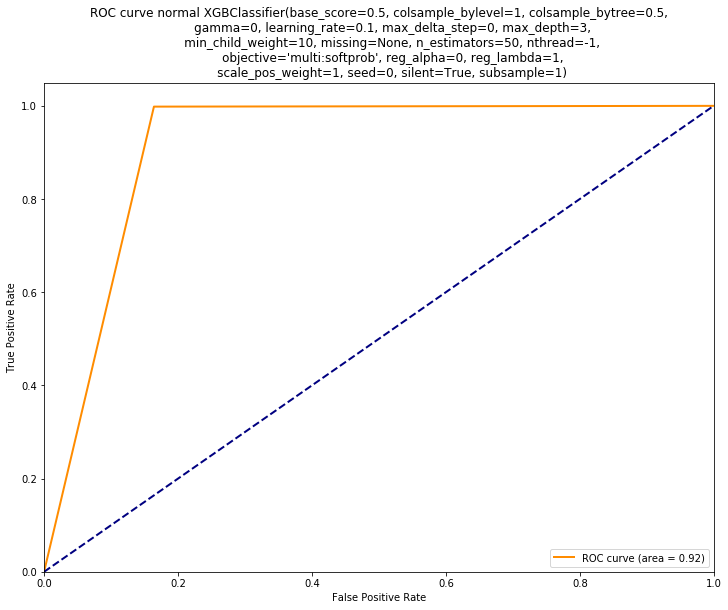

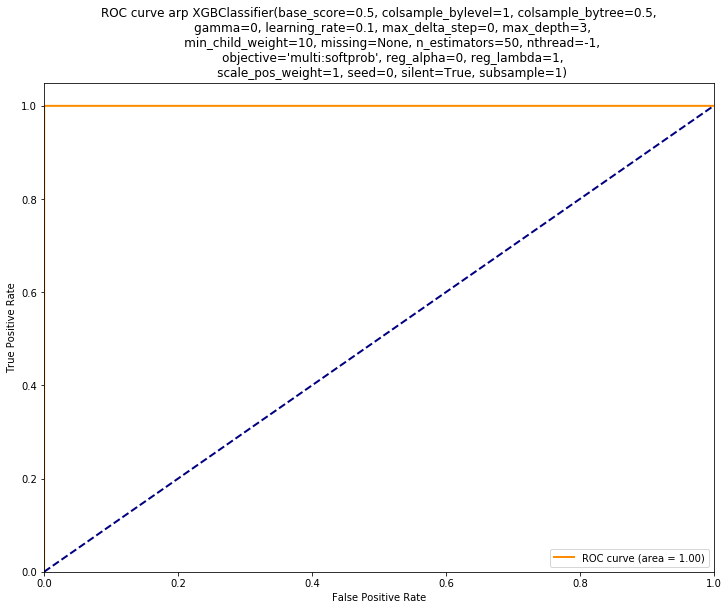

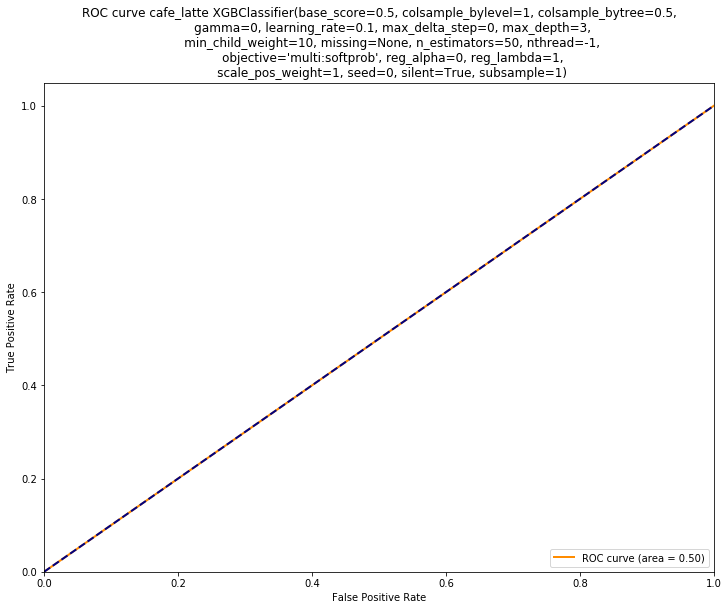

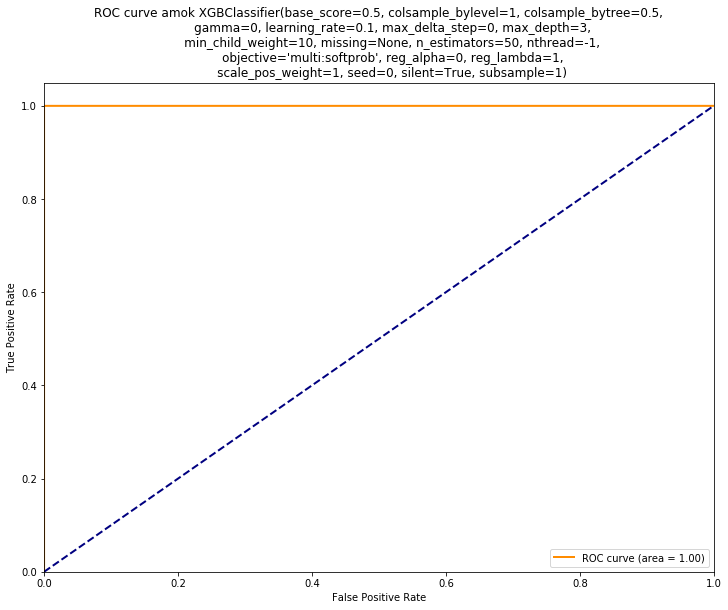

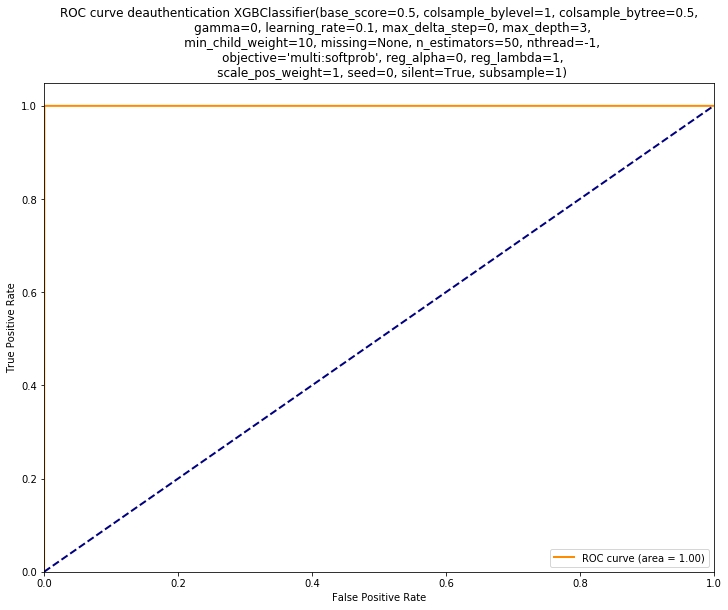

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


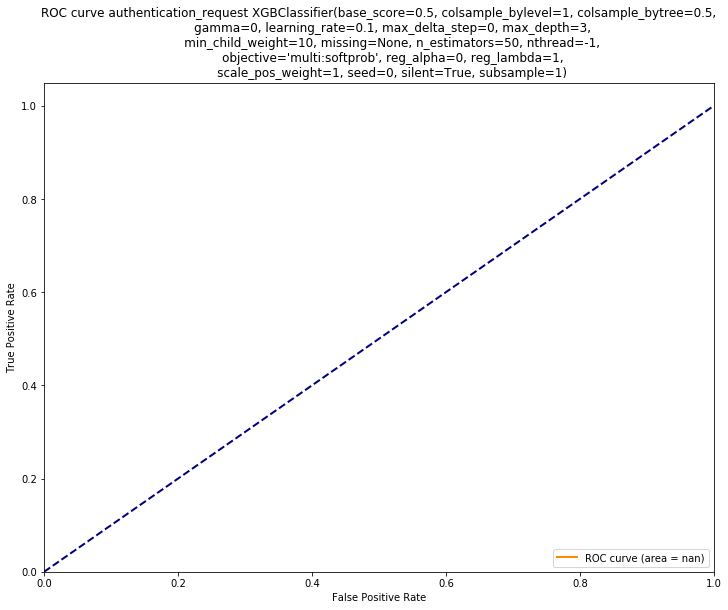

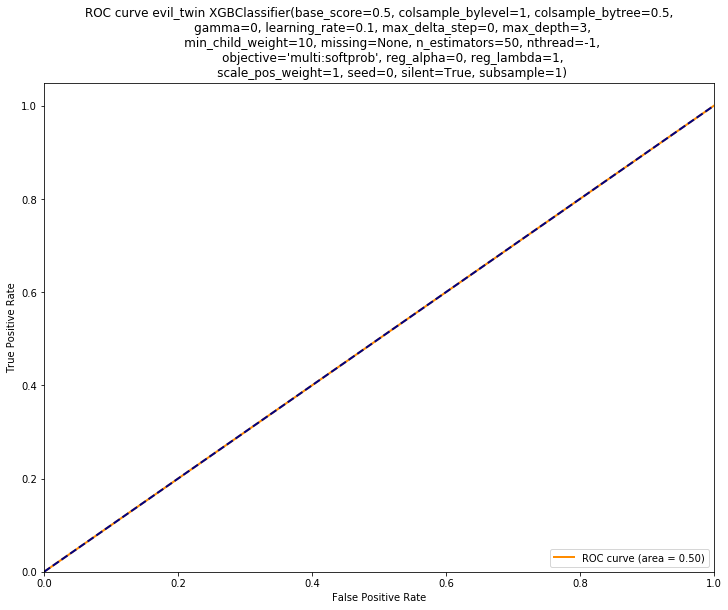

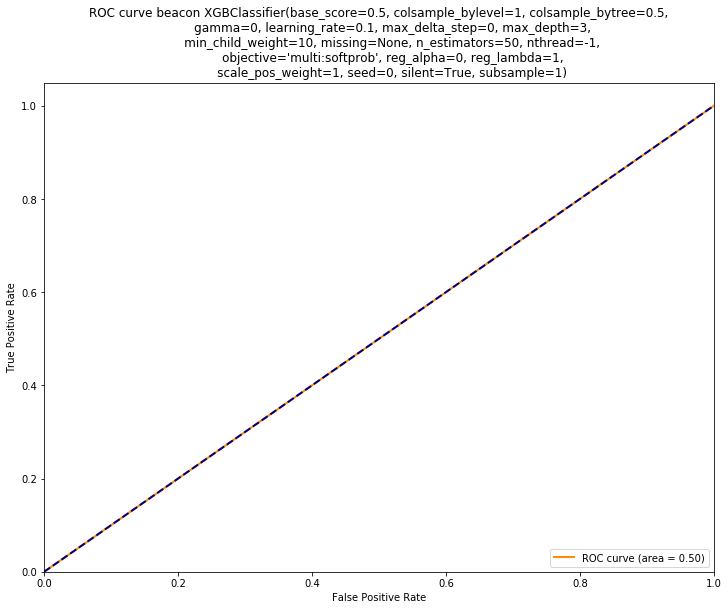

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


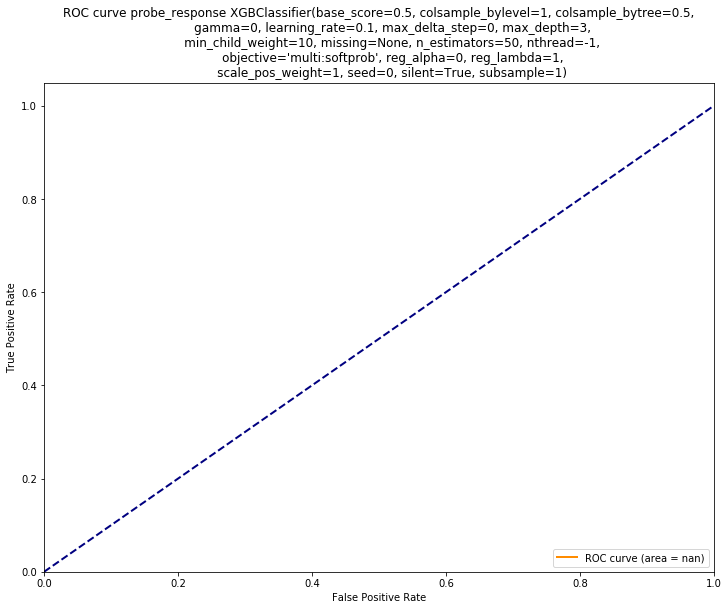

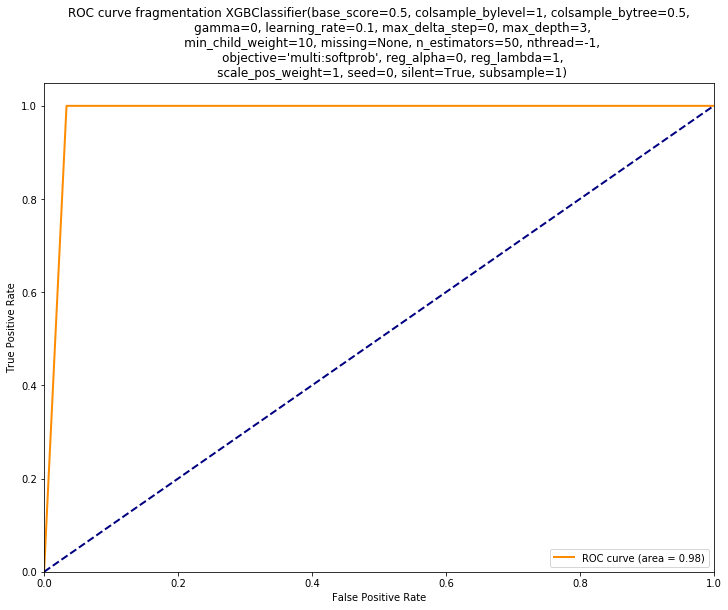

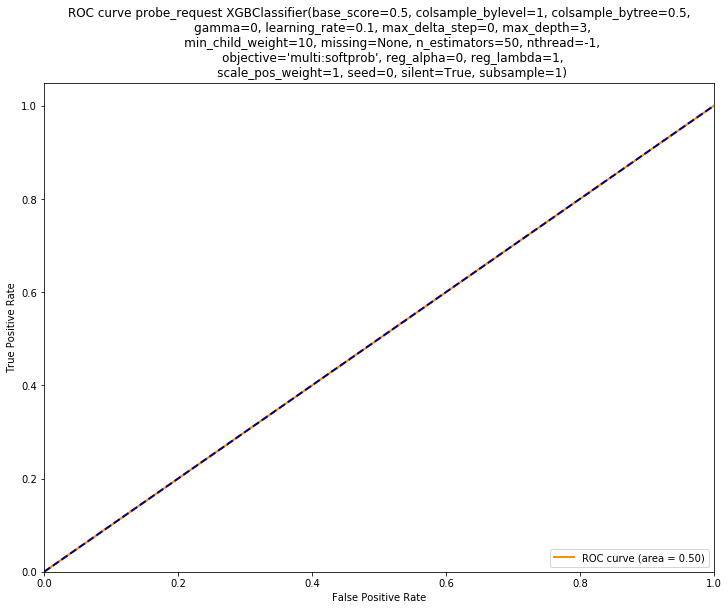

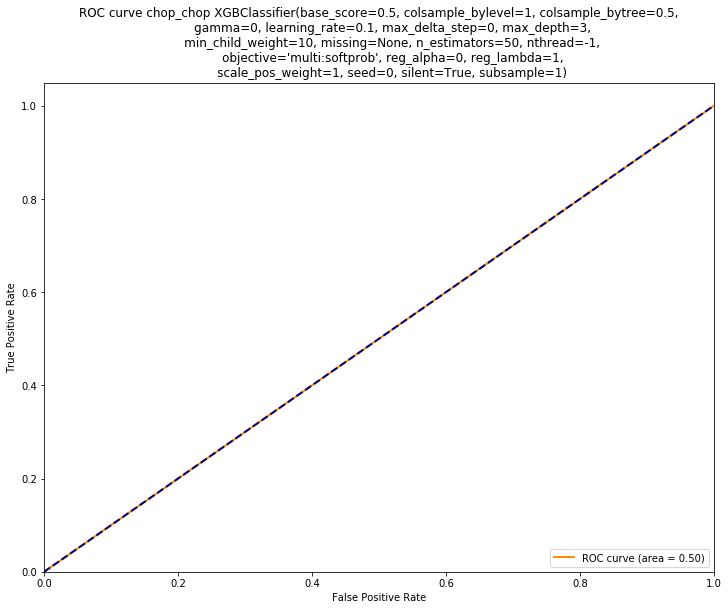

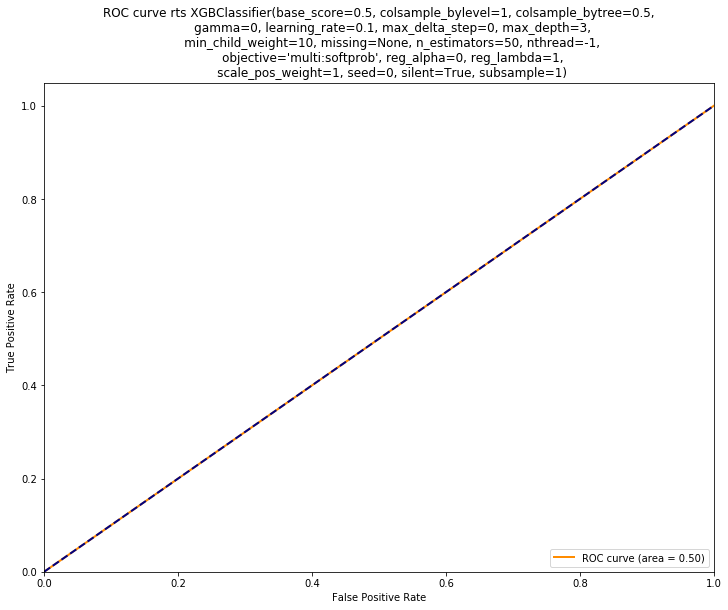

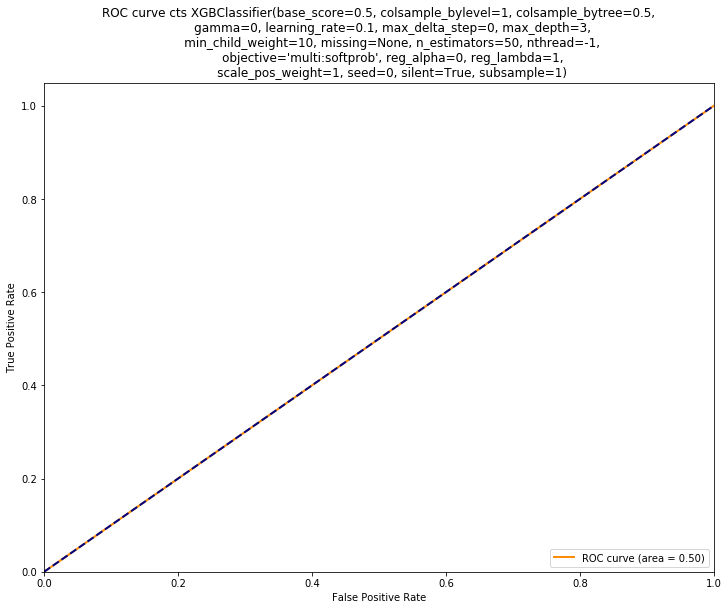

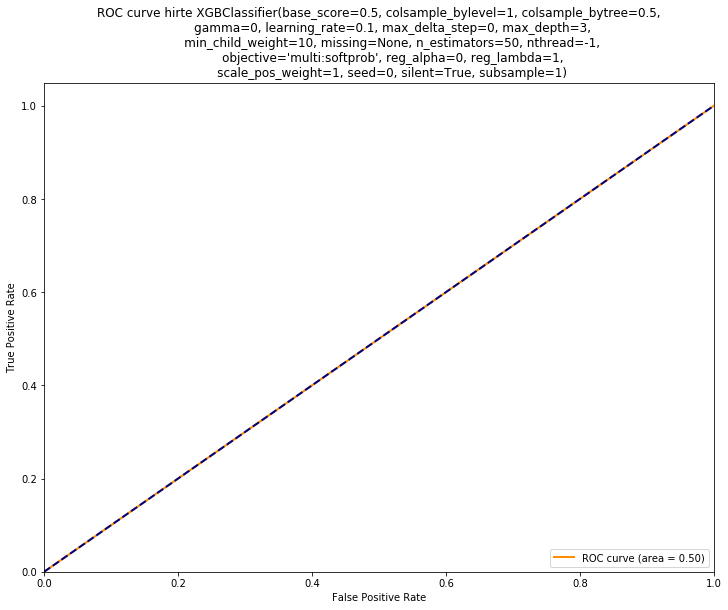

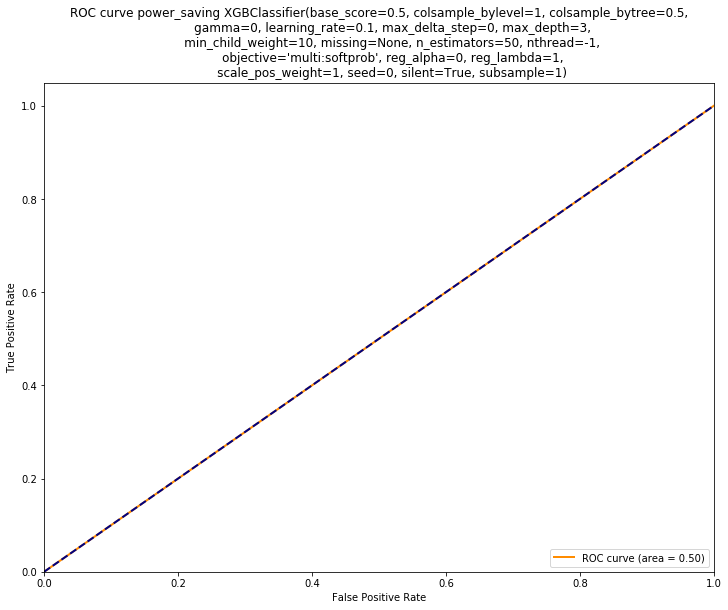

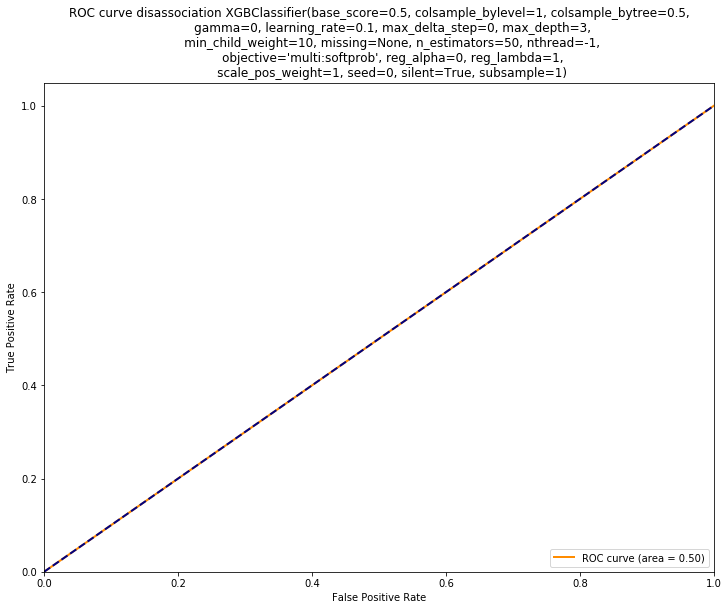

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.99      0.99    533800
          1       1.00      0.99      1.00     13719
          2       0.00      0.00      0.00         0
          3       1.00      1.00      1.00       477
          4       1.00      0.94      0.97      4716
          6       0.82      0.38      0.52      1305
          7       0.94      1.00      0.97       565
          9       1.00      0.01      0.02     21061
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.95      0.96    575643

0.952163059396


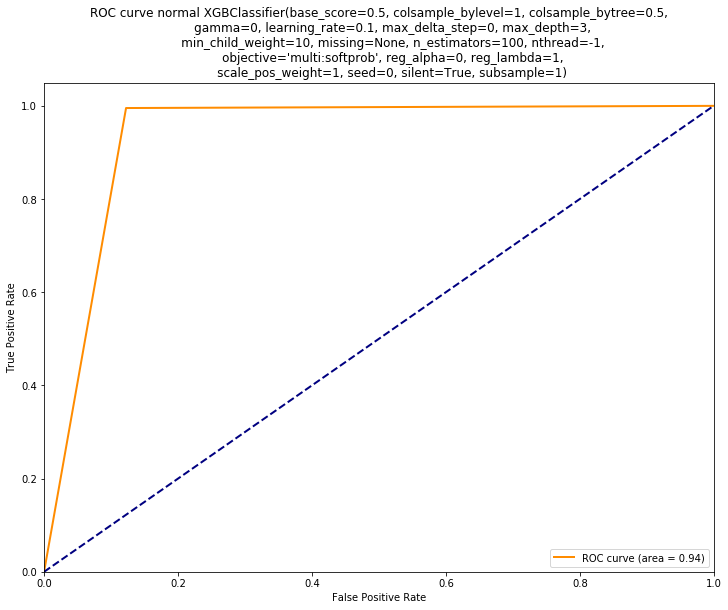

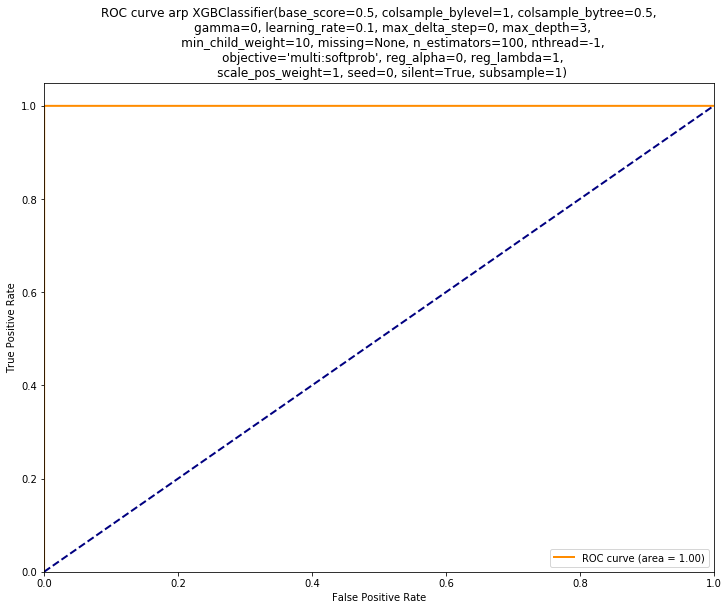

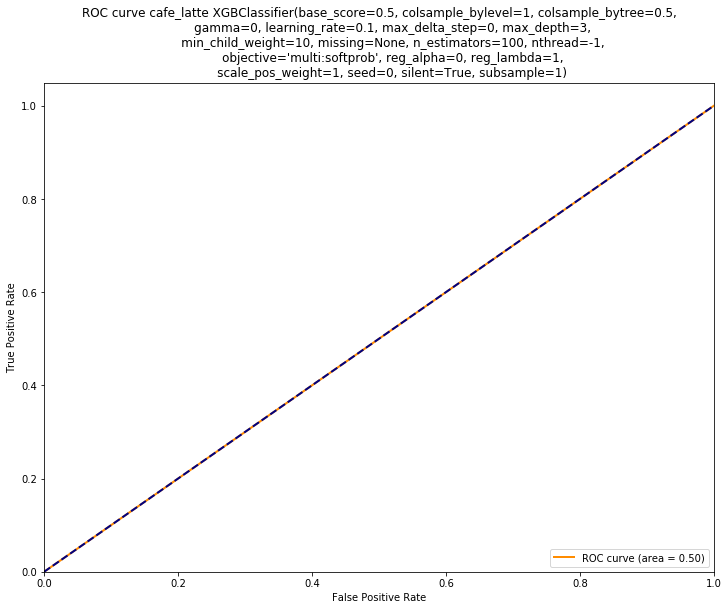

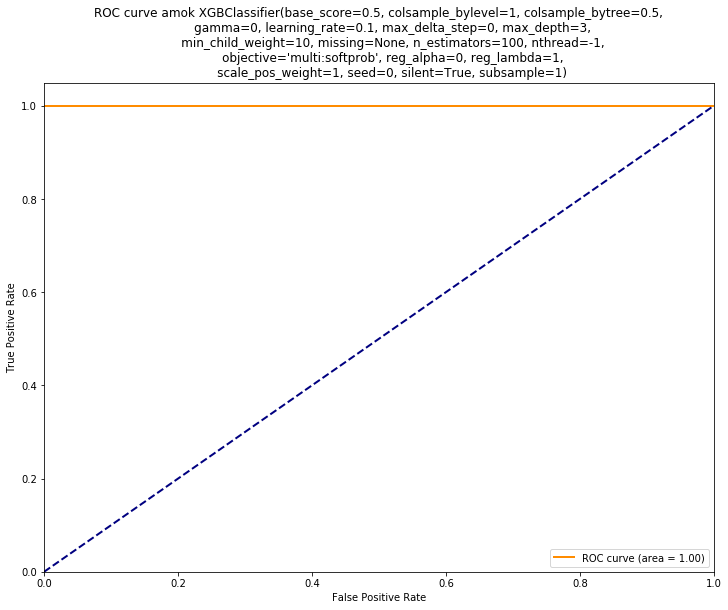

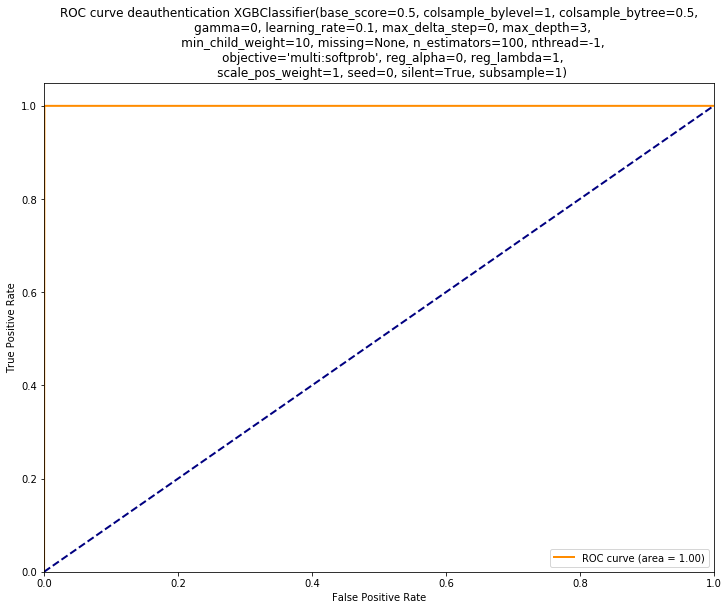

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


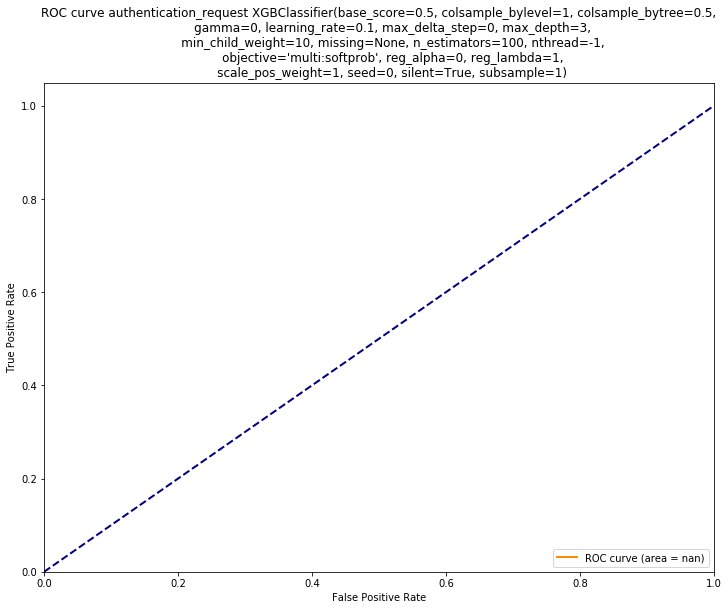

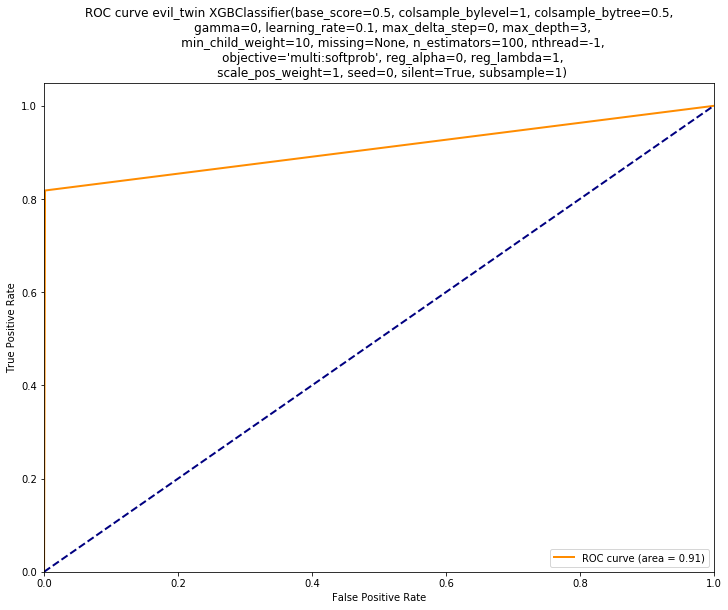

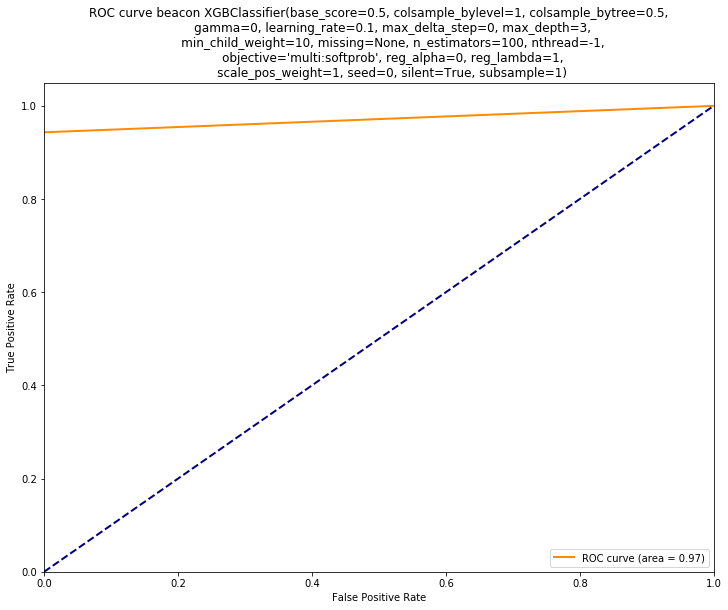

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


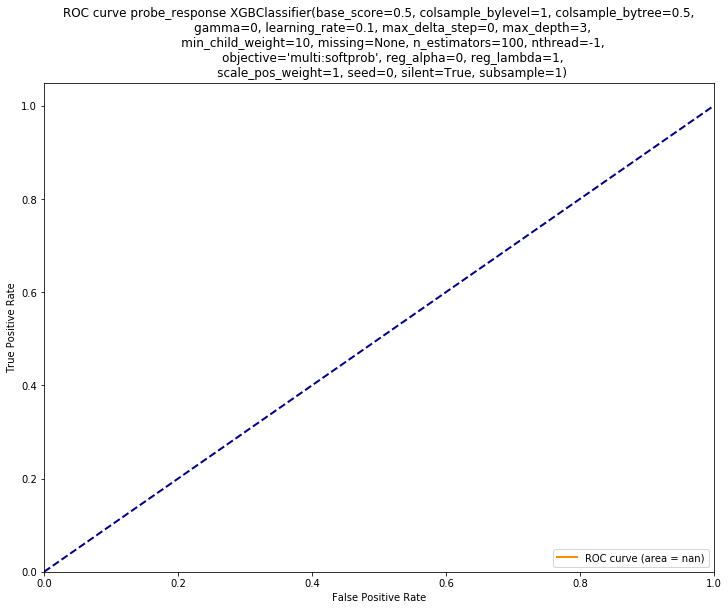

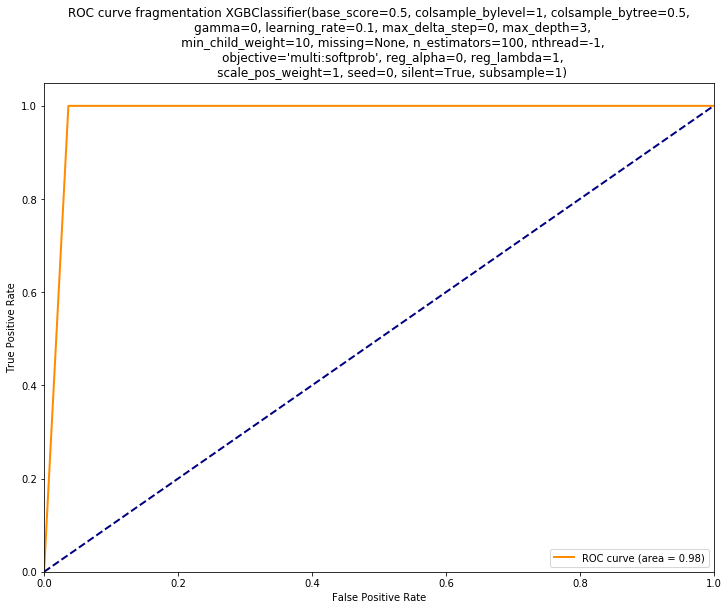

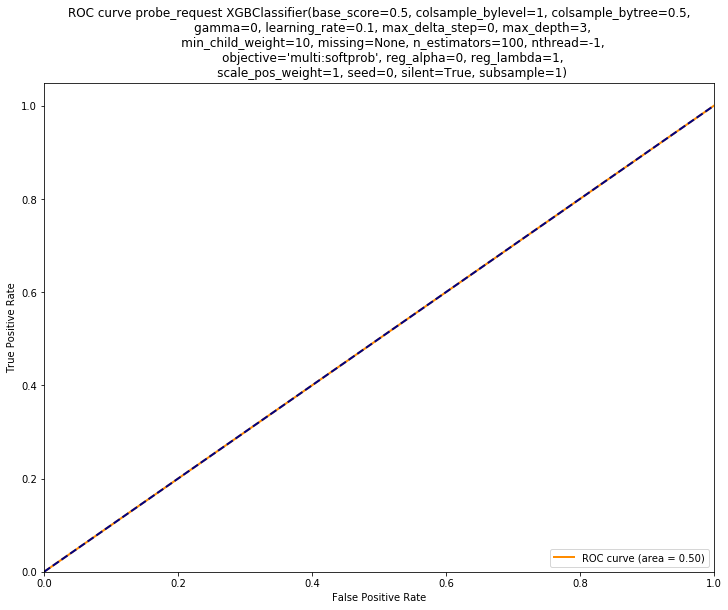

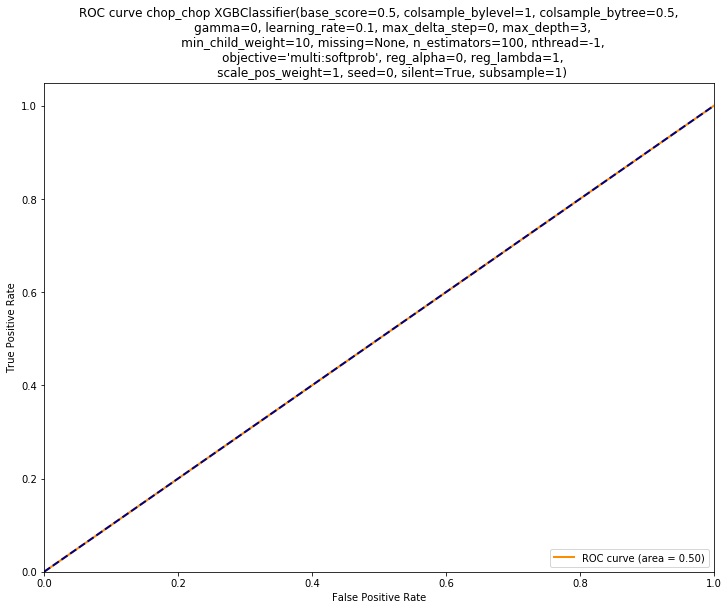

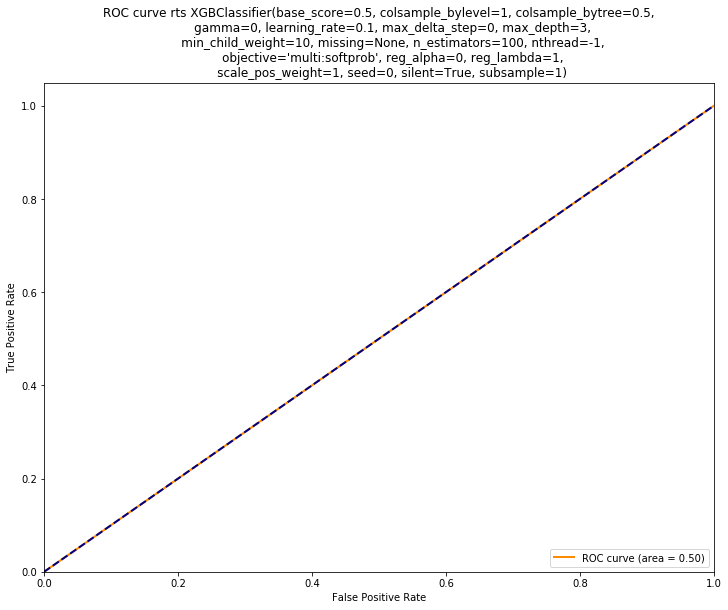

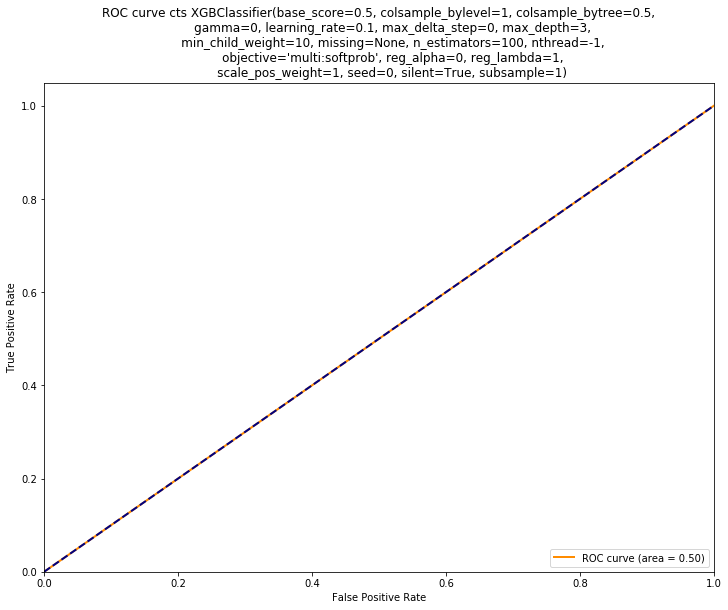

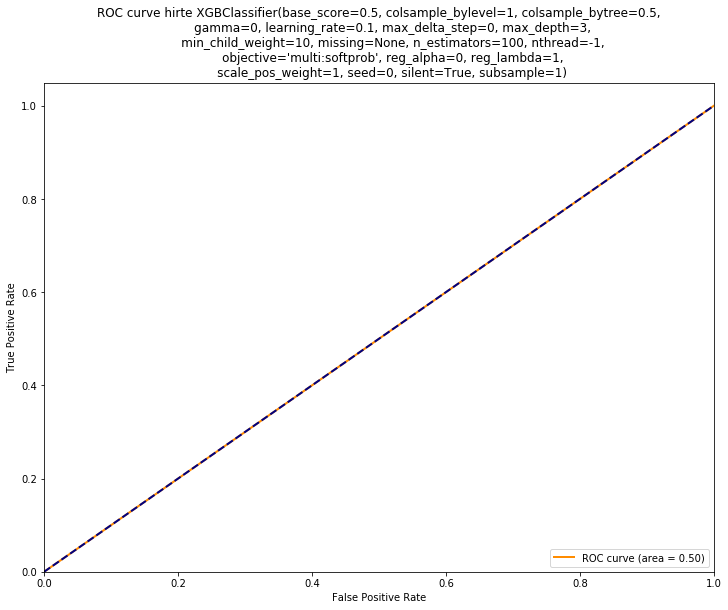

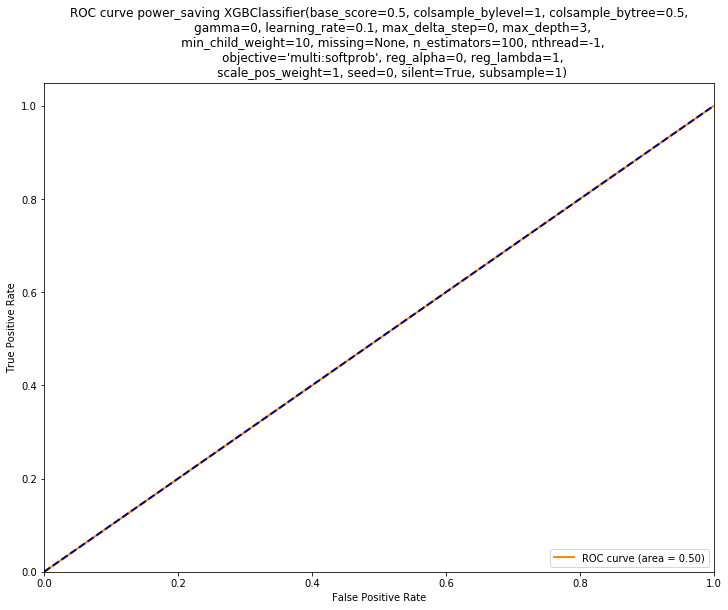

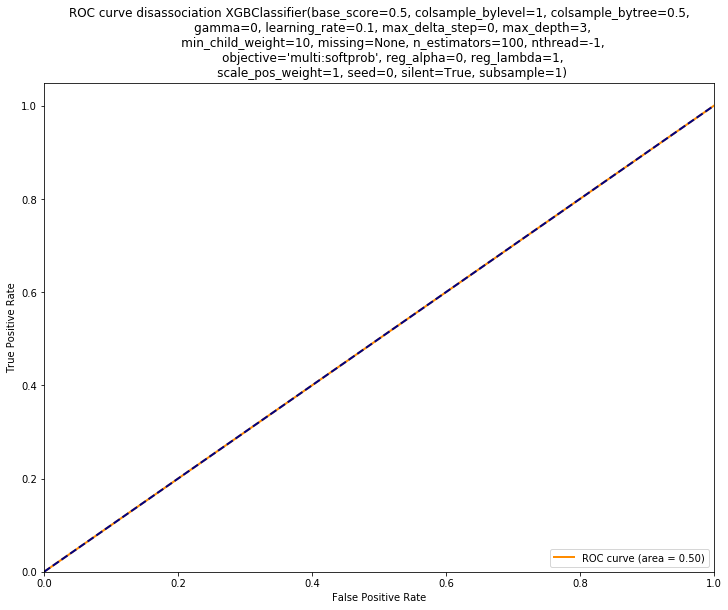

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.99      0.99    535012
          1       1.00      0.99      1.00     13719
          2       0.00      0.00      0.00         0
          3       1.00      1.00      1.00       477
          4       1.00      0.99      1.00      4473
          6       1.00      0.42      0.59      1462
          7       1.00      1.00      1.00       599
          9       1.00      0.01      0.02     19901
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.95      0.96    575643

0.954709776719


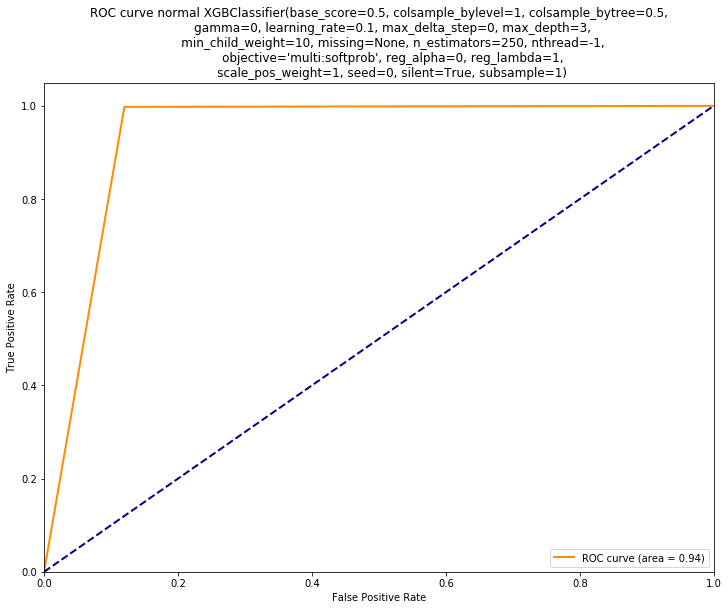

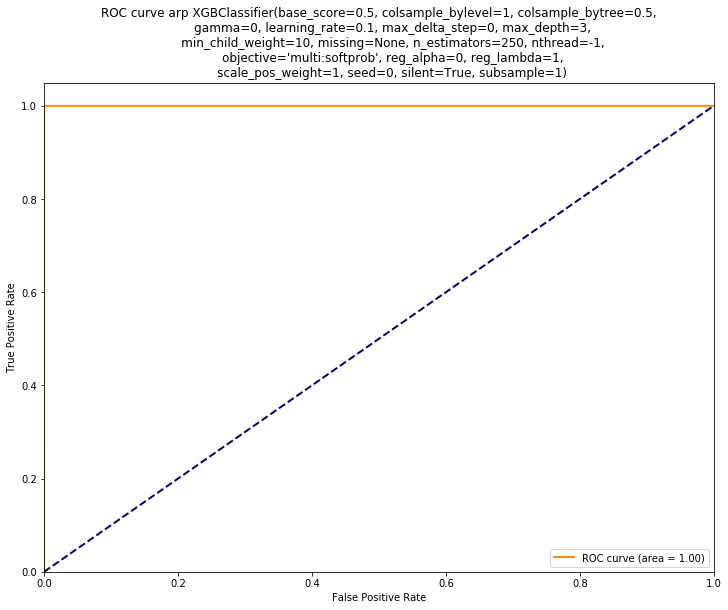

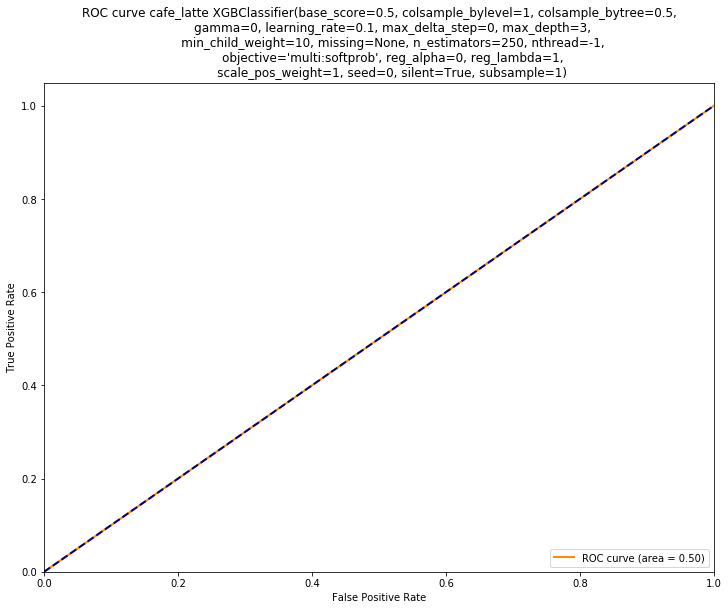

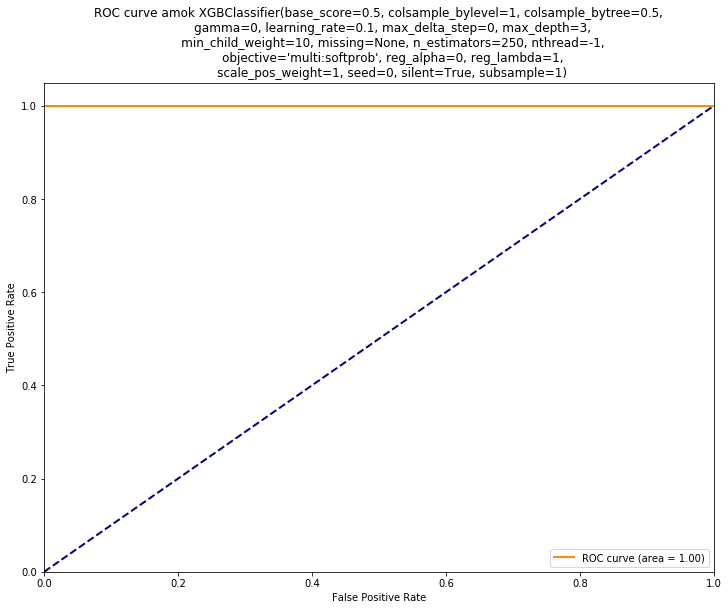

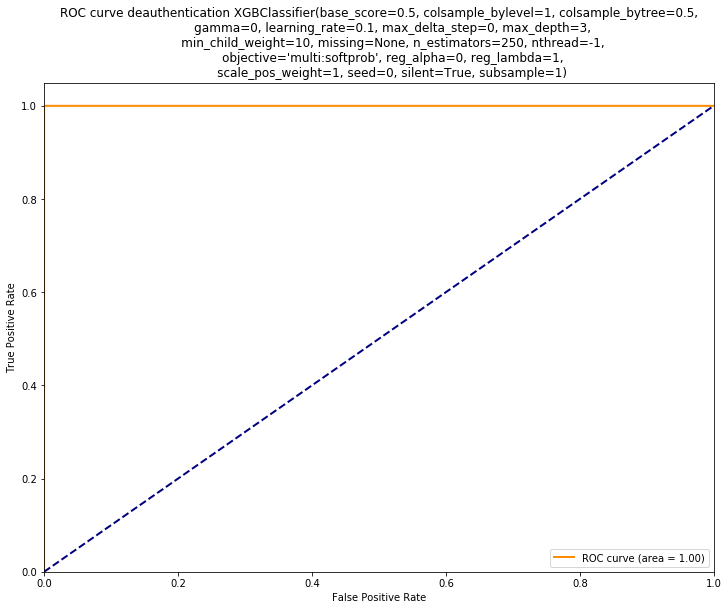

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


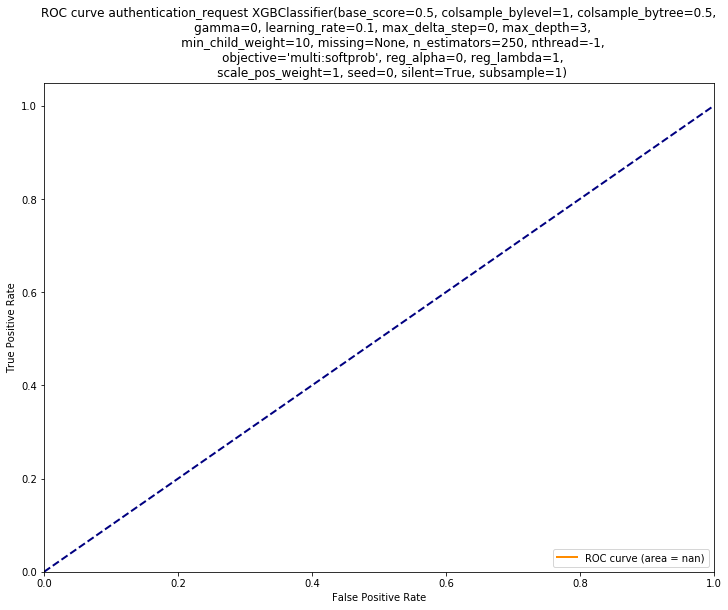

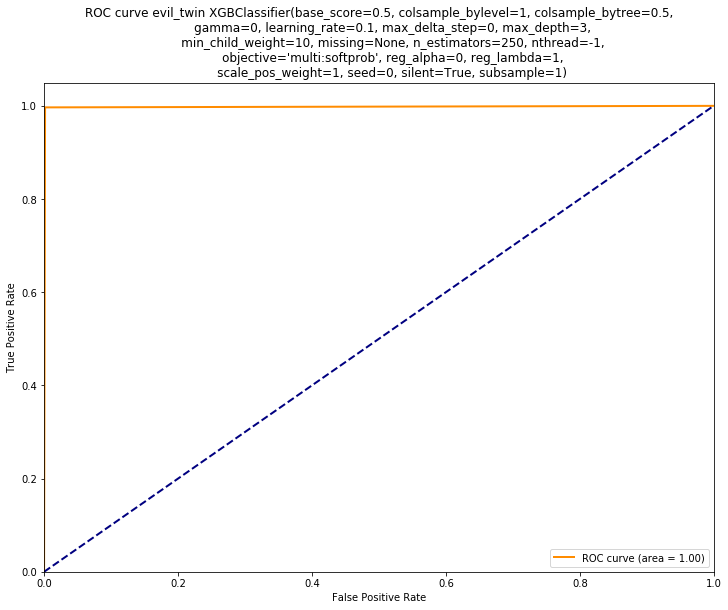

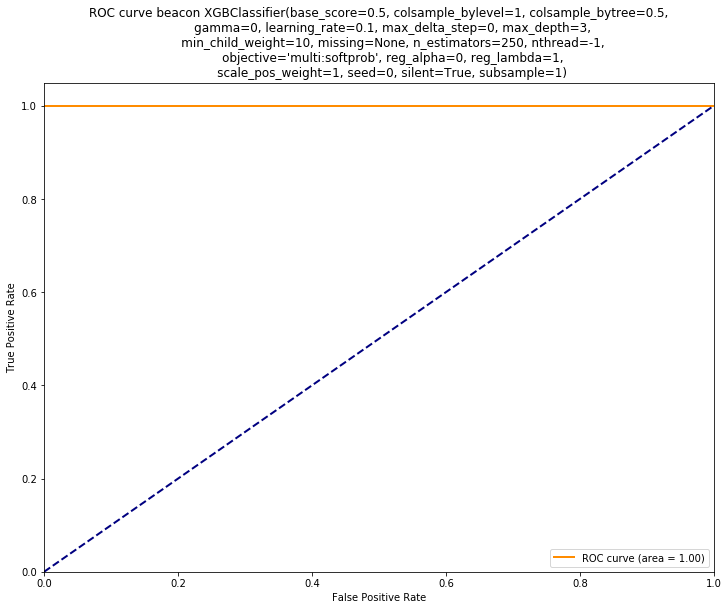

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


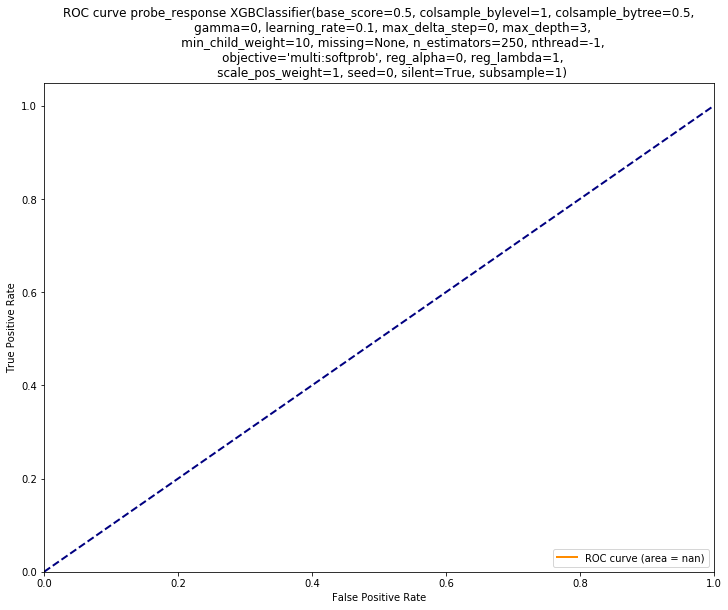

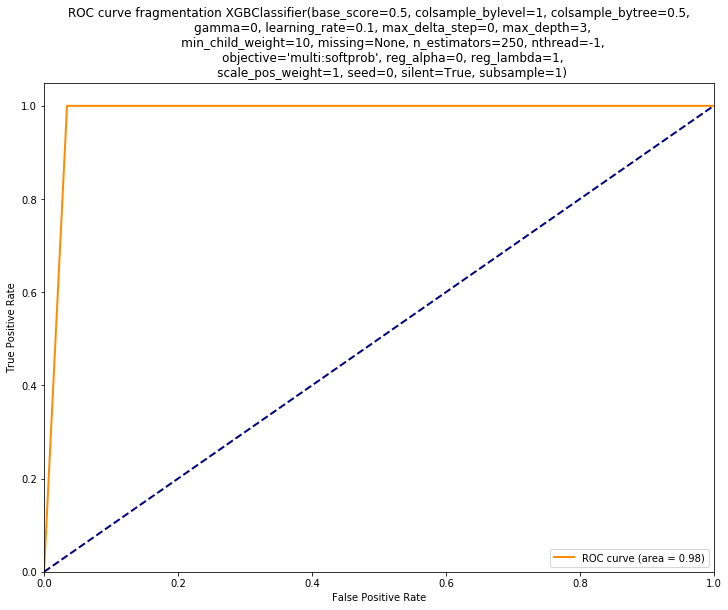

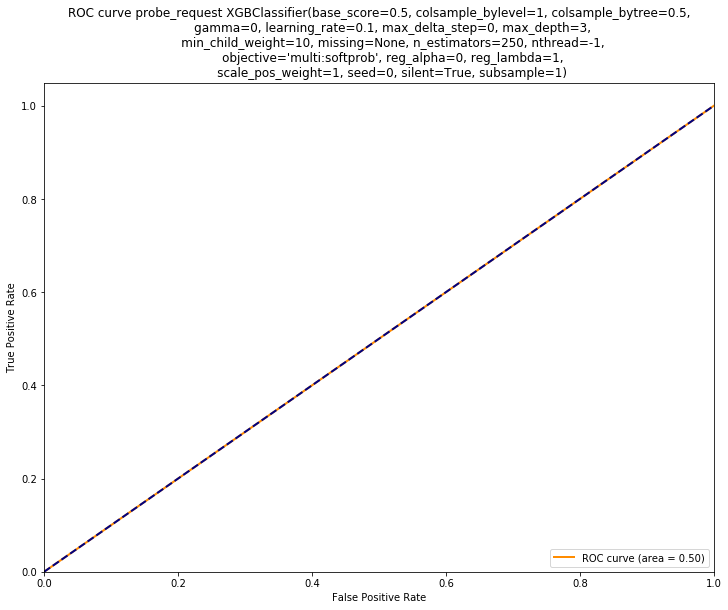

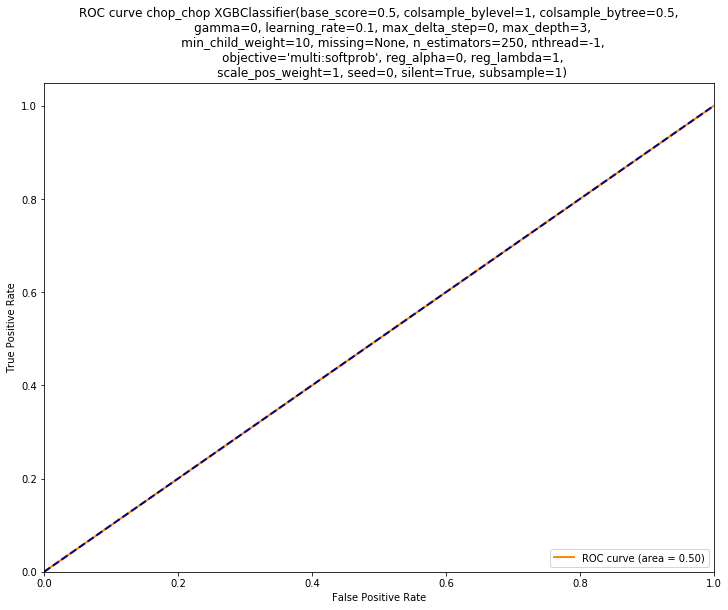

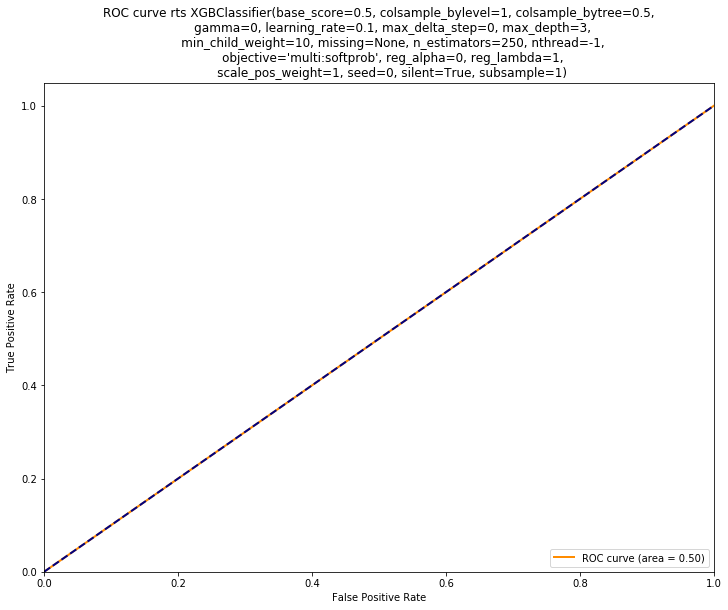

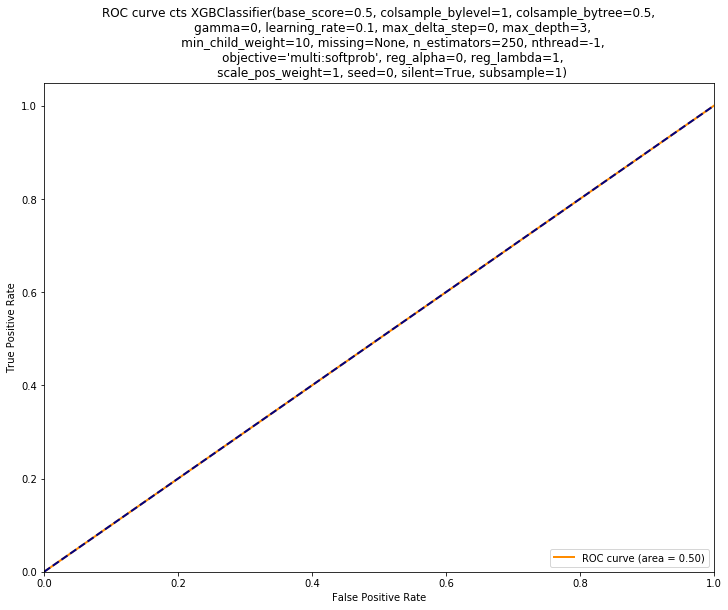

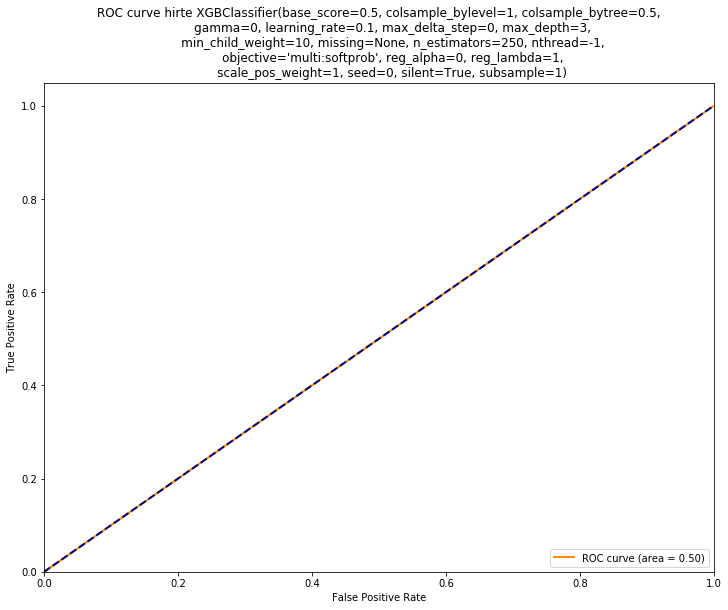

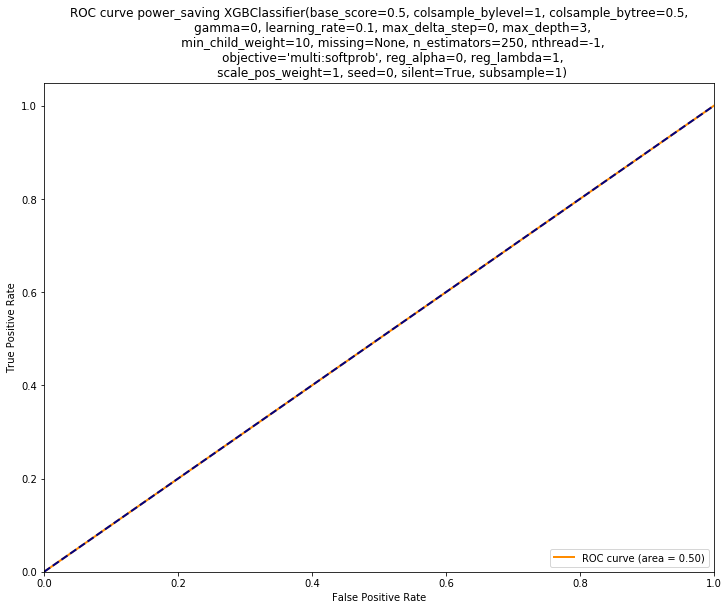

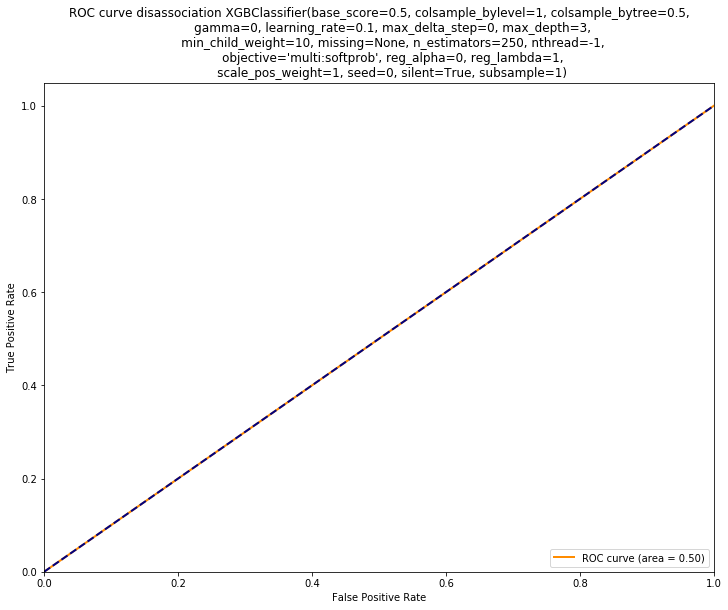

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.99      0.99    537288
          1       1.00      1.00      1.00     13669
          2       0.00      0.00      0.00         0
          3       1.00      1.00      1.00       478
          4       1.00      0.99      0.99      4497
          6       0.00      0.00      0.00         0
          7       1.00      1.00      1.00       599
          9       1.00      0.01      0.02     19112
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.96    575643

0.95504157959


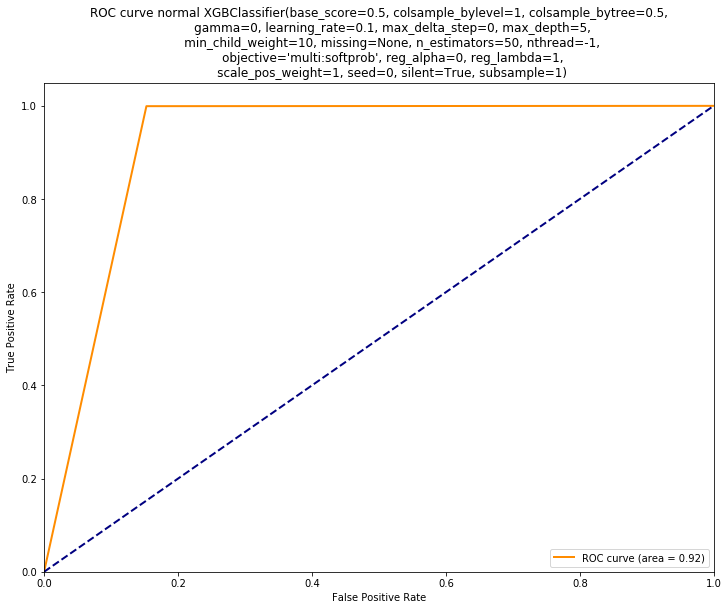

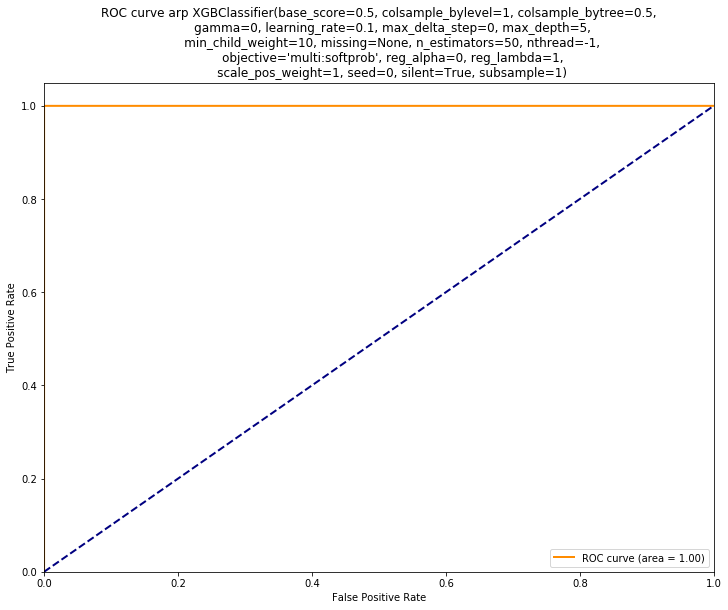

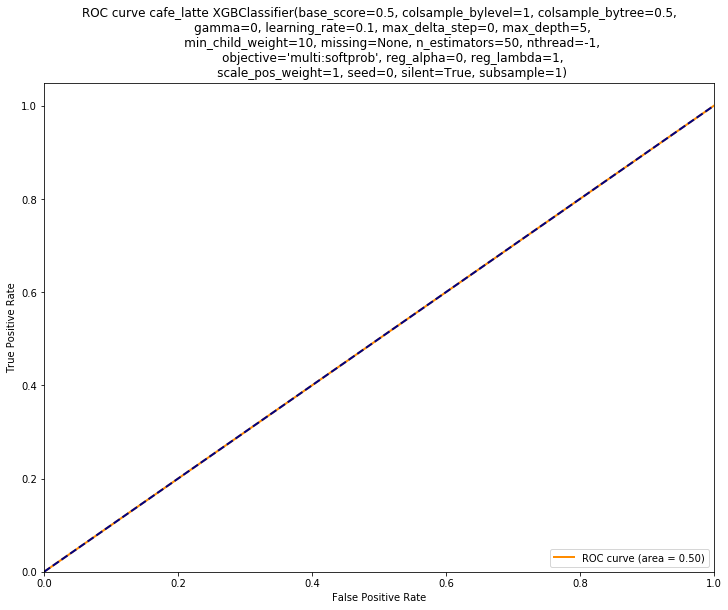

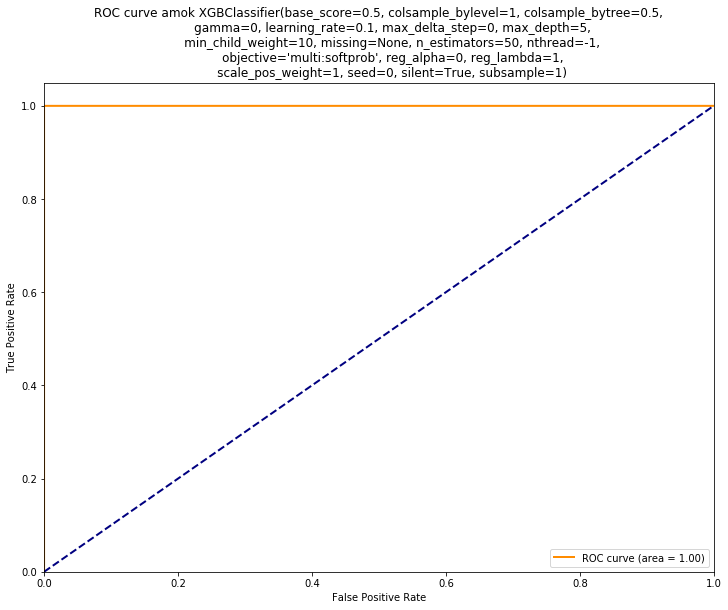

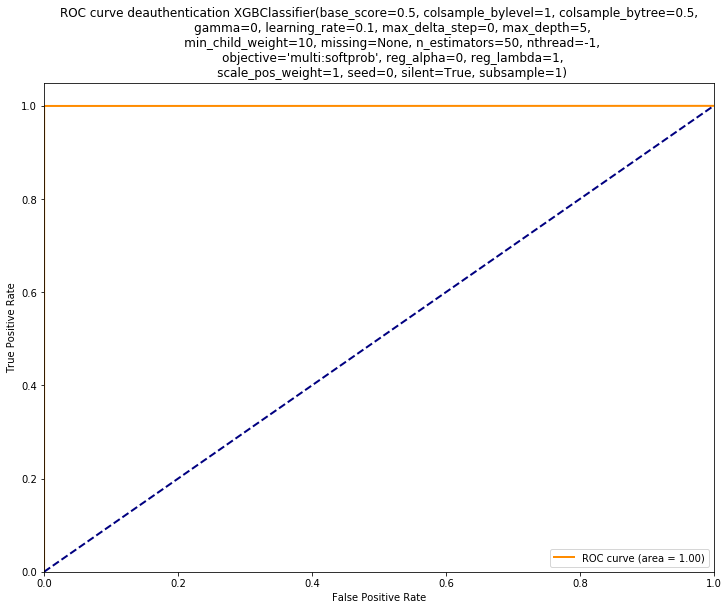

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


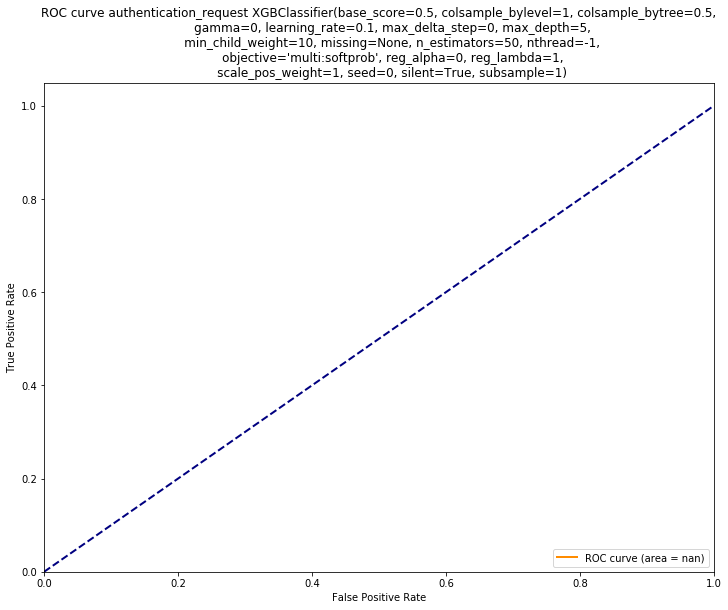

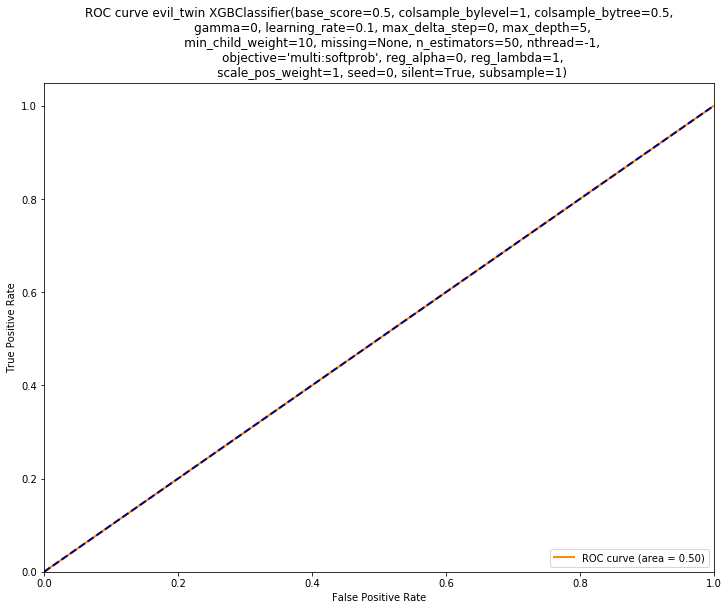

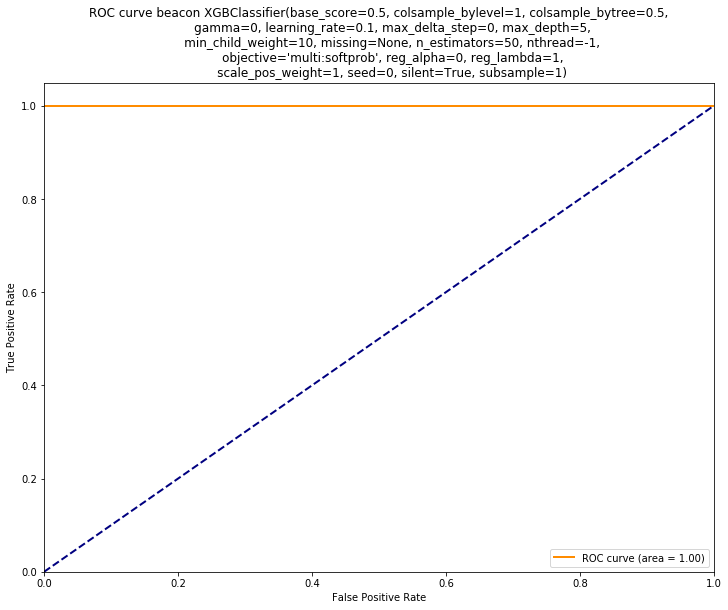

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


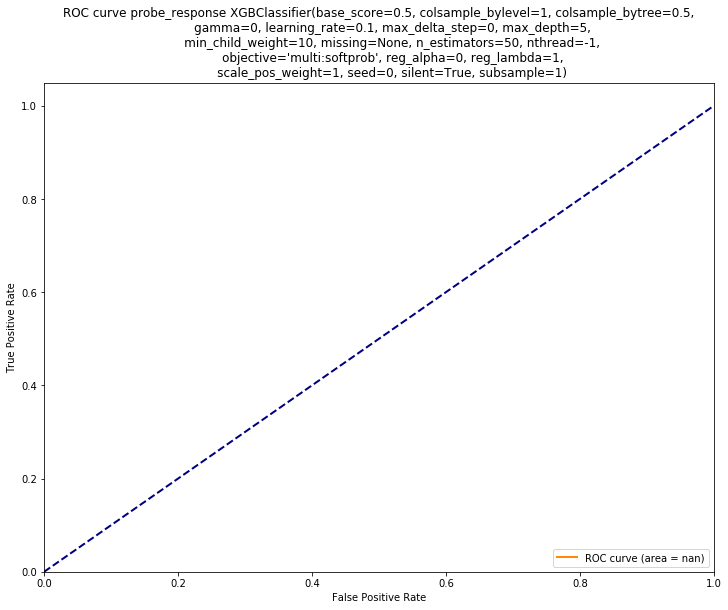

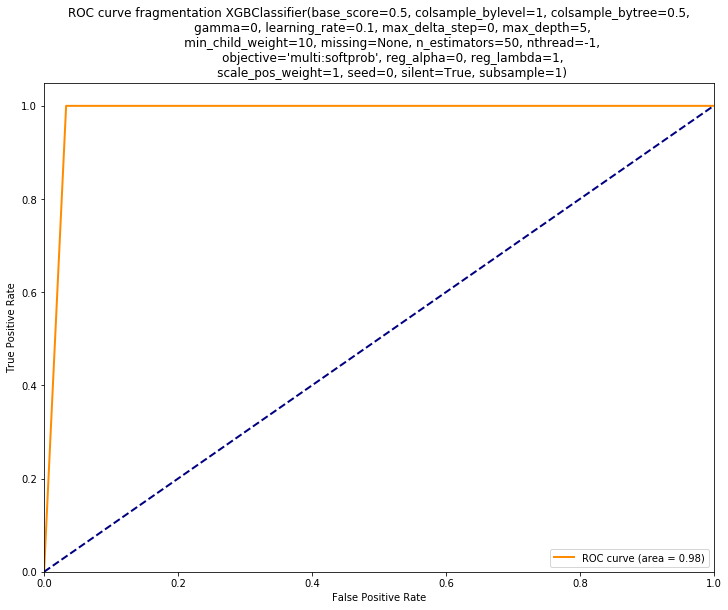

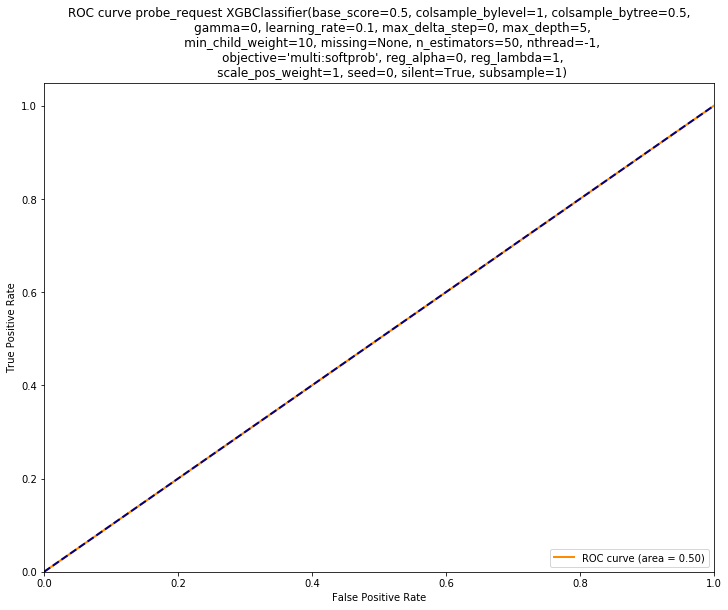

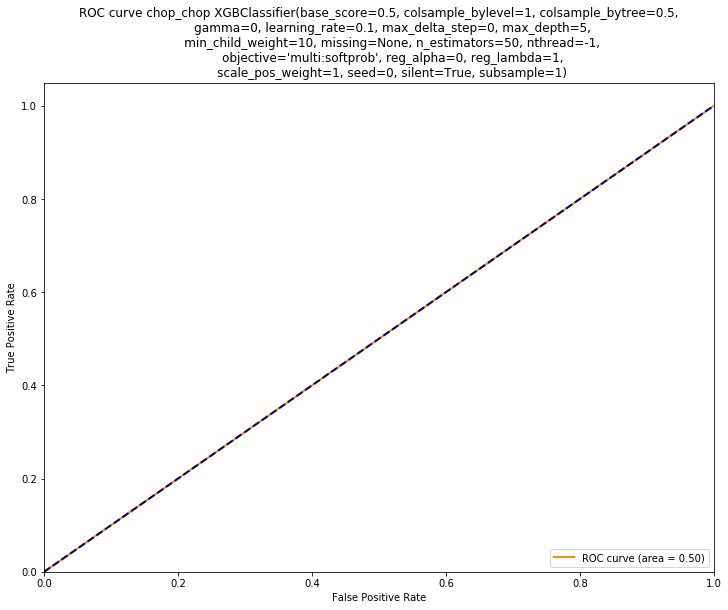

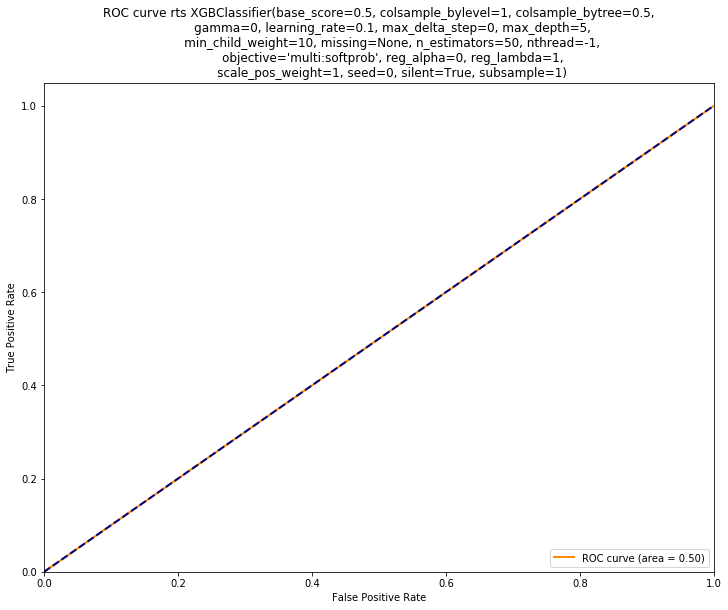

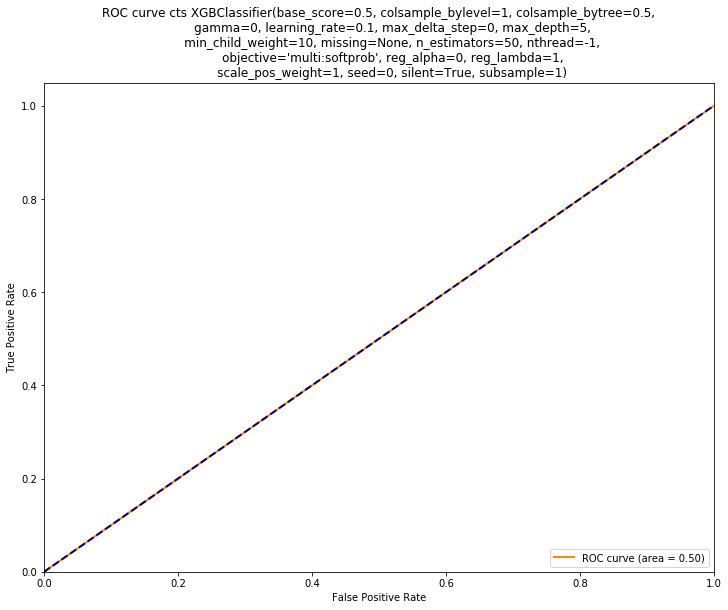

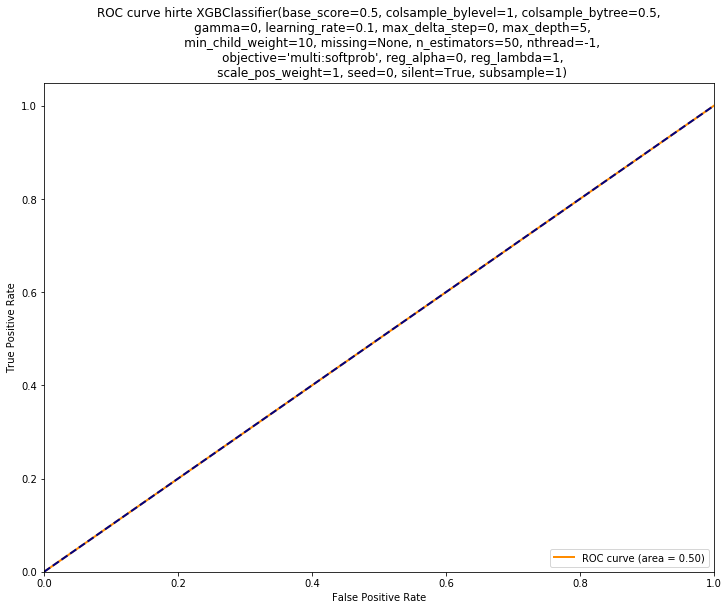

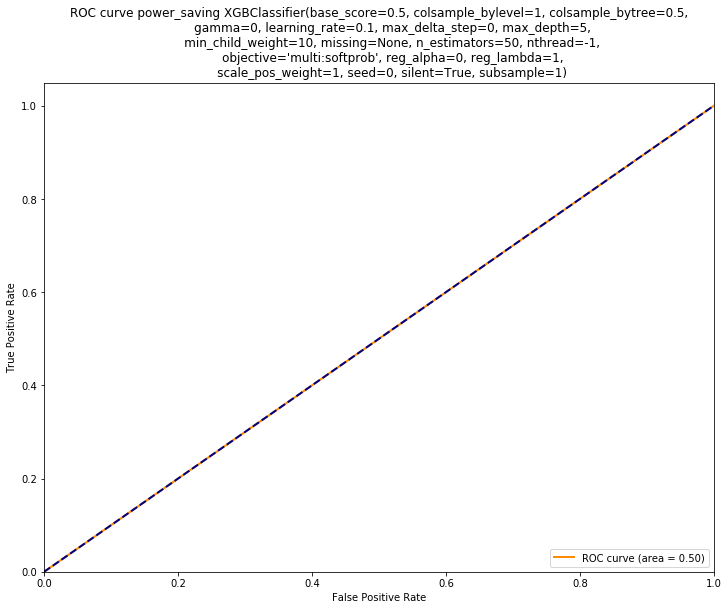

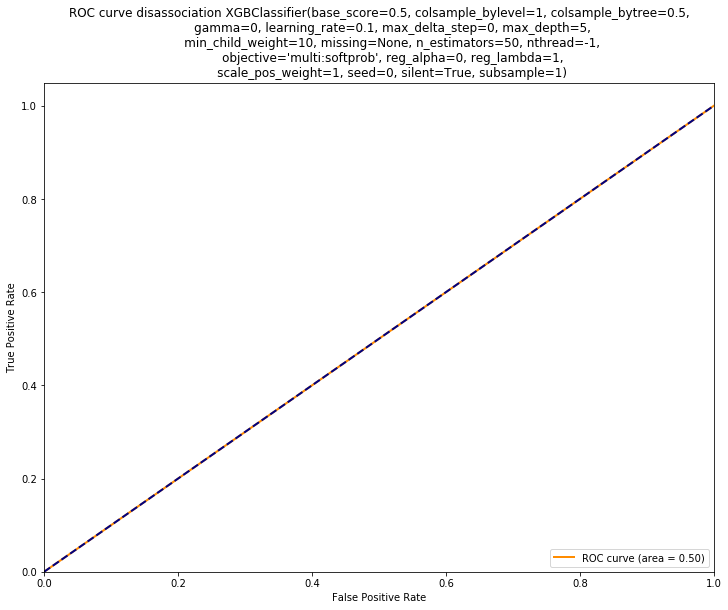

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.99      0.99    538148
          1       1.00      1.00      1.00     13669
          2       0.00      0.00      0.00         0
          3       1.00      1.00      1.00       478
          4       1.00      1.00      1.00      4458
          6       0.80      0.38      0.52      1277
          7       1.00      1.00      1.00       599
          9       1.00      0.01      0.02     17014
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.96    575643

0.955599216876


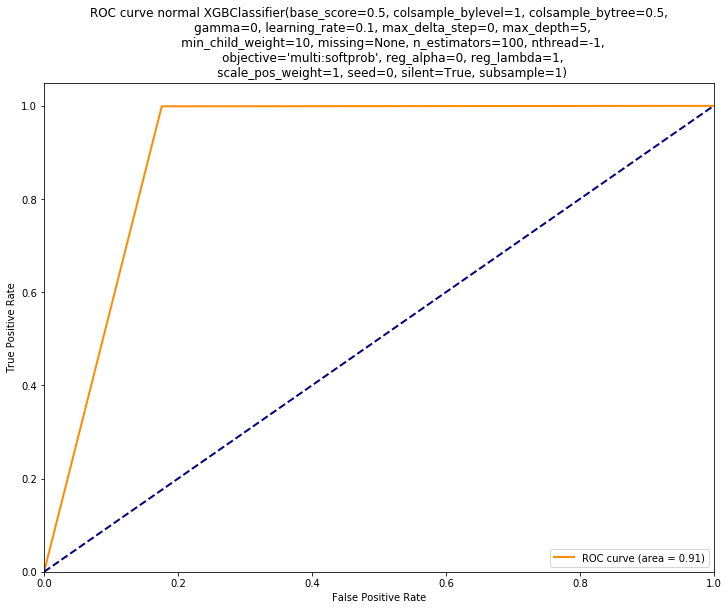

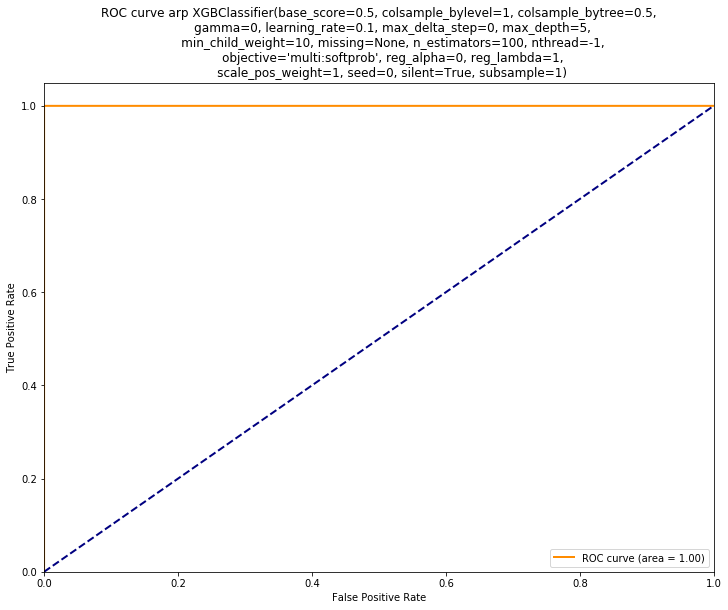

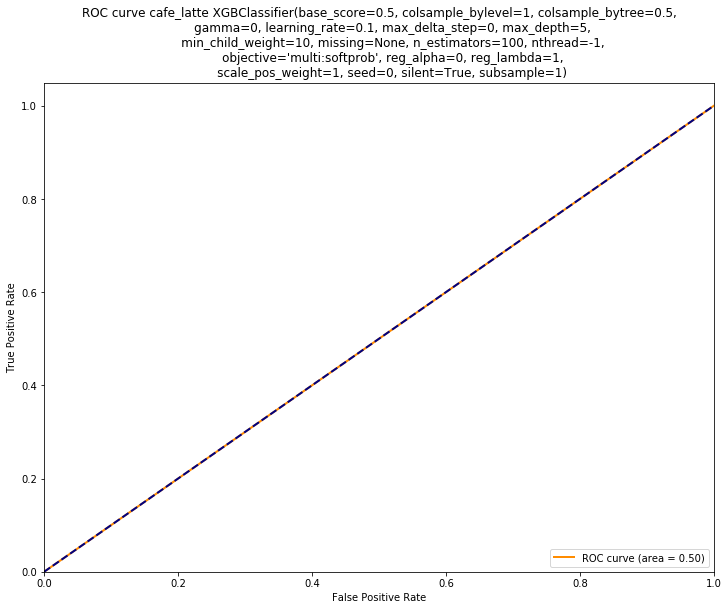

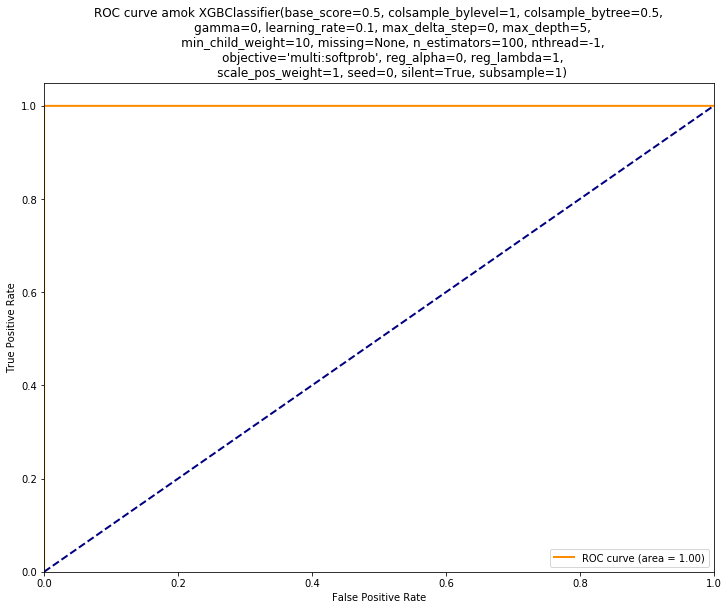

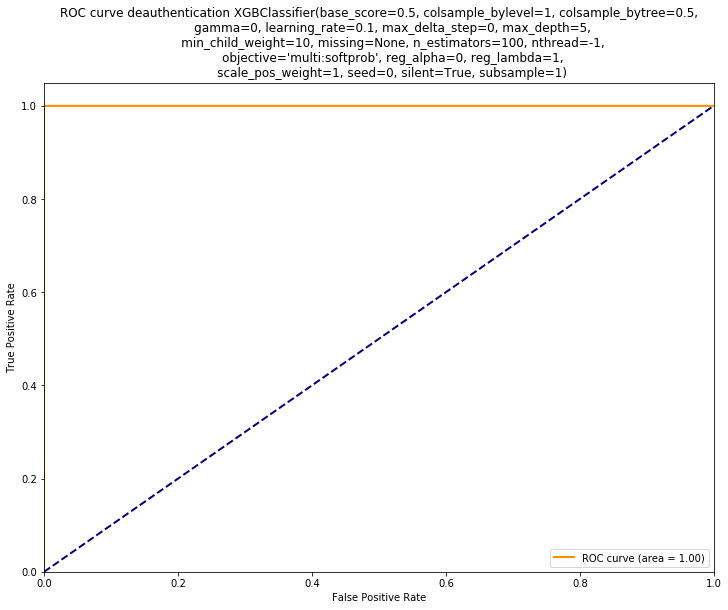

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


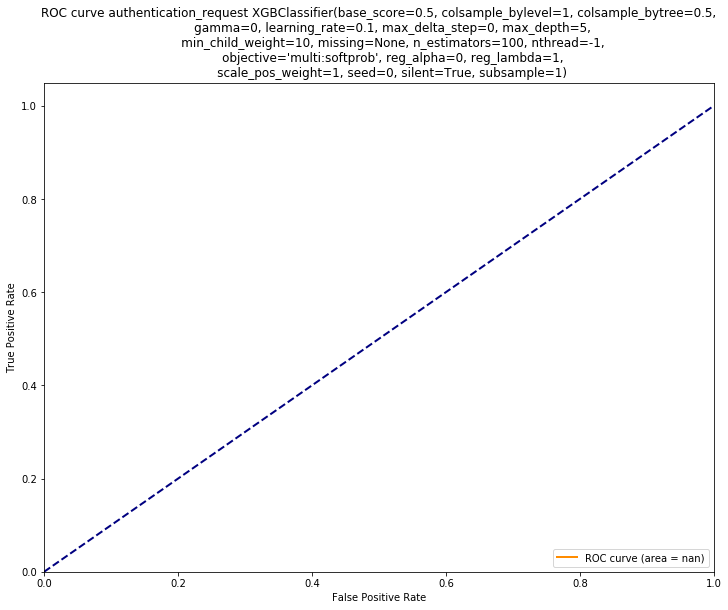

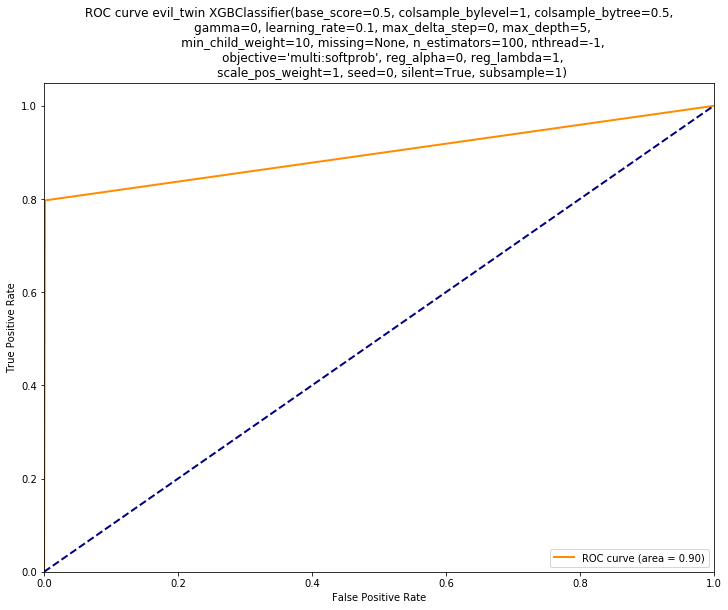

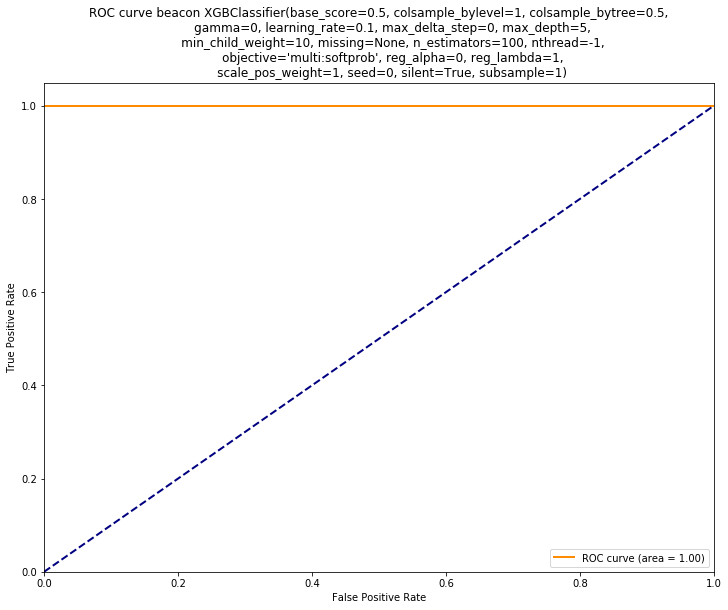

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


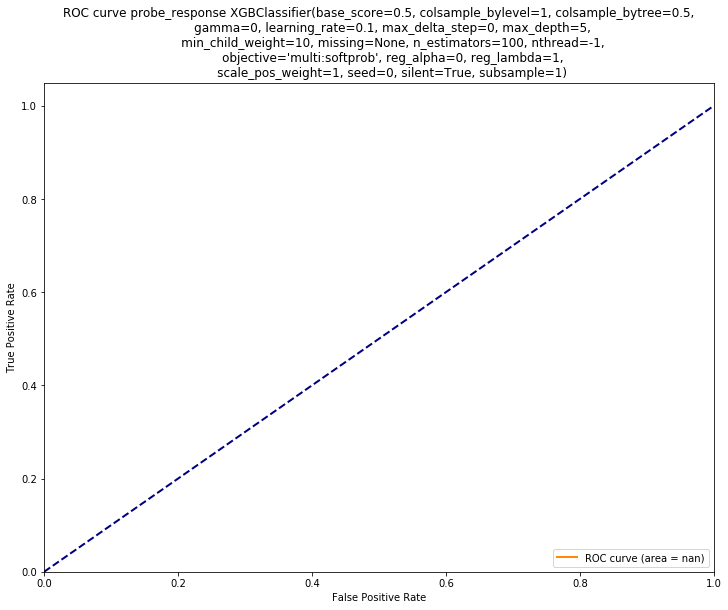

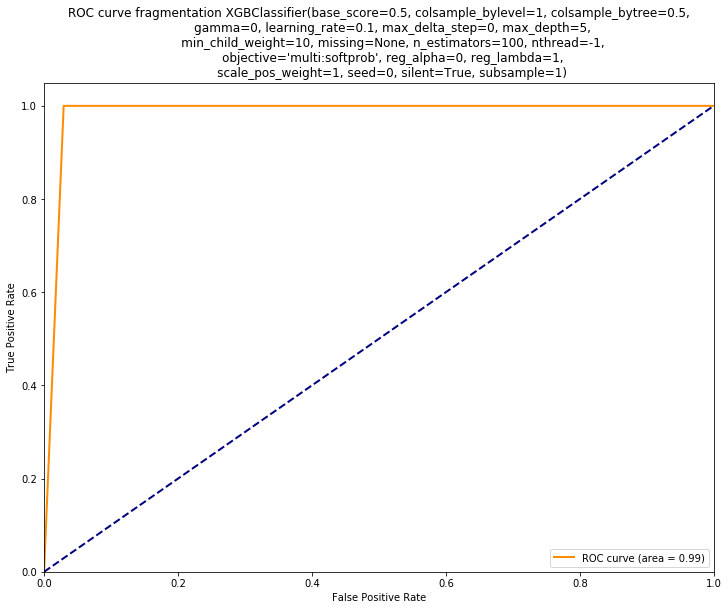

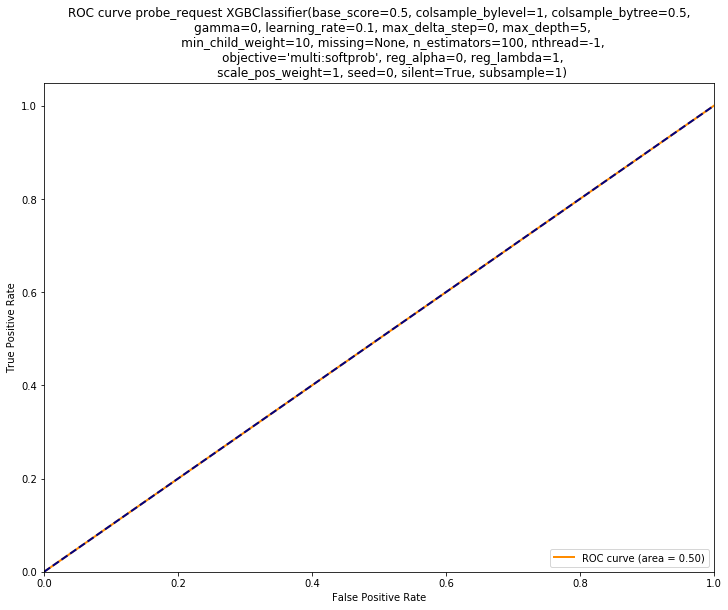

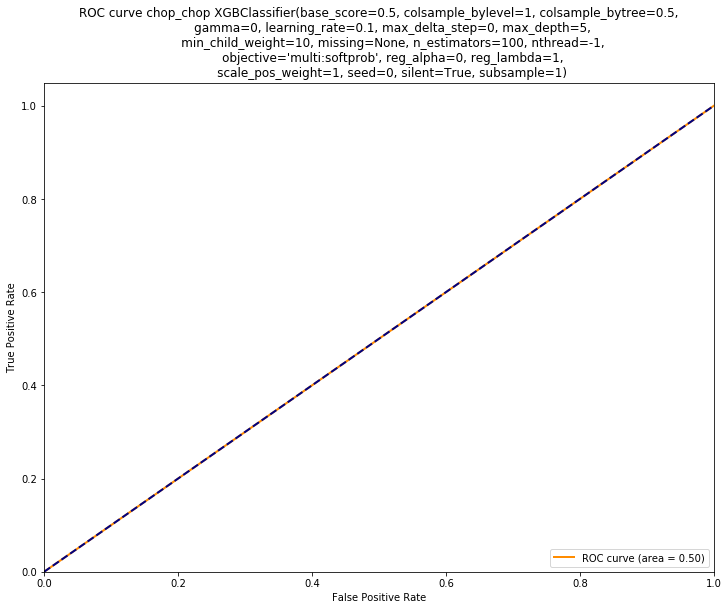

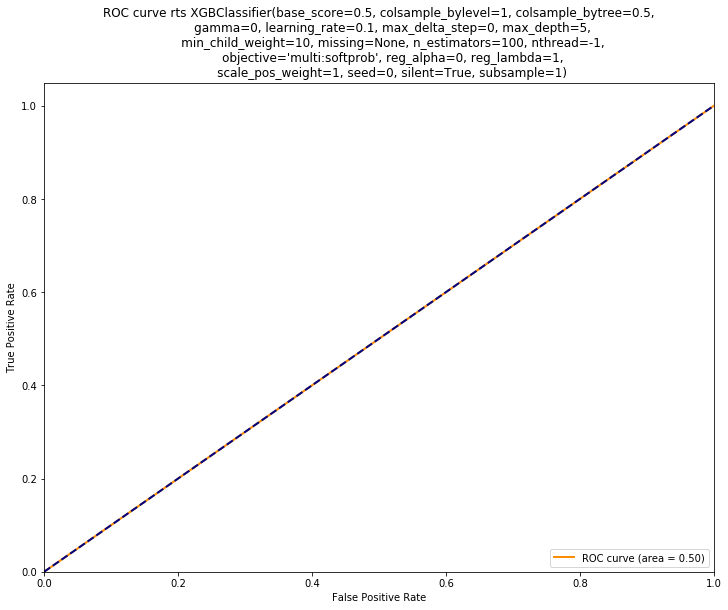

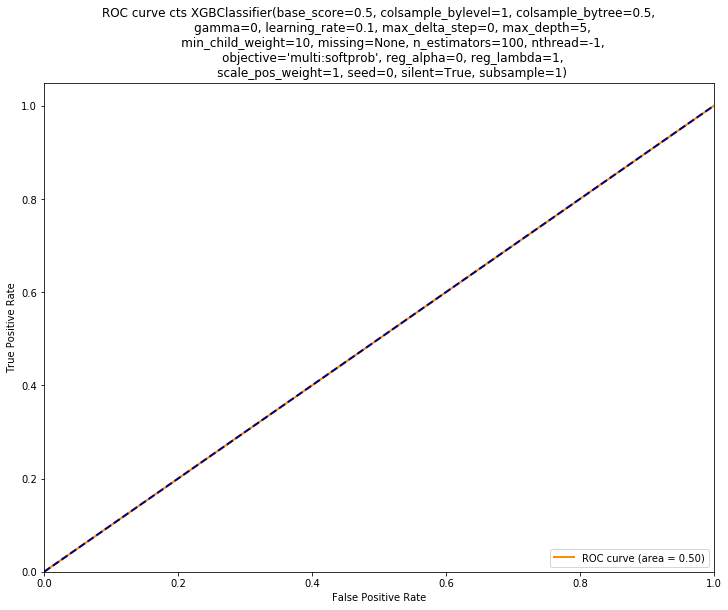

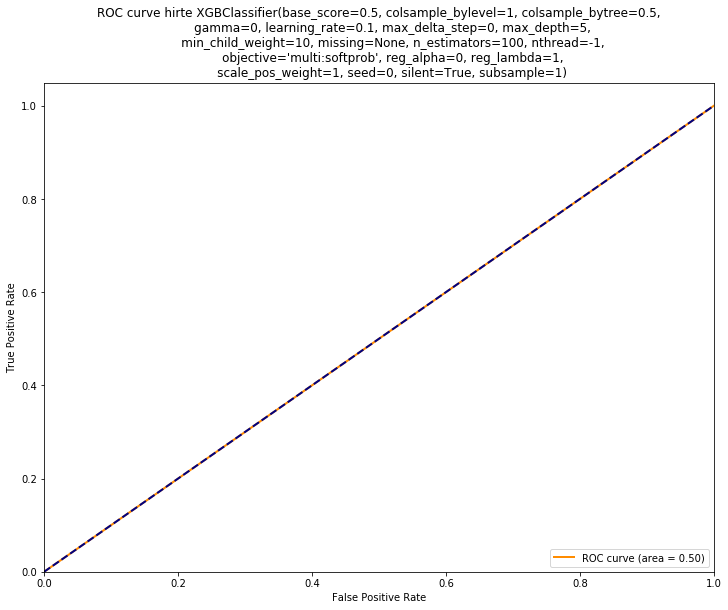

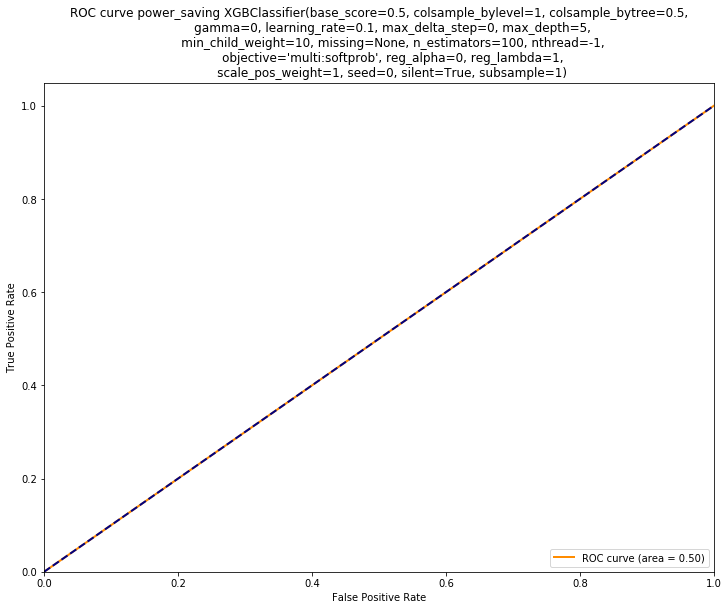

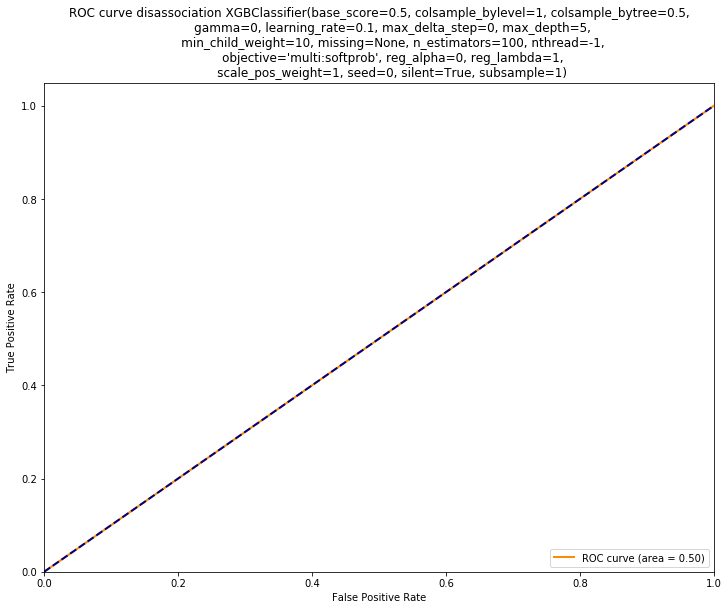

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    542446
          1       1.00      0.99      1.00     13719
          2       0.00      0.00      0.00         0
          3       1.00      1.00      1.00       477
          4       1.00      1.00      1.00      4449
          6       0.91      0.41      0.56      1372
          7       0.92      1.00      0.96       553
          9       1.00      0.01      0.03     12627
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.97    575643

0.956537298291


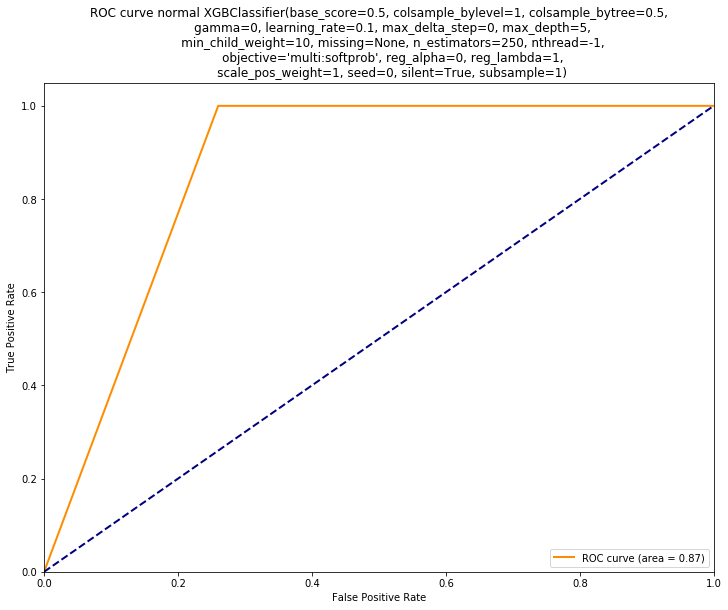

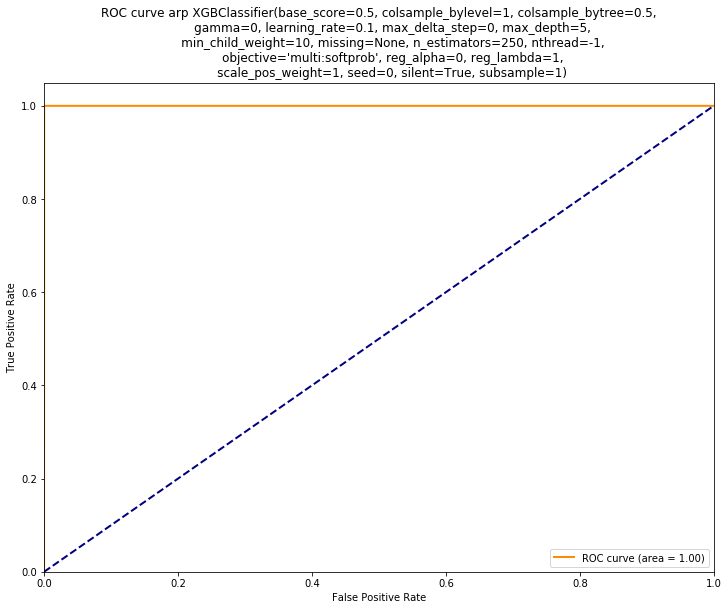

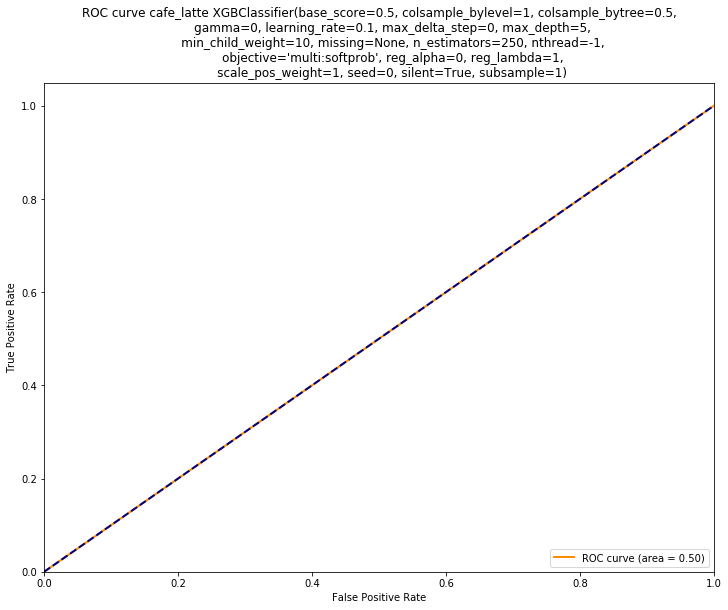

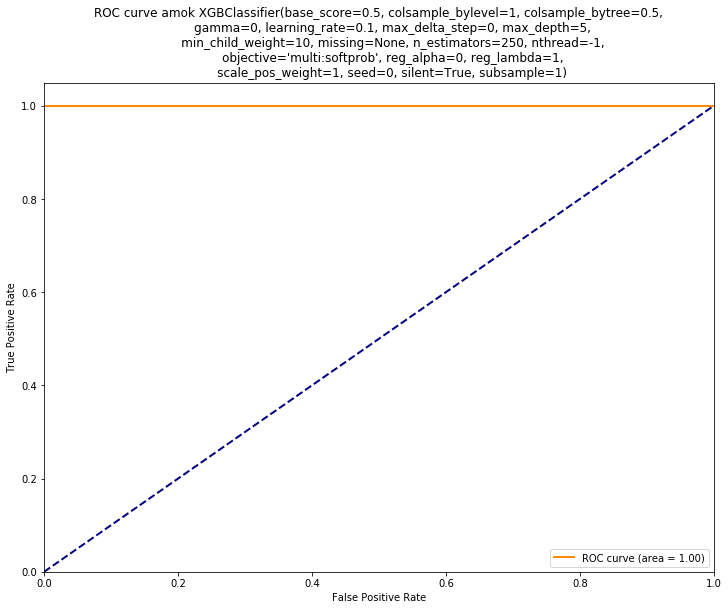

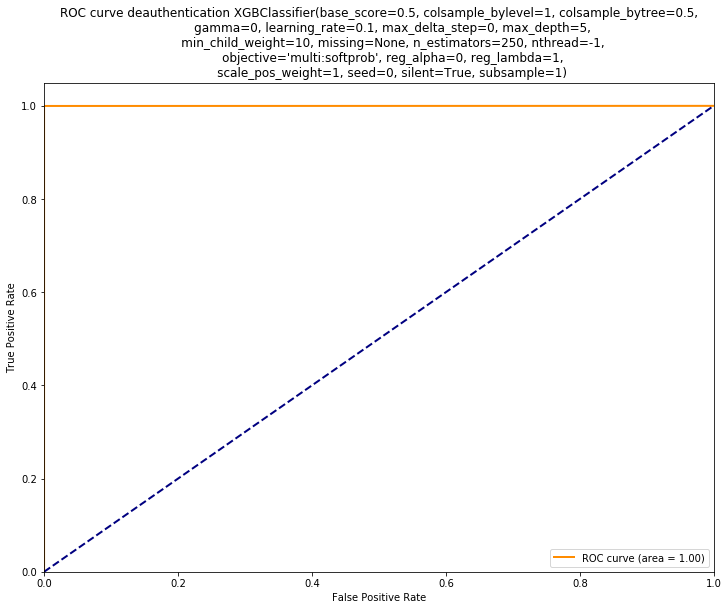

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


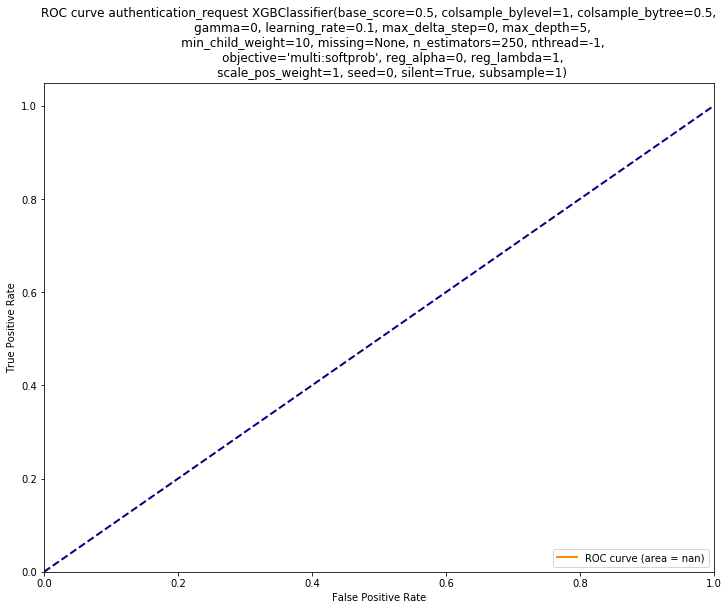

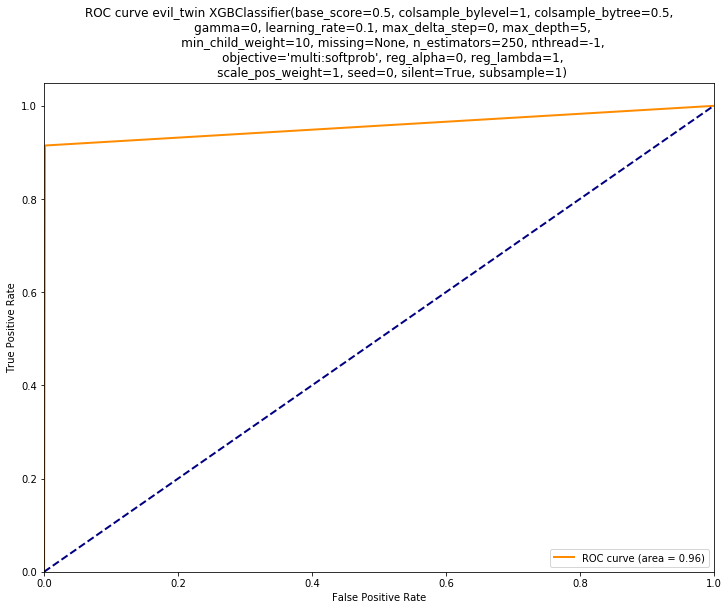

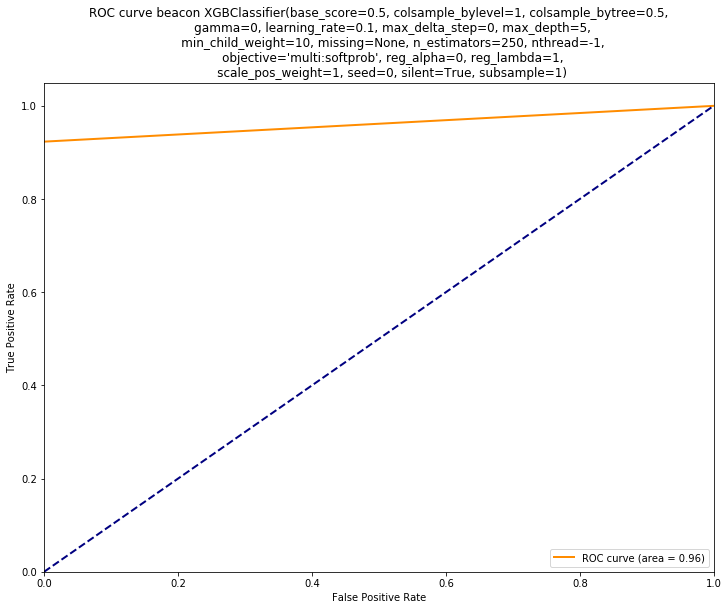

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


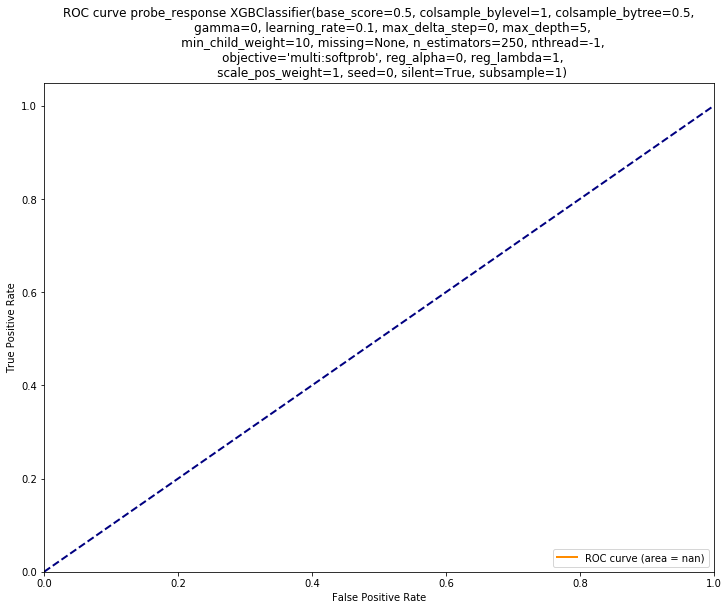

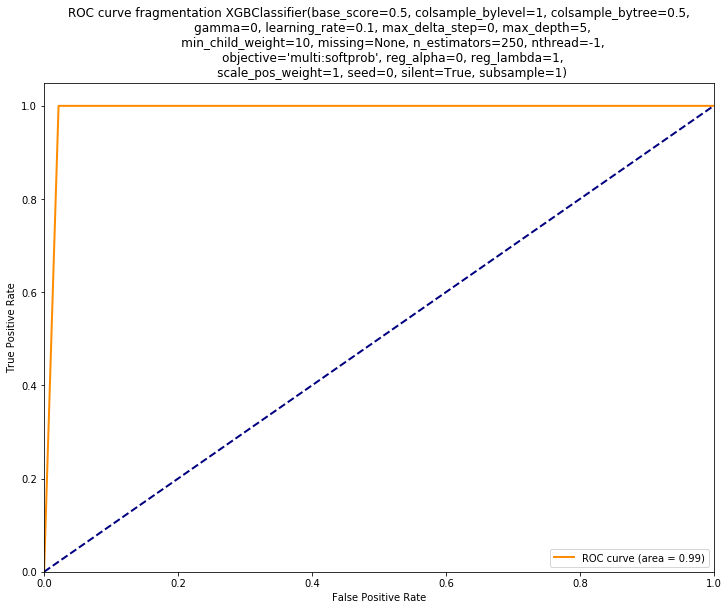

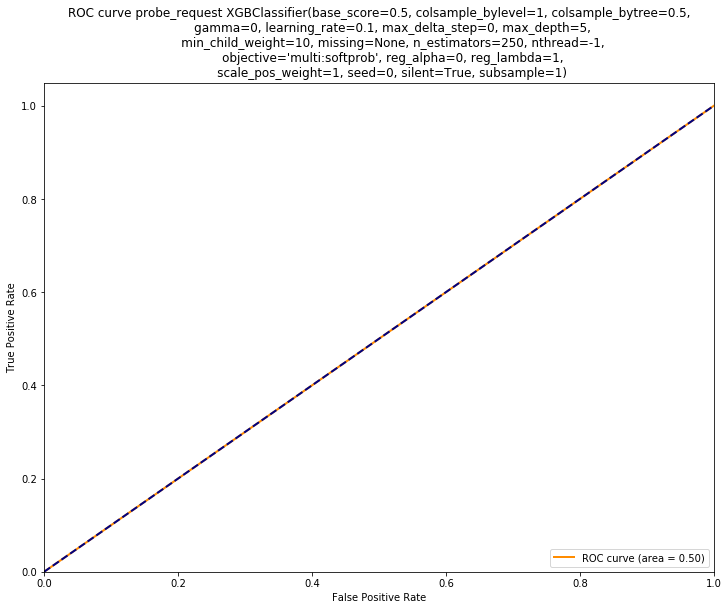

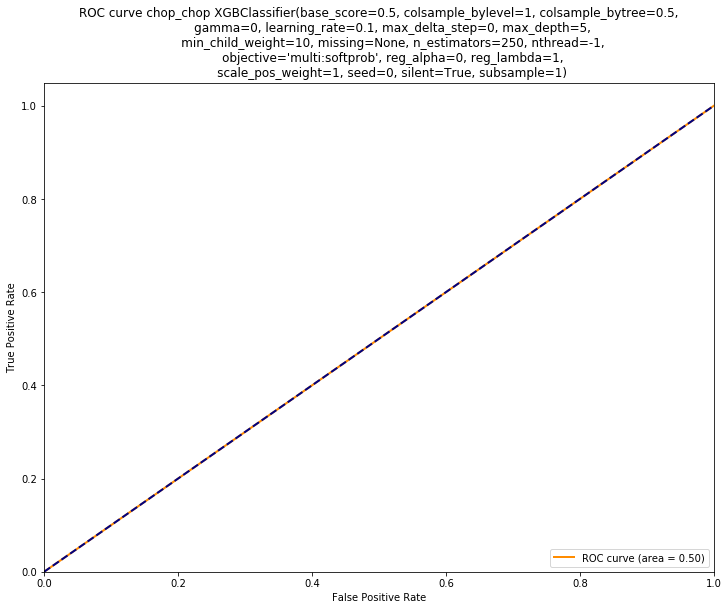

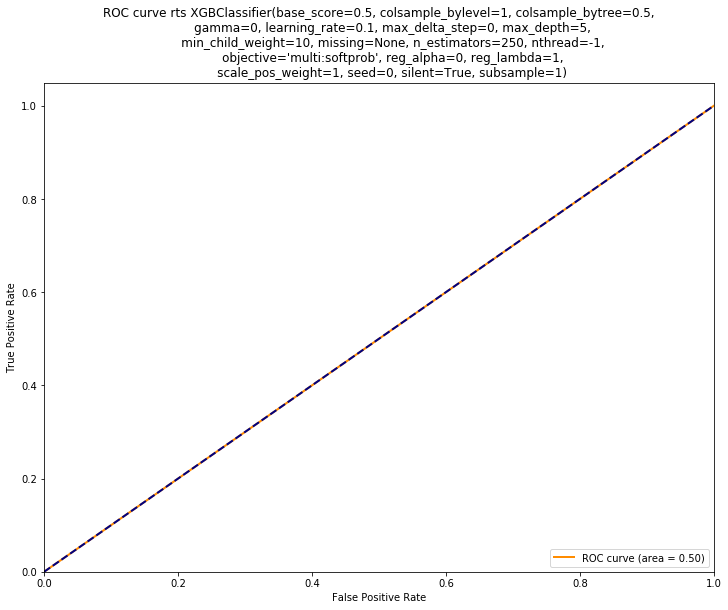

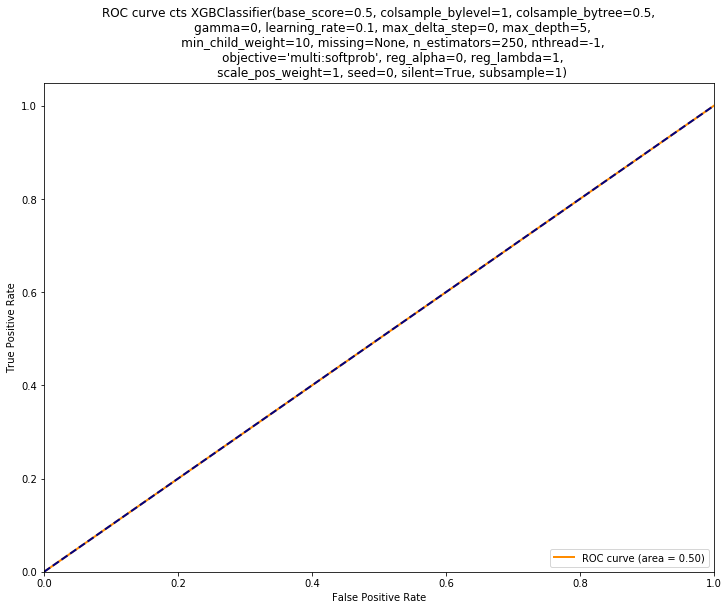

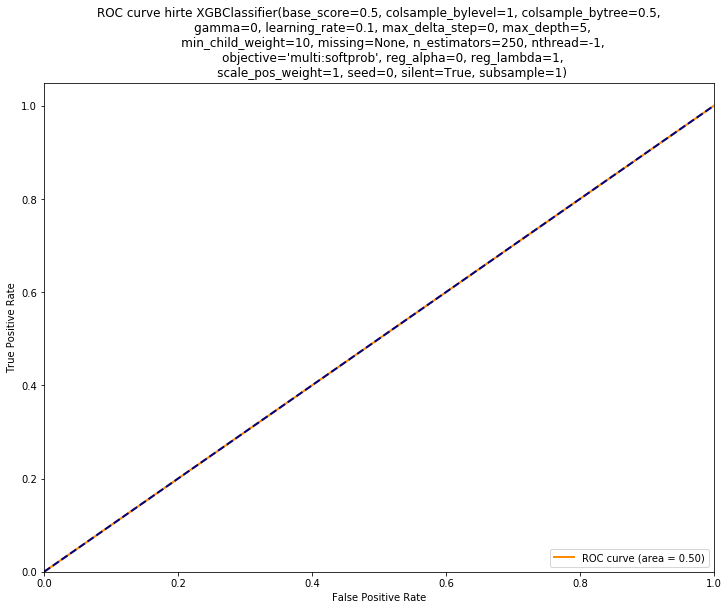

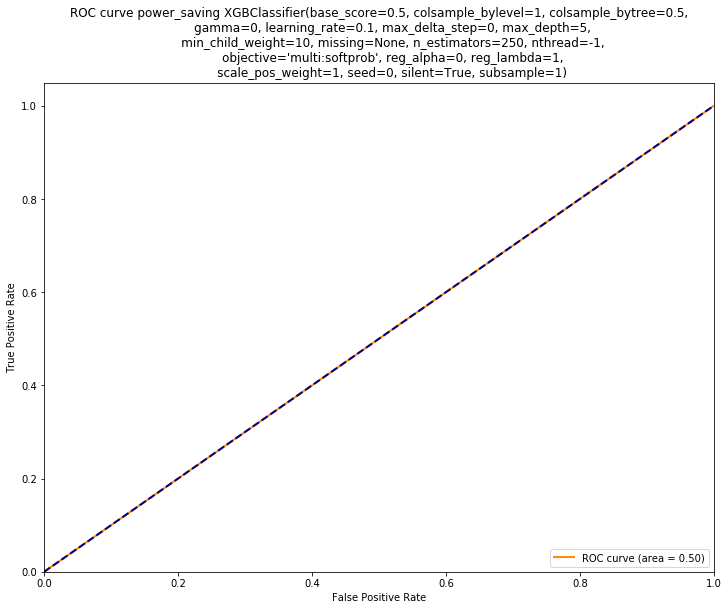

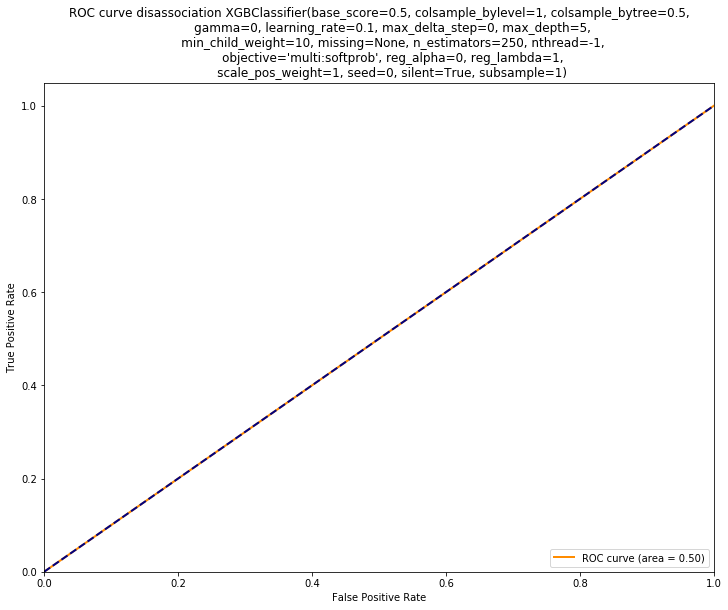

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    541966
          1       1.00      1.00      1.00     13644
          2       0.00      0.00      0.00         0
          3       1.00      0.99      1.00       480
          4       1.00      1.00      1.00      4441
          6       0.81      0.38      0.52      1290
          7       1.00      1.00      1.00       599
          9       1.00      0.01      0.02     13223
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.97    575643

0.95606304602


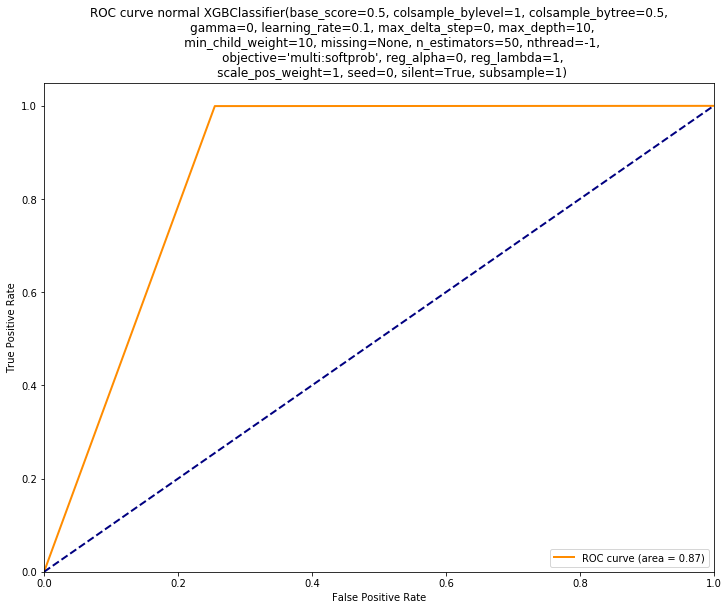

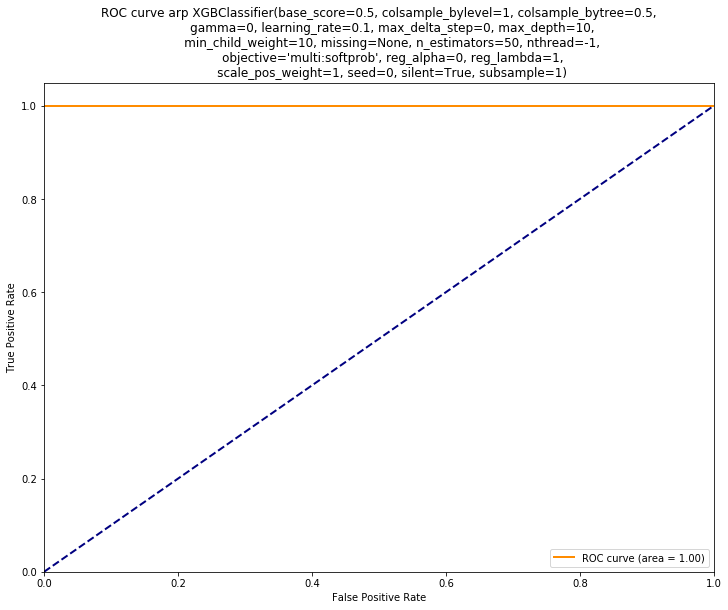

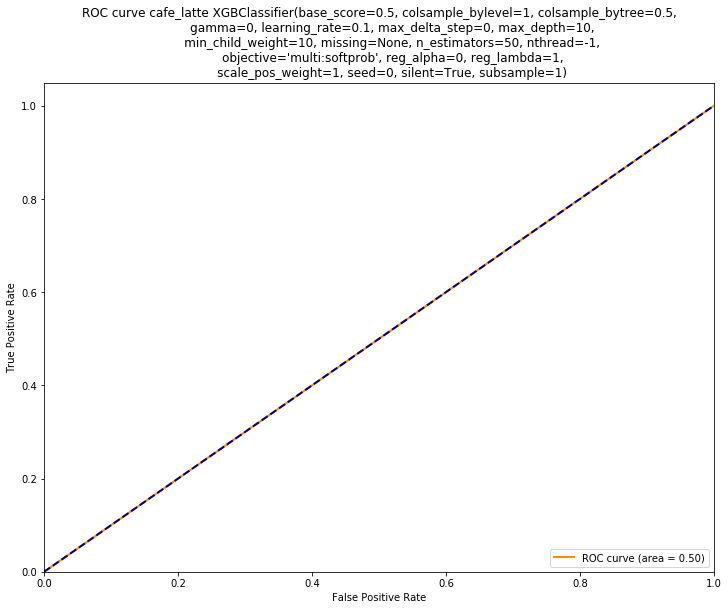

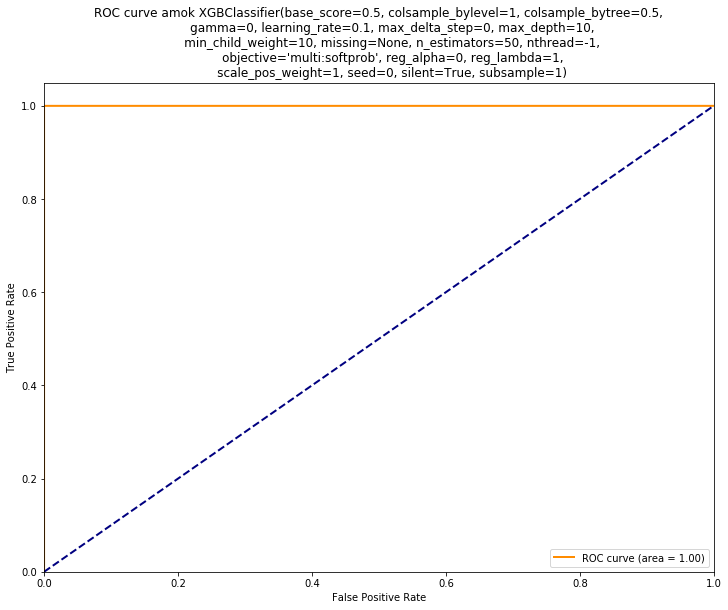

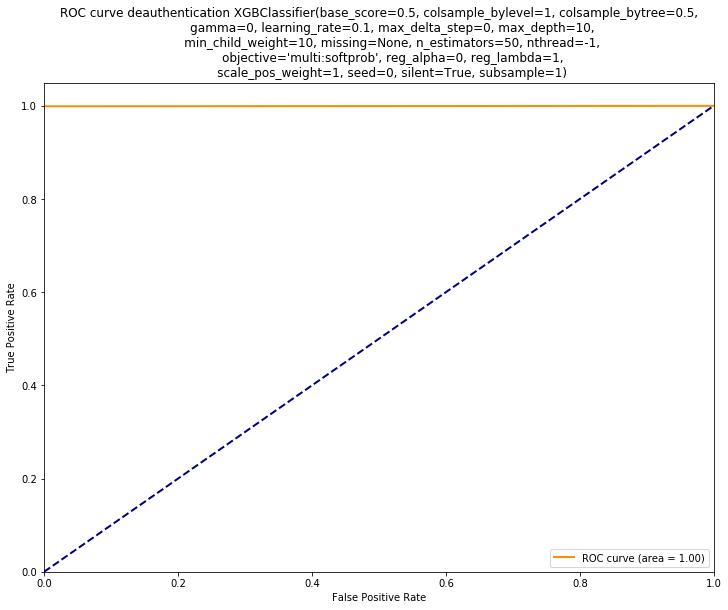

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


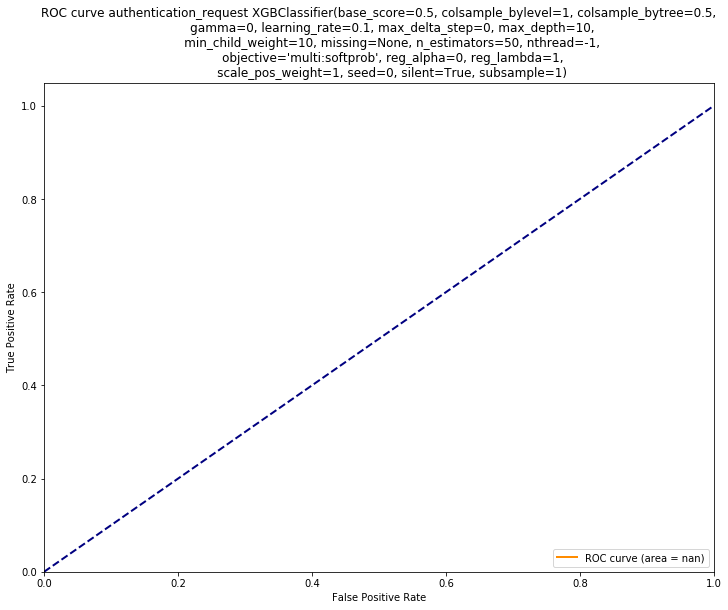

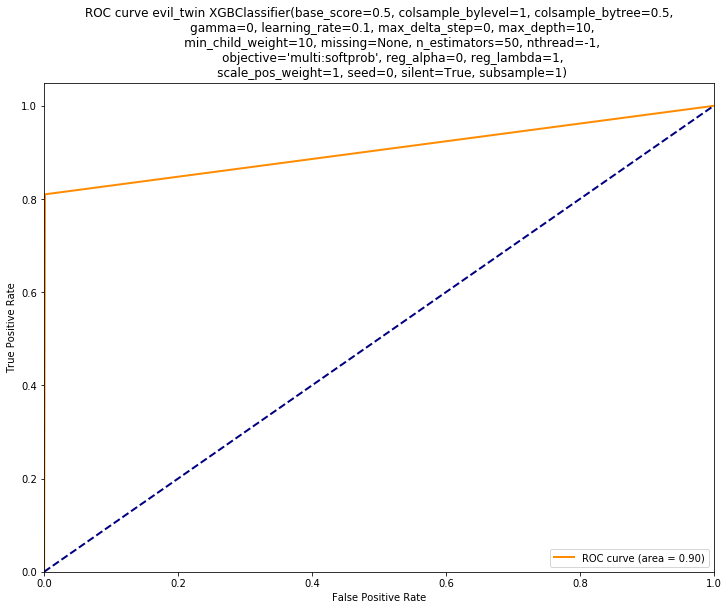

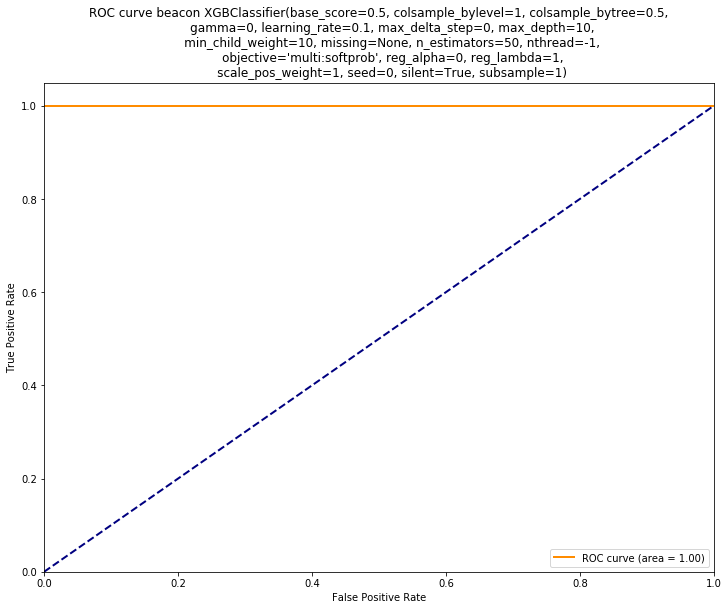

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


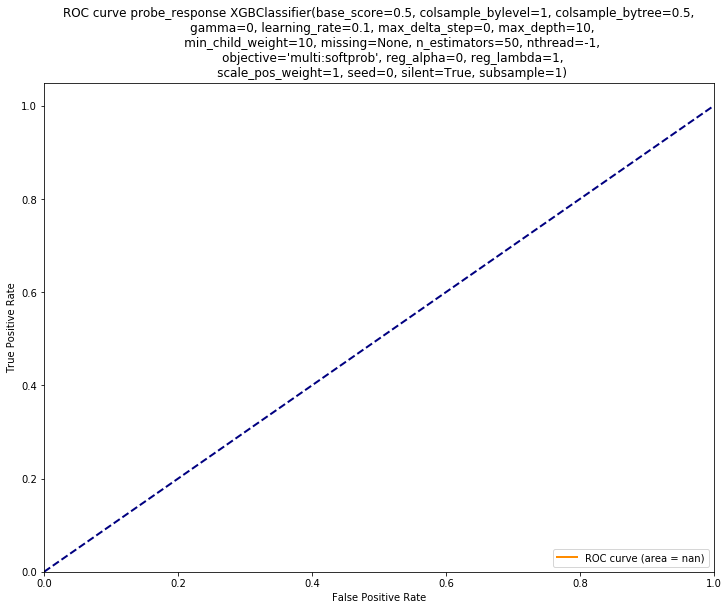

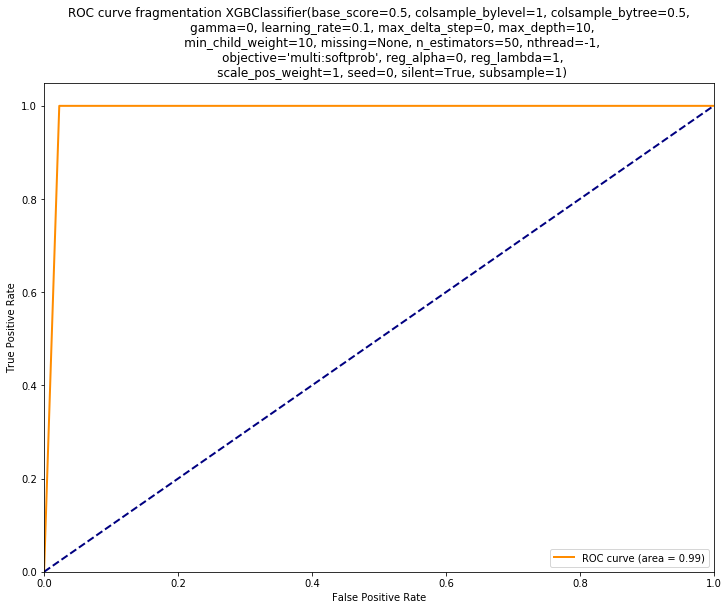

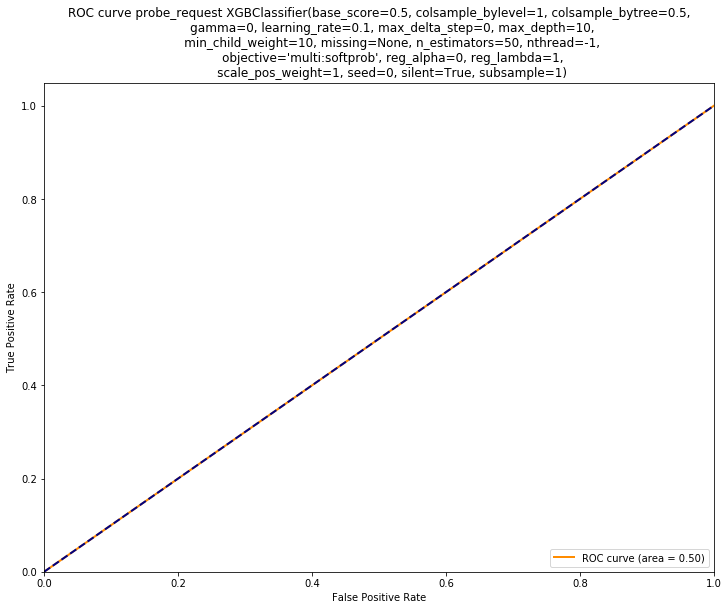

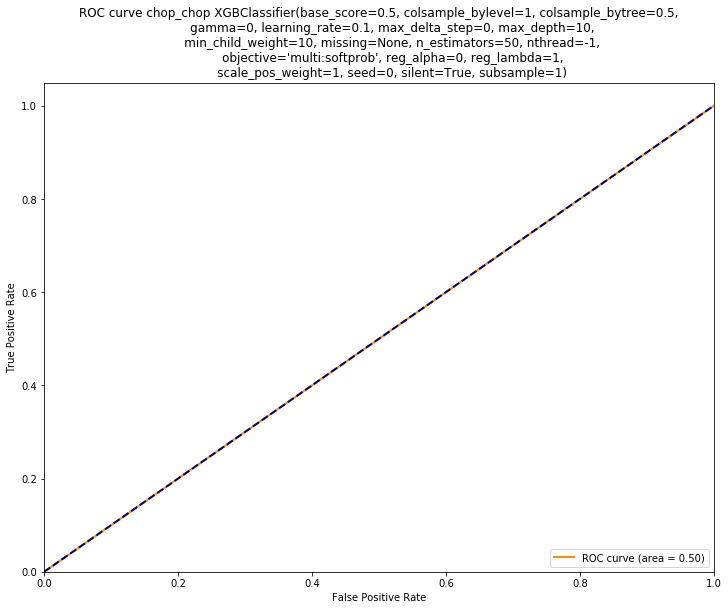

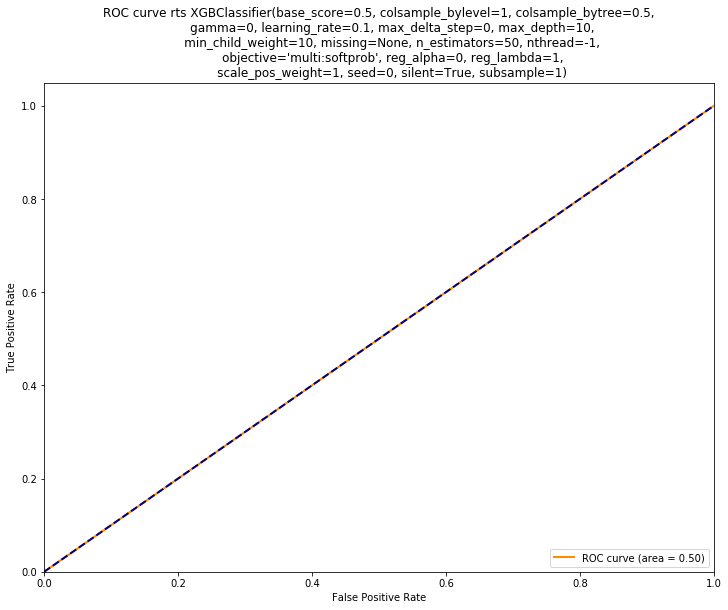

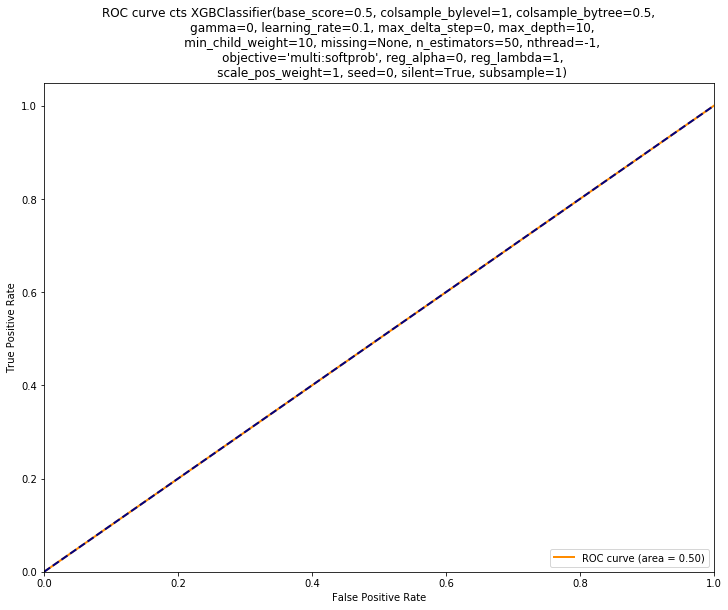

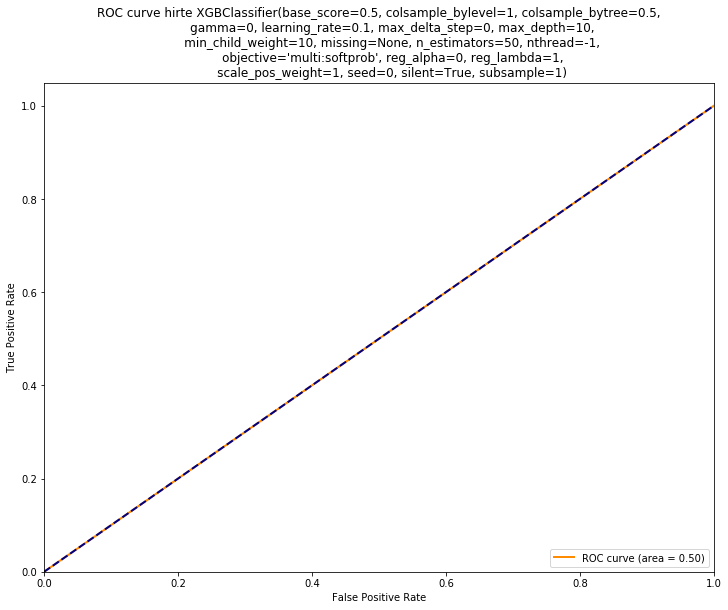

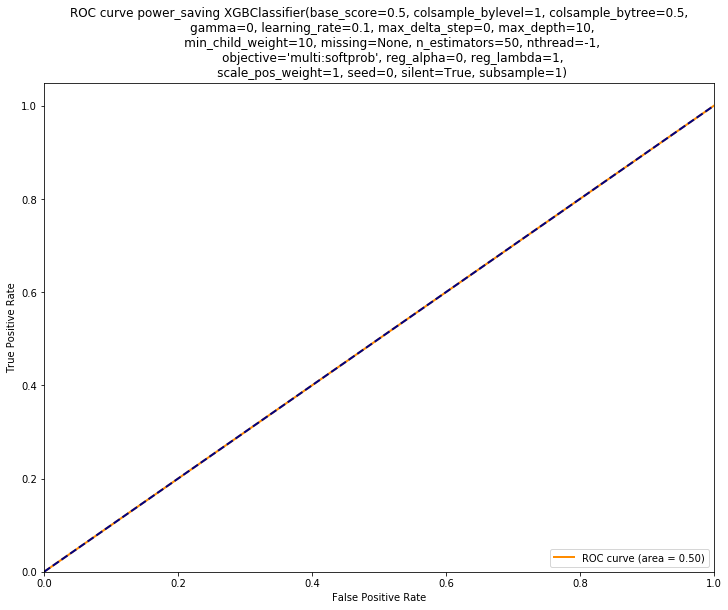

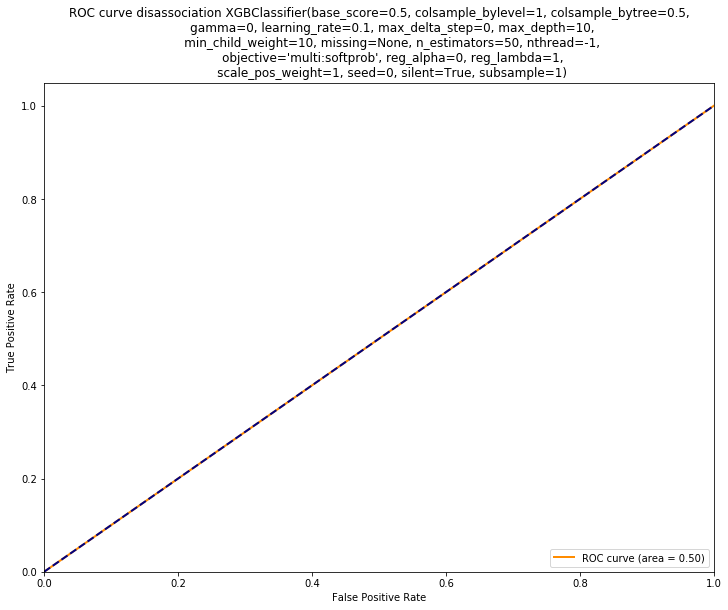

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    542839
          1       1.00      1.00      1.00     13672
          2       0.00      0.00      0.00         0
          3       1.00      0.99      1.00       480
          4       1.00      1.00      1.00      4440
          6       0.81      0.38      0.52      1289
          7       0.52      1.00      0.68       312
          9       1.00      0.01      0.03     12611
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.97    575643

0.955995295695


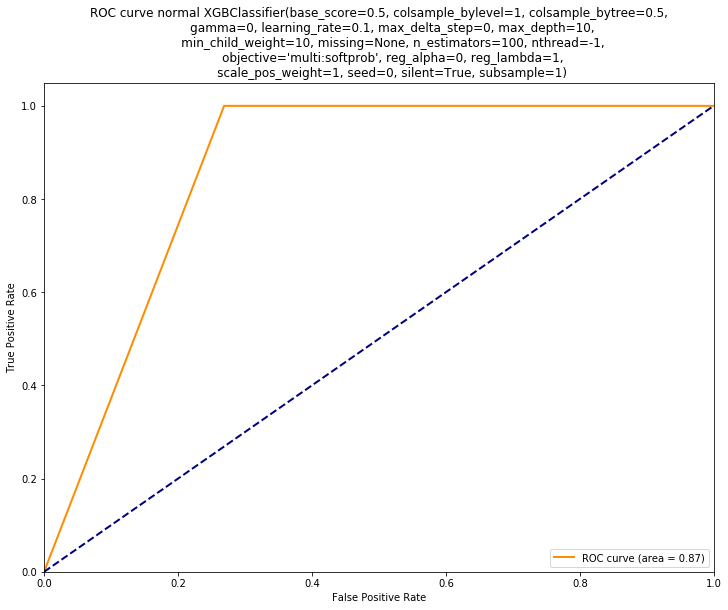

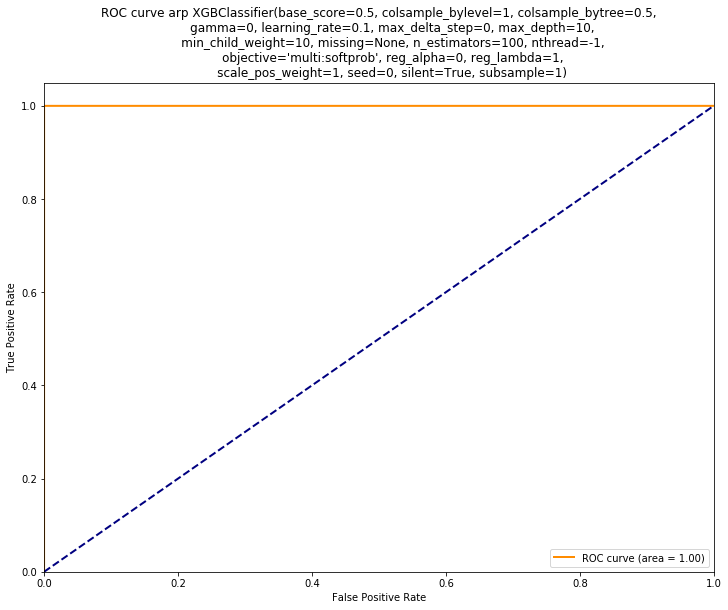

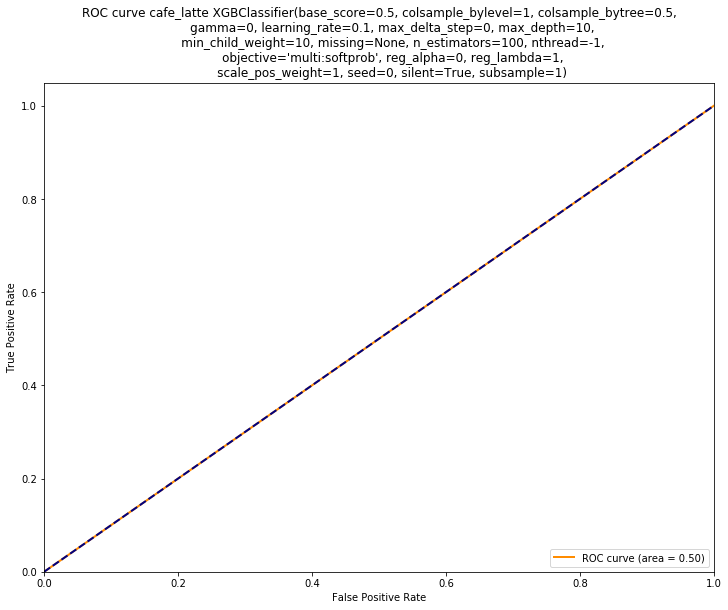

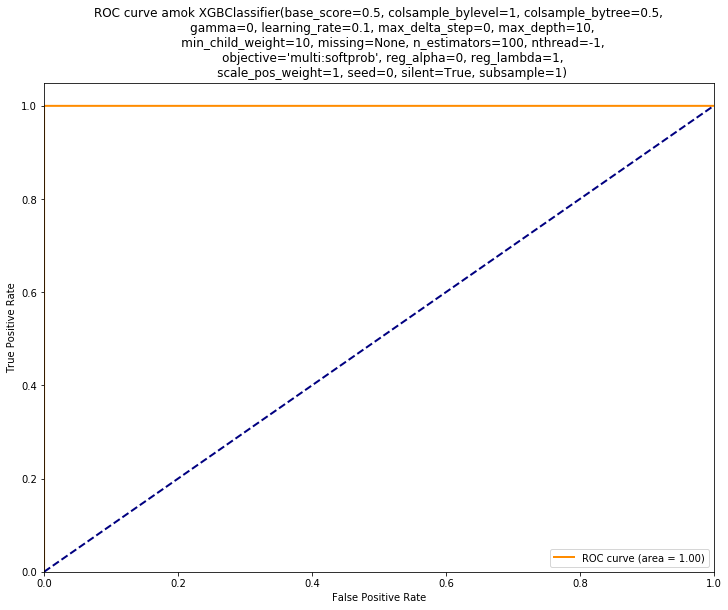

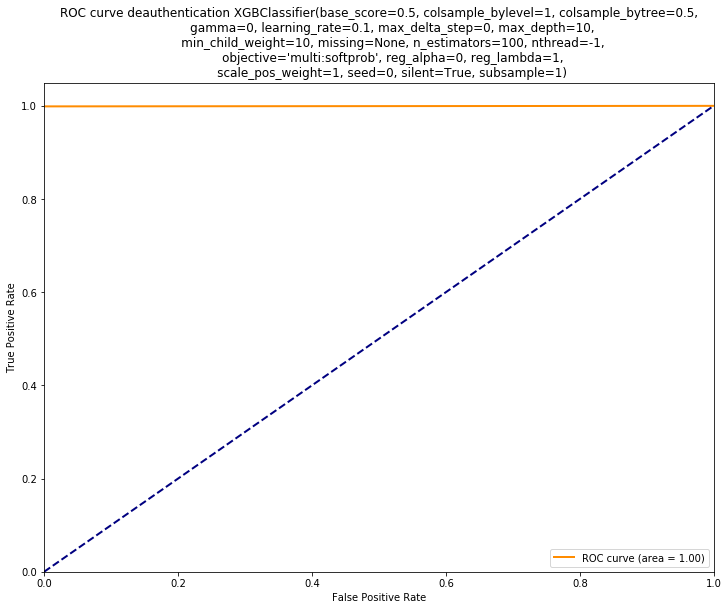

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


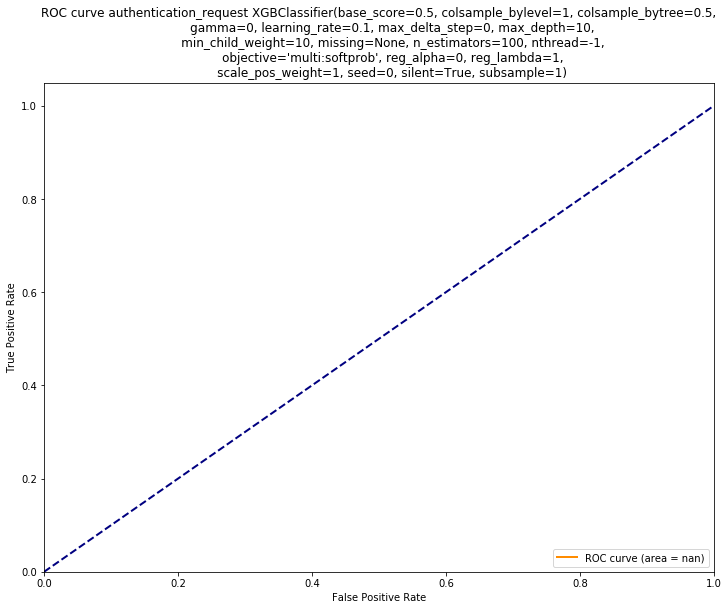

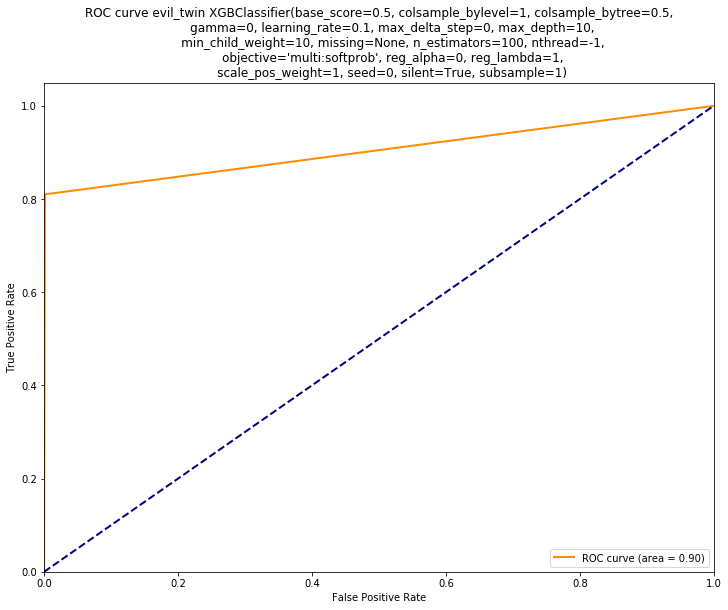

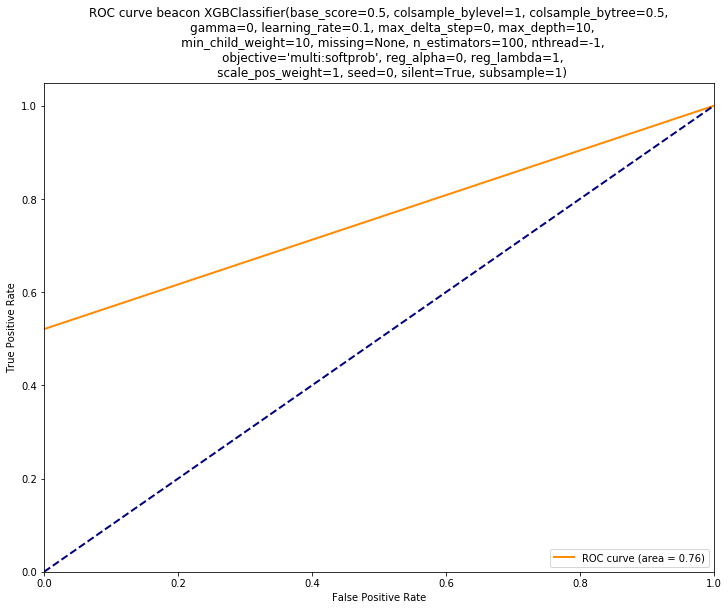

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


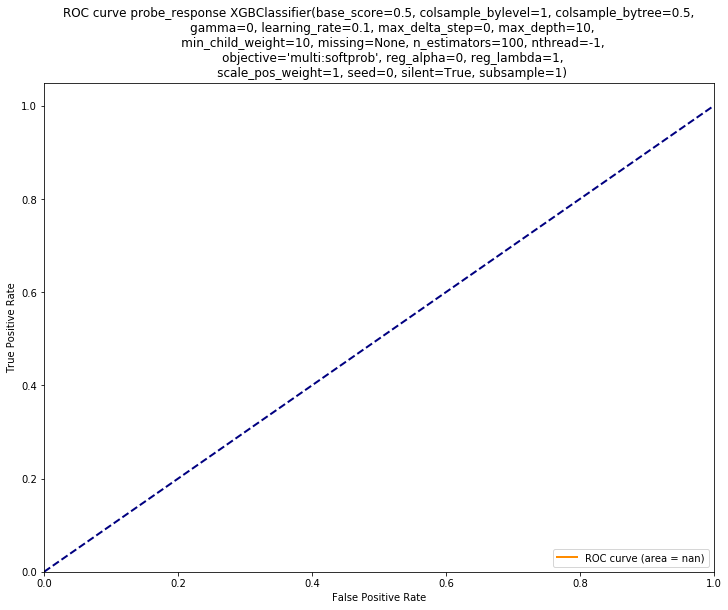

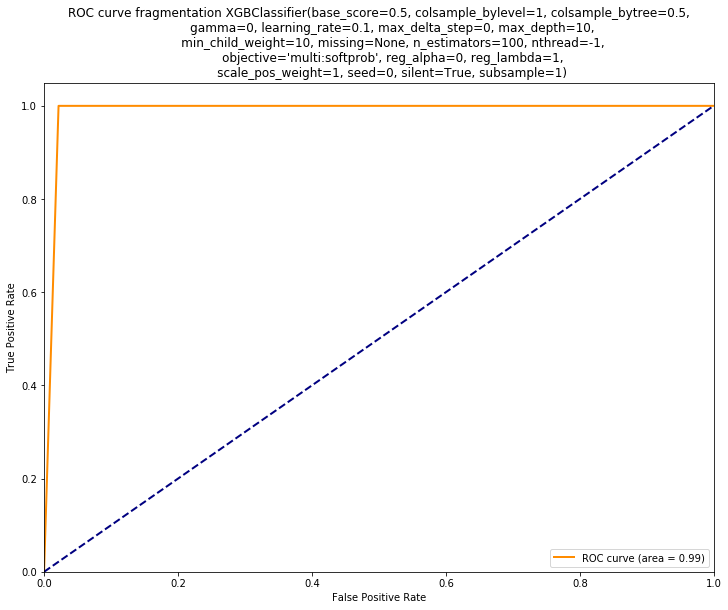

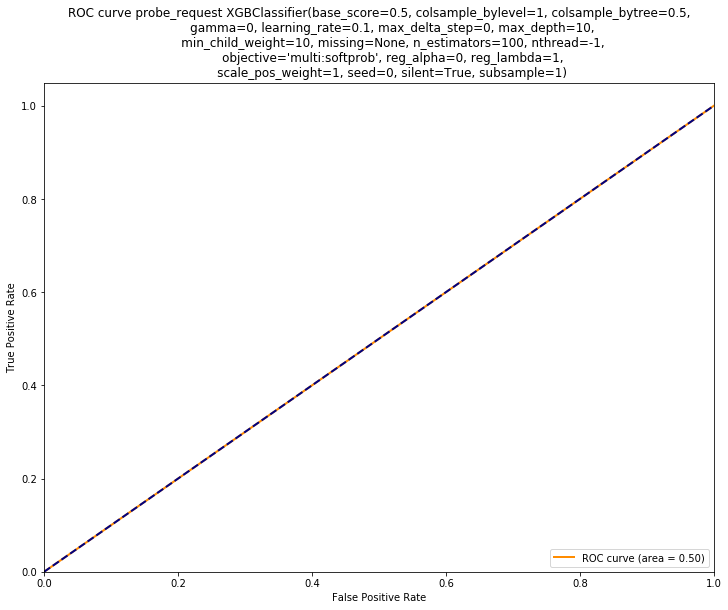

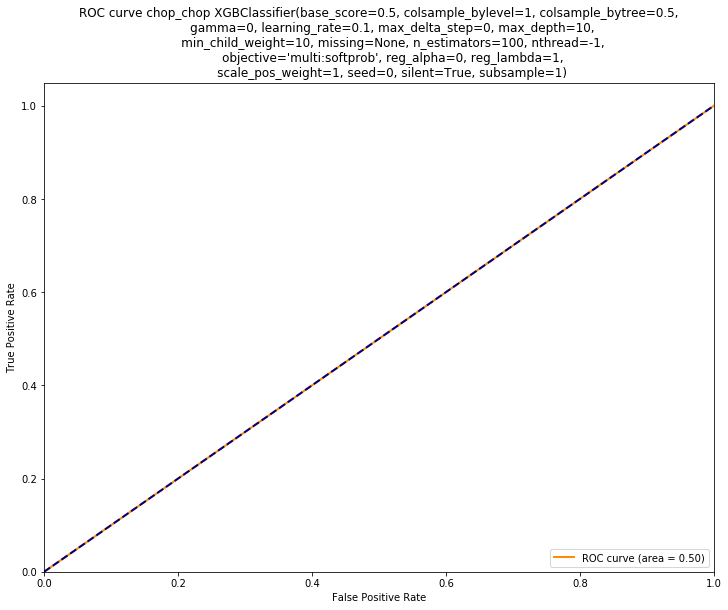

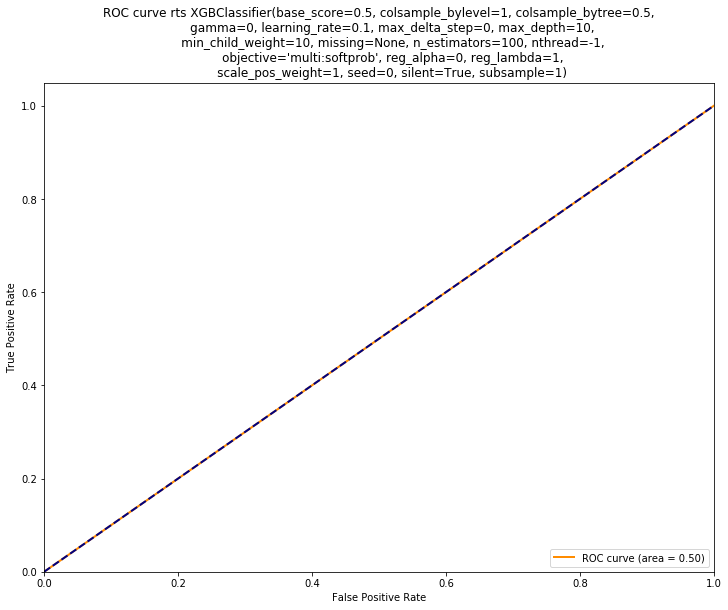

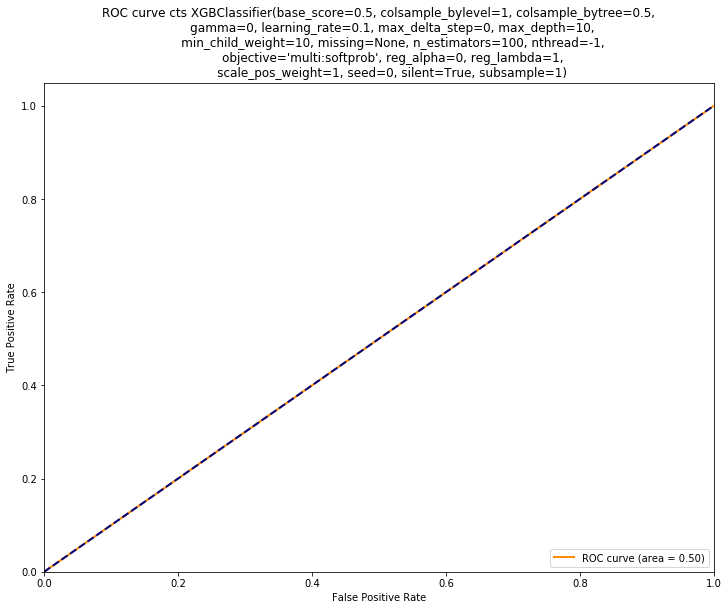

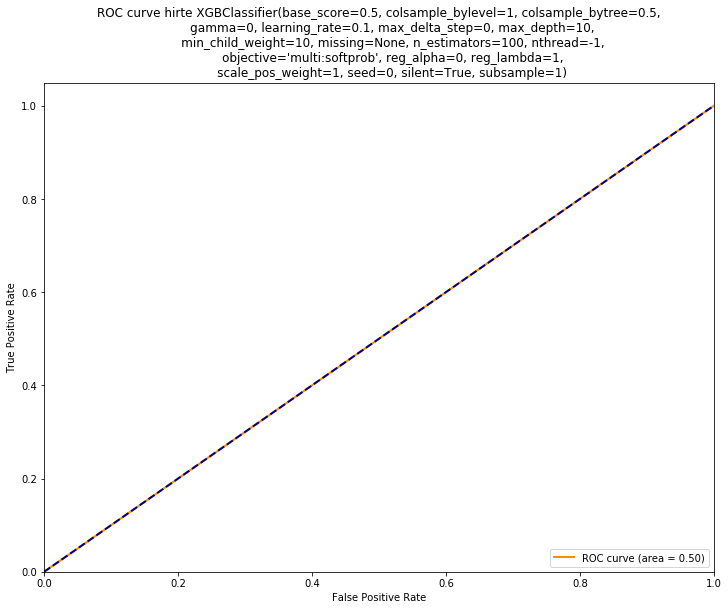

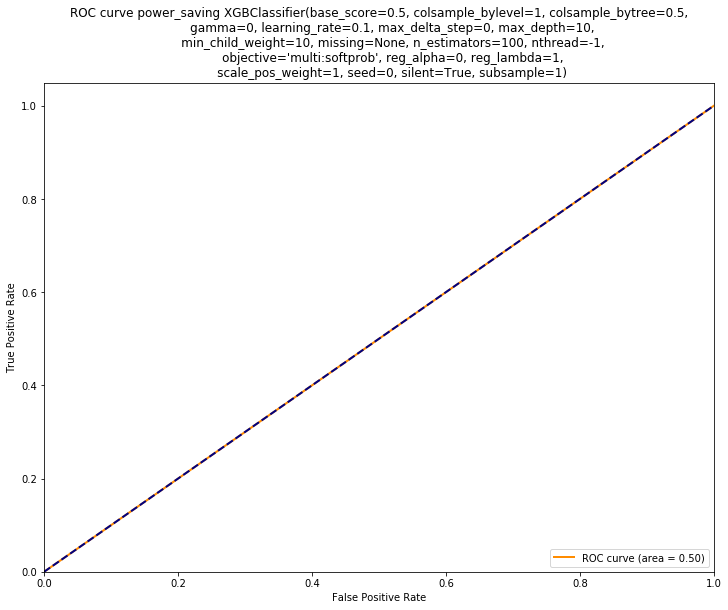

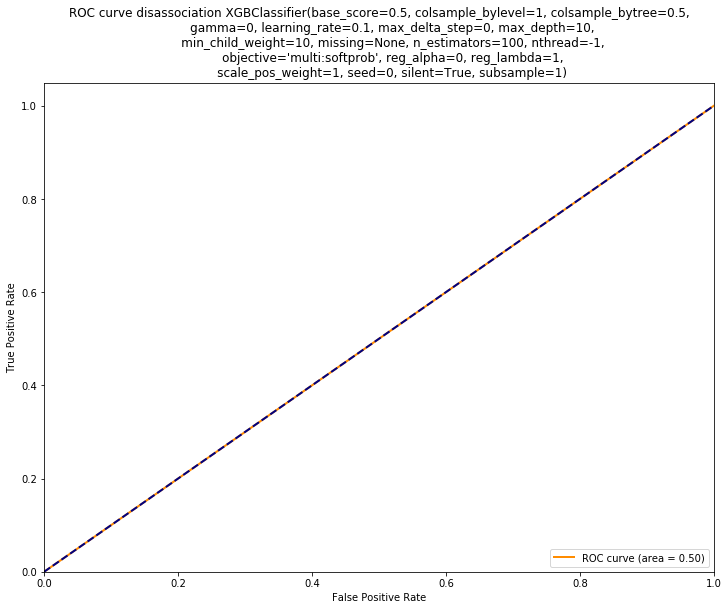

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    543016
          1       1.00      0.99      1.00     13719
          2       0.00      0.00      0.00         0
          3       1.00      1.00      1.00       477
          4       1.00      1.00      1.00      4440
          6       0.88      0.40      0.55      1350
          7       0.09      1.00      0.16        53
          9       1.00      0.01      0.03     12588
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.97    575643

0.955637435007


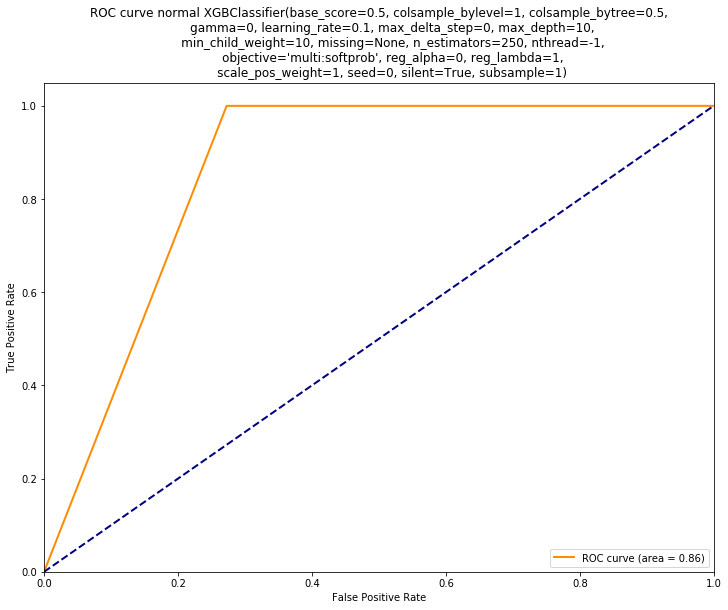

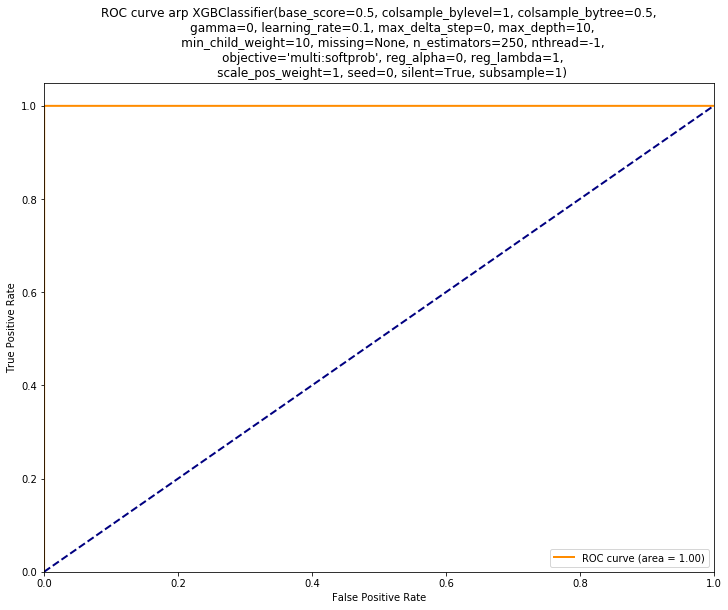

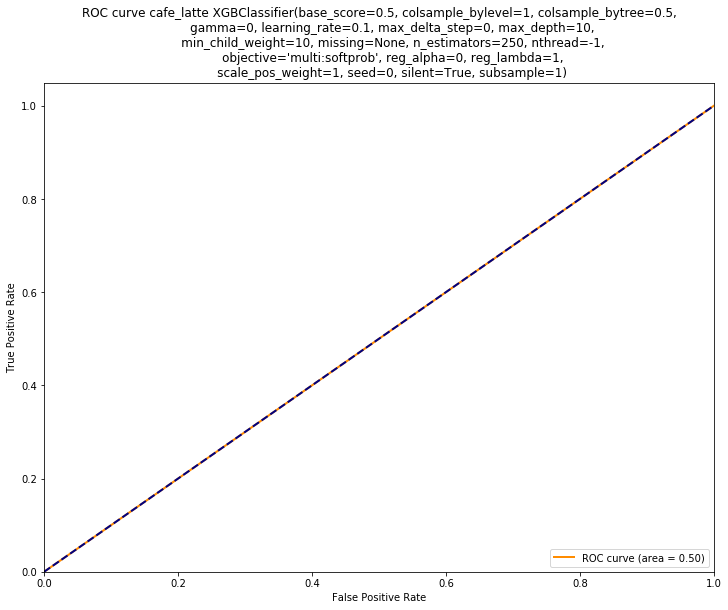

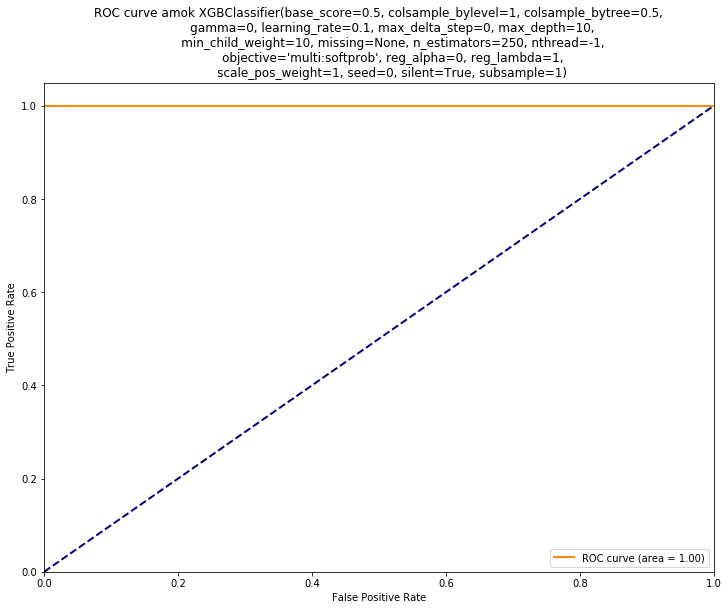

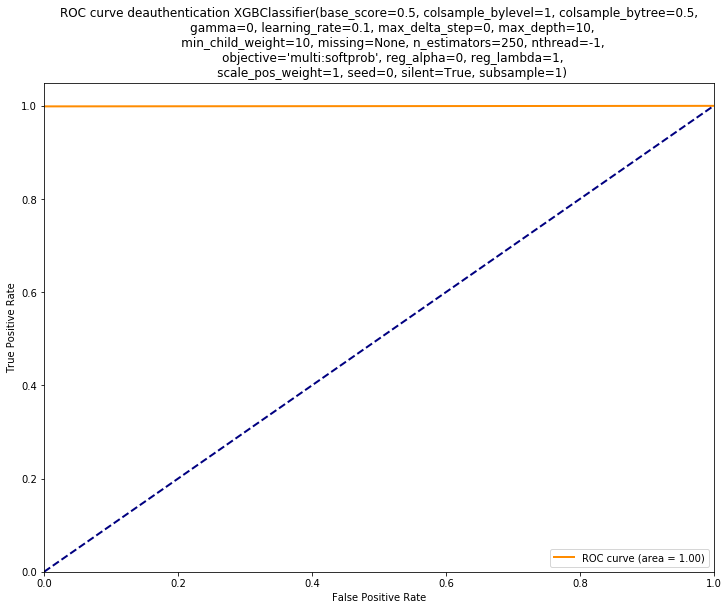

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


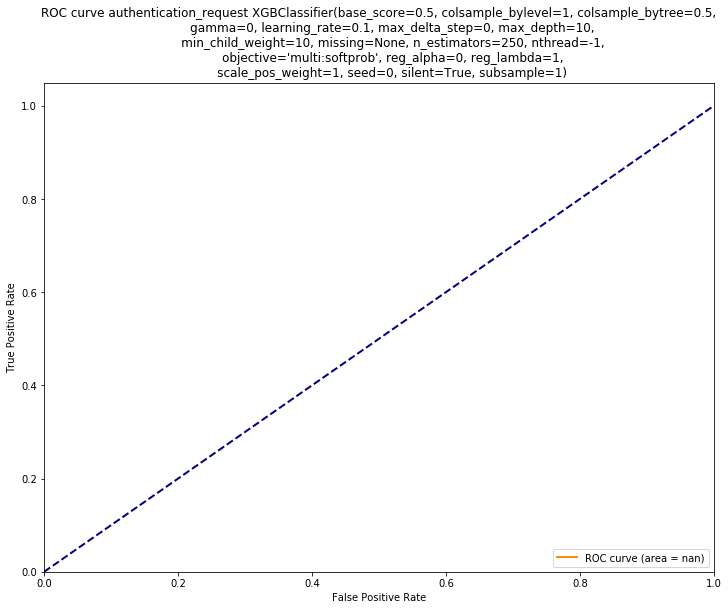

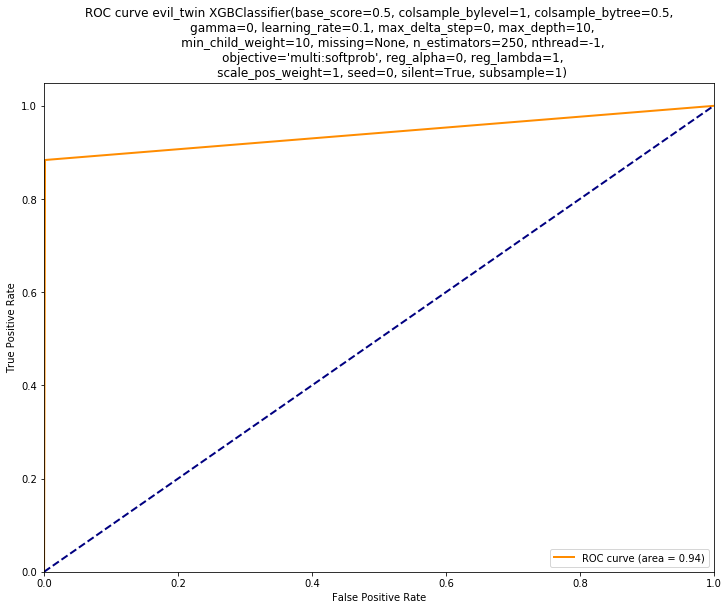

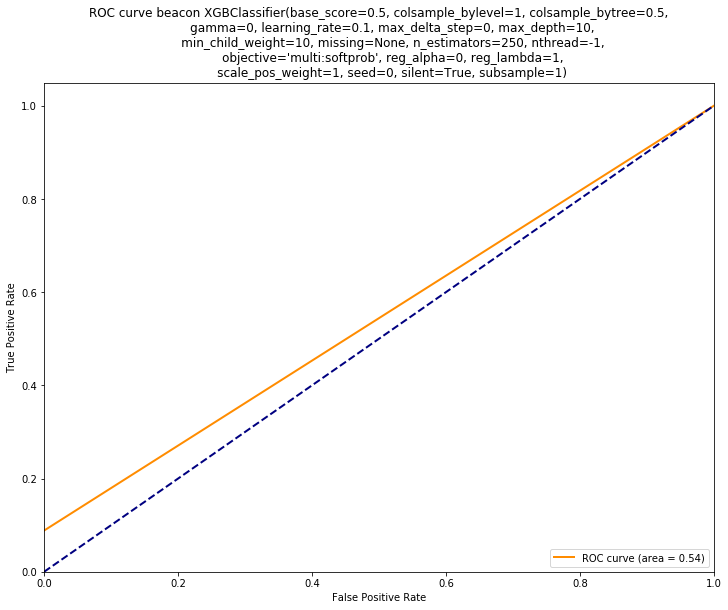

/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


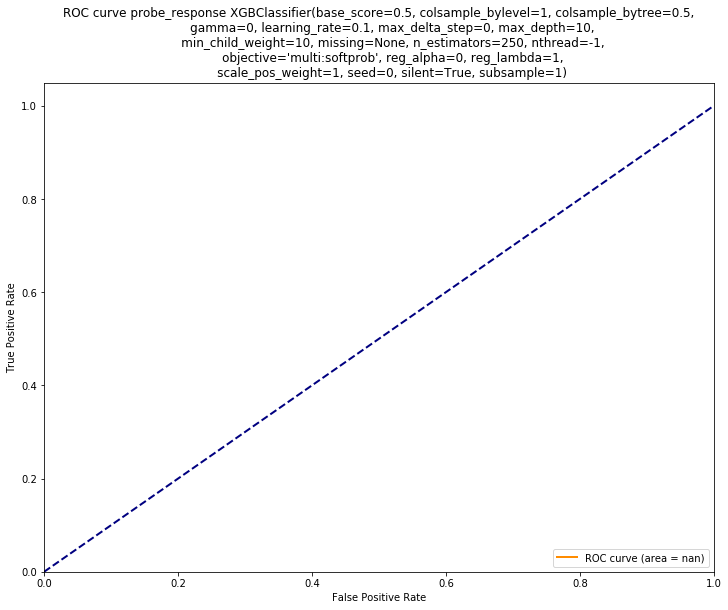

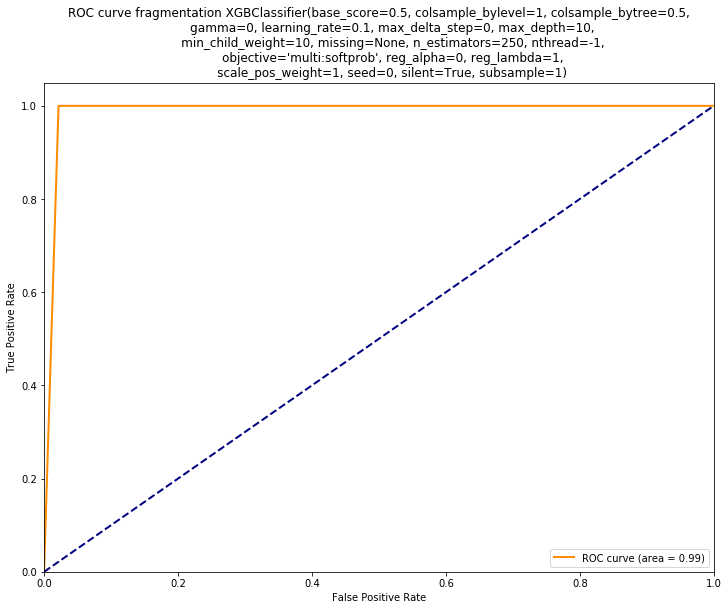

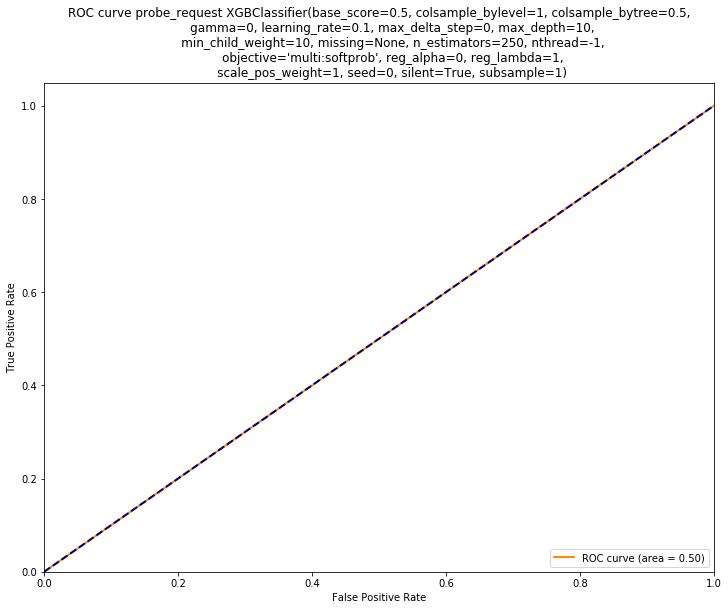

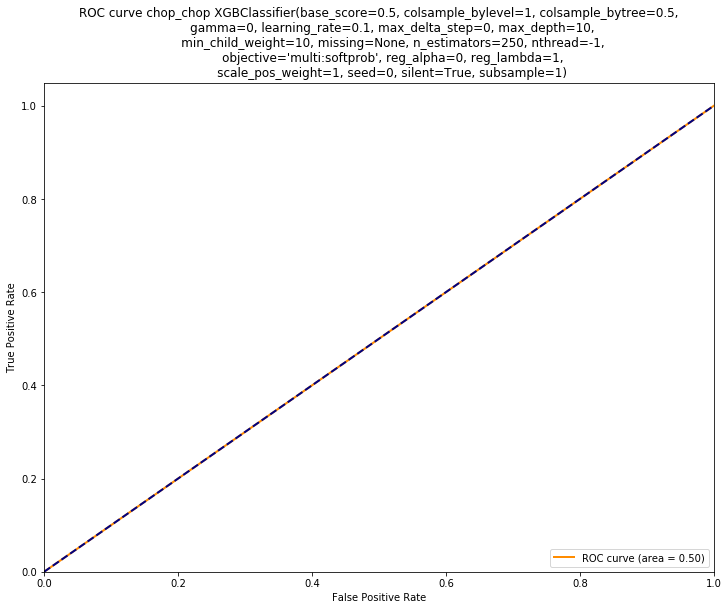

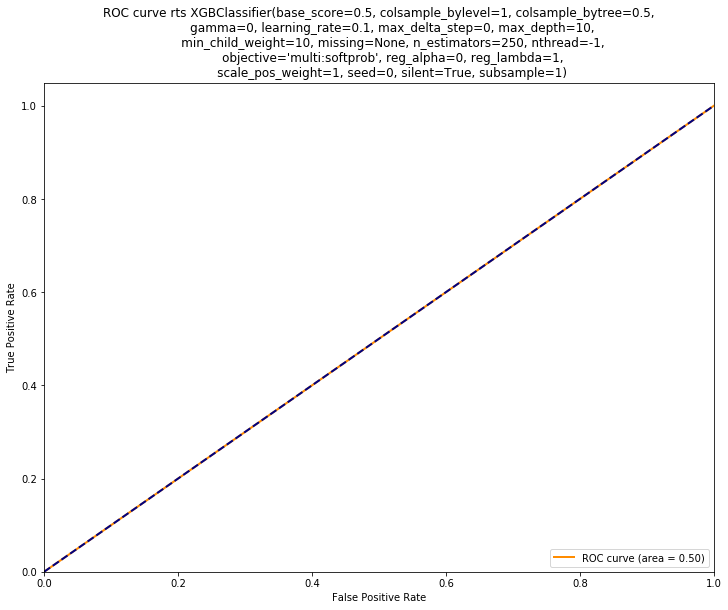

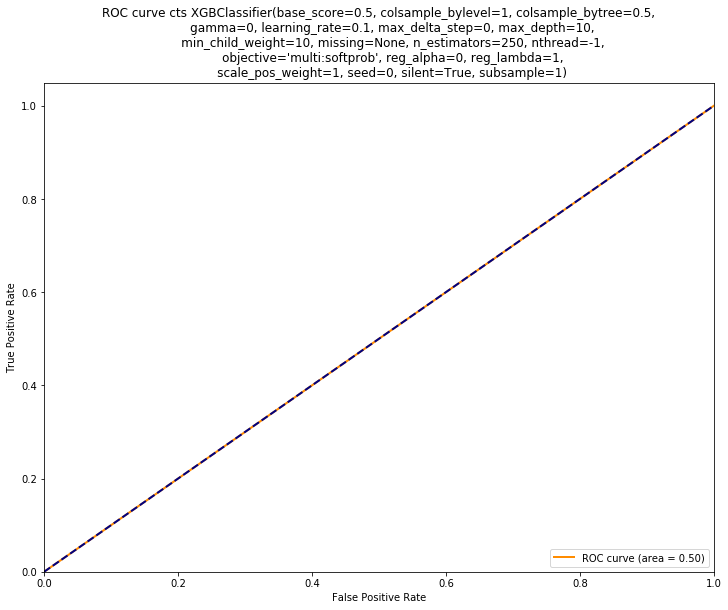

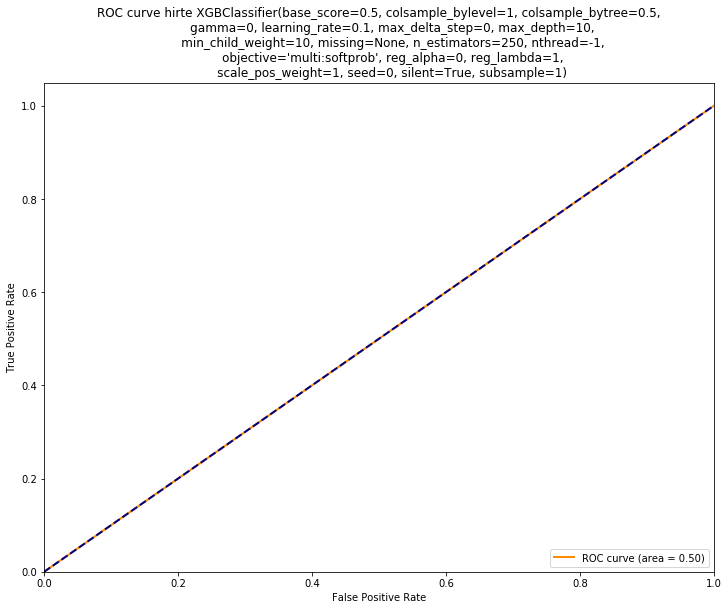

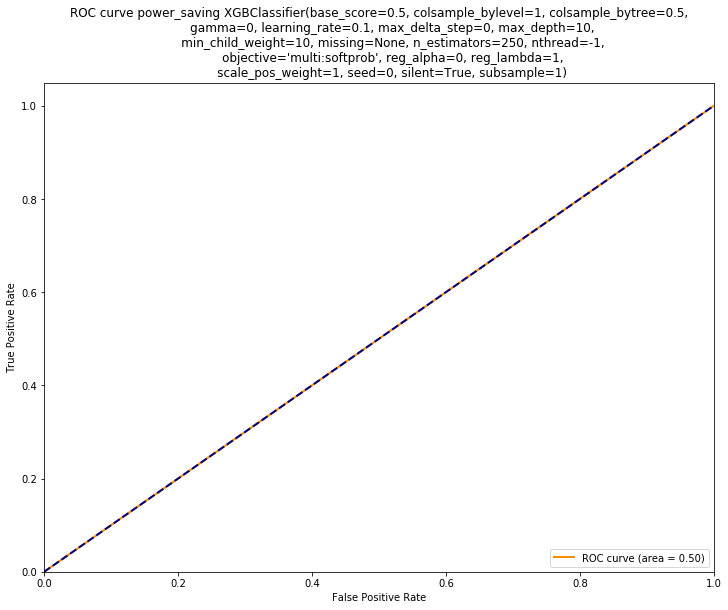

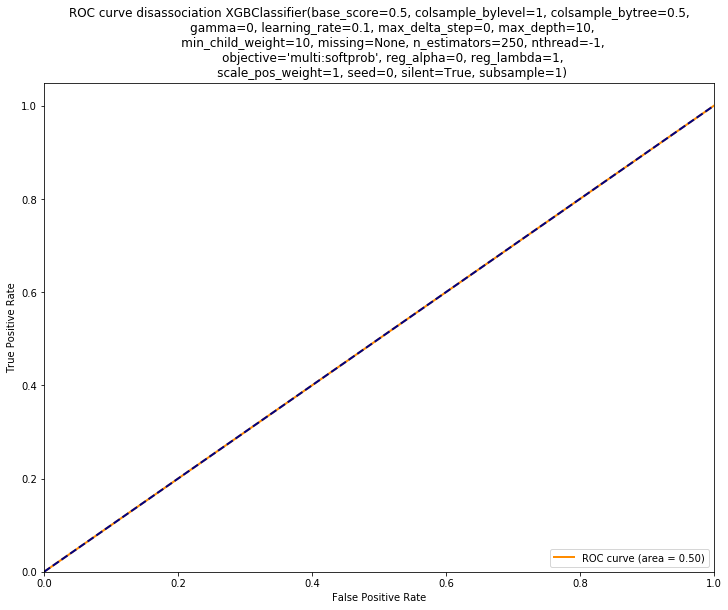

In [23]:
nest = [50,100,250]
maxde = [3,5,10]
learnrate = [0.1]
minchild = [10]
subsampl = [1]
from sklearn.externals import joblib
for subs in subsampl:
    for minc in minchild:
        for lra in learnrate:
            for maxd in maxde:
                for nes in nest:
                    model = xgboost.XGBClassifier(n_estimators = nes, max_depth=maxd, min_child_weight=minc, subsample=subs, colsample_bytree=0.5, learning_rate=lra)
                    model.fit(X, Y, eval_metric='auc')
                    joblib.dump(model, "nest" + str(nes) + "maxde" + str(maxd) + "xgb.joblib.dat")
                    y_pred = model.predict(X_tst)
                    classes = np.array([list(map(int,i)) for i in np.array(Y_tst)])
                    classes_pred = np.array([list(map(int,i)) for i in y_pred])
                    print(classification_report(list(map(np.argmax, y_pred)), list(map(np.argmax, Y_tst))))
                    accuracy = accuracy_score(list(map(np.argmax, y_pred)), list(map(np.argmax, Y_tst)))
                    print(accuracy)
                    fpr = dict()
                    tpr = dict()
                    roc_auc = dict()
                    for i in range(17):
                        fpr[i], tpr[i], _ = roc_curve(classes[:,i], classes_pred[:,i] )
                        roc_auc[i] = auc(fpr[i], tpr[i])
                        plt.figure(figsize=(12, 9))
                        lw = 2
                        plt.plot(fpr[i], tpr[i], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])
                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('ROC curve ' + class_list[i] + ' ' + str(model))
                        plt.legend(loc="lower right")
                        plt.show()
                        plt.close()

In [23]:
inp = Input(shape=(48,))
norm = BatchNormalization()(inp)
act = Activation("relu")(norm)
rshp = Reshape(target_shape=(1,48))(act)
conv1 = Conv1D(35, 3, strides=1, padding="same", activation="sigmoid", kernel_initializer=glorot_normal(42))(rshp)
conv2 = Conv1D(35, 5, strides=1, padding="same", activation="sigmoid", kernel_initializer=glorot_normal(42))(rshp)
conc = concatenate([conv1, conv2], axis=1)
flt = Flatten()(conc)
dense2 = Dense(70, activation="sigmoid", kernel_initializer=glorot_normal(42))(flt)
dense3 = Dense(17, activation="sigmoid", kernel_initializer=glorot_normal(42))(dense2)

In [56]:
inp2 = Input(shape=(48,))
norm = BatchNormalization()(inp2)
act = Activation("relu")(norm)
dense22 = Dense(12, activation="sigmoid")(act)
dense222 = Dense(18, activation="sigmoid")(dense22)
dense32 = Dense(17, activation="sigmoid")(dense222)

In [24]:
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
model1 = Model(inputs=inp, outputs=dense3)

In [35]:
plot_model(model2, "model2.png", show_shapes=False, show_layer_names=False)

In [57]:
model2 = Model(inputs=inp2, outputs=dense32)

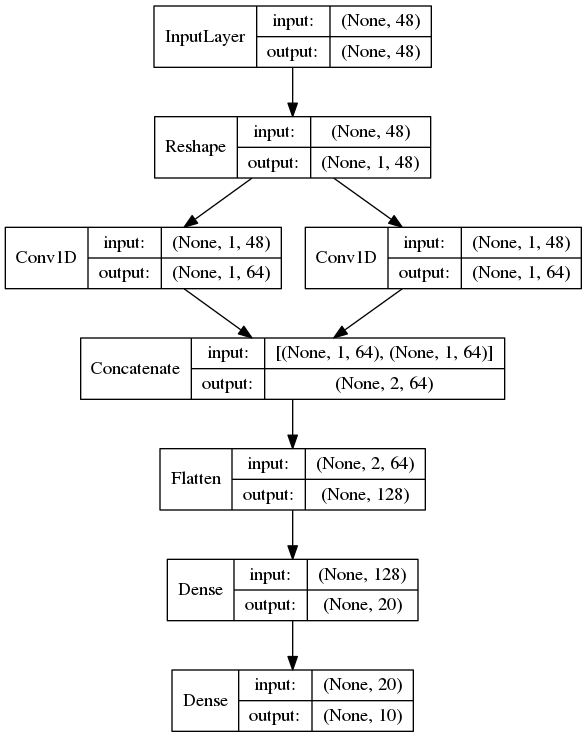

In [43]:
Image("model1.png")

In [58]:
model2.compile(optimizer=Adagrad(lr = 0.01), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [41]:
X.shape

(673638, 48)

In [26]:
Y

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ...,
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [29]:
trn_1 = trn_1.sample(frac=1.0)

In [59]:
history1 = model2.fit(
    X,
    Y.tolist(), batch_size=32,
    epochs=7, validation_split=0.0001, shuffle=True
)

Train on 673570 samples, validate on 68 samples
Epoch 1/7
673570/673570 [==============================] - 20s - loss: 0.4263 - categorical_accuracy: 0.8913 - val_loss: 0.0336 - val_categorical_accuracy: 1.0000
Epoch 2/7
673570/673570 [==============================] - 19s - loss: 0.1042 - categorical_accuracy: 0.9733 - val_loss: 0.0160 - val_categorical_accuracy: 1.0000
Epoch 3/7
673570/673570 [==============================] - 20s - loss: 0.0804 - categorical_accuracy: 0.9777 - val_loss: 0.0103 - val_categorical_accuracy: 1.0000
Epoch 4/7
673570/673570 [==============================] - 20s - loss: 0.0693 - categorical_accuracy: 0.9815 - val_loss: 0.0075 - val_categorical_accuracy: 1.0000
Epoch 5/7
673570/673570 [==============================] - 20s - loss: 0.0629 - categorical_accuracy: 0.9831 - val_loss: 0.0067 - val_categorical_accuracy: 1.0000
Epoch 6/7
673570/673570 [==============================] - 20s - loss: 0.0584 - categorical_accuracy: 0.9843 - val_loss: 0.0057 - val_cat

In [22]:
trn_1

frame.offset_shift  frame.time_epoch  frame.time_delta  \
3589053                 0.0      1.425012e+09          0.001159   
2925304                 0.0      1.425008e+09          0.003013   
483628                  0.0      1.393662e+09          0.000630   
2782766                 0.0      1.425006e+09          0.003608   
3541279                 0.0      1.425012e+09          0.001441   
2901822                 0.0      1.425008e+09          0.001224   
3014661                 0.0      1.425009e+09          0.001409   
2199185                 0.0      1.424922e+09          0.000020   
1490045                 0.0      1.393664e+09          0.000295   
3386815                 0.0      1.425011e+09          0.003617   
33837                   0.0      1.393662e+09          0.003789   
402200                  0.0      1.393662e+09          0.000308   
2554043                 0.0      1.424926e+09          0.004604   
2786594                 0.0      1.425006e+09          0.001985   
2793039                 0.0      1.425006e+09          0.001578   
894384                  0.0      1.393663e+09          0.001107   
792671                  0.0      1.393663e+09          0.001111   
464876                  0.0      1.393662e+09          0.000565   
2493862                 0.0      1.424925e+09          0.007947   
3203612                 0.0      1.425011e+09          0.001782   
105874                  0.0      1.393662e+09          0.000382   
2037210                 0.0      1.424920e+09          0.015420   
404992                  0.0      1.393662e+09          0.000345   
2864324                 0.0      1.425008e+09          0.006860   
163647                  0.0      1.393662e+09          0.000500   
1741883                 0.0      1.393665e+09          0.007281   
1208464                 0.0      1.393663e+09          0.000402   
1044563                 0.0      1.393663e+09          0.003064   
2908495                 0.0      1.425008e+09          0.002689   
203026                  0.0      1.393662e+09          0.000467   
...                     ...               ...               ...   
3530409                 0.0      1.425012e+09          0.001544   
1919486                 0.0      1.424916e+09          0.002592   
2253882                 0.0      1.424924e+09          0.001635   
1548762                 0.0      1.393664e+09          0.001454   
917040                  0.0      1.393663e+09          0.000622   
2583384                 0.0      1.424927e+09          0.006576   
1307371                 0.0      1.393664e+09          0.000768   
989436                  0.0      1.393663e+09          0.000196   
1470485                 0.0      1.393664e+09          0.000795   
1396025                 0.0      1.393664e+09          0.000808   
2281931                 0.0      1.424924e+09          0.001051   
1262752                 0.0      1.393664e+09          0.001573   
3381524                 0.0      1.425011e+09          0.001412   
103355                  0.0      1.393662e+09          0.000669   
791743                  0.0      1.393663e+09          0.004391   
3344769                 0.0      1.425011e+09          0.002022   
1825573                 0.0      1.424914e+09          0.002759   
327069                  0.0      1.393662e+09          0.000474   
1766891                 0.0      1.393665e+09          0.001564   
1370455                 0.0      1.393664e+09          0.023543   
787201                  0.0      1.393663e+09          0.041583   
3210548                 0.0      1.425011e+09          0.001192   
329365                  0.0      1.393662e+09          0.000813   
2138242                 0.0      1.424922e+09          0.002651   
278167                  0.0      1.393662e+09          0.000760   
1239911                 0.0      1.393664e+09          0.002079   
2272355                 0.0      1.424924e+09          0.012760   
3009908                 0.0      1.425009e+09          0

In [60]:
tst_1 = pd.read_csv("1tst")
tst_1.drop(to_drop2, axis=1, inplace=True)
tst_1 = tst_1.replace("?", -1)
for a in tst_1.columns:
    if a != "class":
        try:
            tst_1[a] = tst_1[a].apply(float)
        except:
            tst_1[a] = tst_1[a].apply(lambda x: float(int(str(x), base=16)))
        finally:
            pass

for a in bools:
    if a in tst_1.columns:
        tst_1[a+".is0"] = tst_1[a].apply(lambda x: 1 if x == 0 else 0)
        tst_1[a+".is1"] = tst_1[a].apply(lambda x: 1 if x == 1 else 0)
        tst_1[a+".is-1"] = tst_1[a].apply(lambda x: 1 if x == -1 else 0)
    
tst_1.drop(bools, axis=1, inplace=True,errors='ignore')
tst_1["class_1h"] = tst_1["class"].apply(lambda x: encode(x, 0))
tst_1.drop(["class"], axis=1, inplace=True)
X_tst = tst_1[tst_1.columns[[a != "class_1h" for a in tst_1.columns]]].values
Y_tst = tst_1["class_1h"].values
del tst_1
class_list = ["normal","arp","cafe_latte","amok","deauthentication","authentication_request","evil_twin", "beacon","probe_response","fragmentation",
        "probe_request","chop_chop","rts","cts","hirte","power_saving","disassociation"]

/home/a/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       0.98      0.98      0.98    532542
          1       0.59      0.97      0.73      8295
          2       0.00      0.00      0.00       167
          3       0.80      0.27      0.40      1420
          4       0.85      0.72      0.78      5282
          5       0.00      0.00      0.00       255
          6       0.00      0.00      0.00         0
          7       1.00      1.00      1.00       599
          8       0.00      0.00      0.00      1796
          9       0.85      0.01      0.01     25287
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       0.96      0.93      0.93  

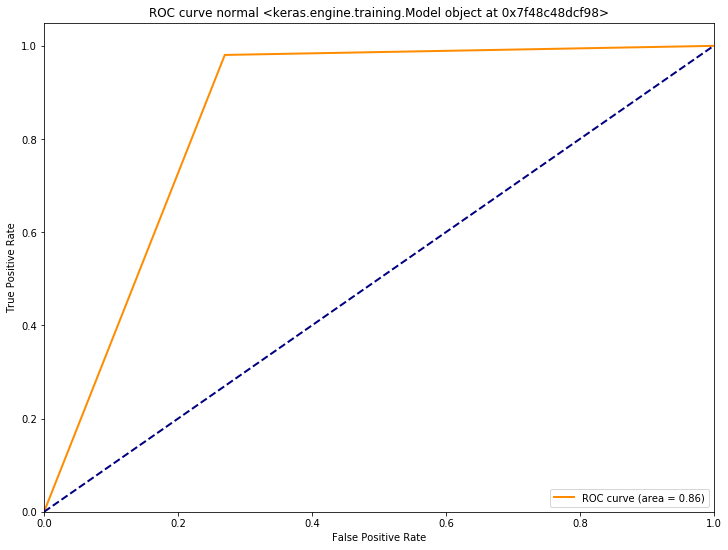

[  0.00000000e+00   4.44840649e-04   1.00000000e+00] [ 0.          0.58963647  1.        ]


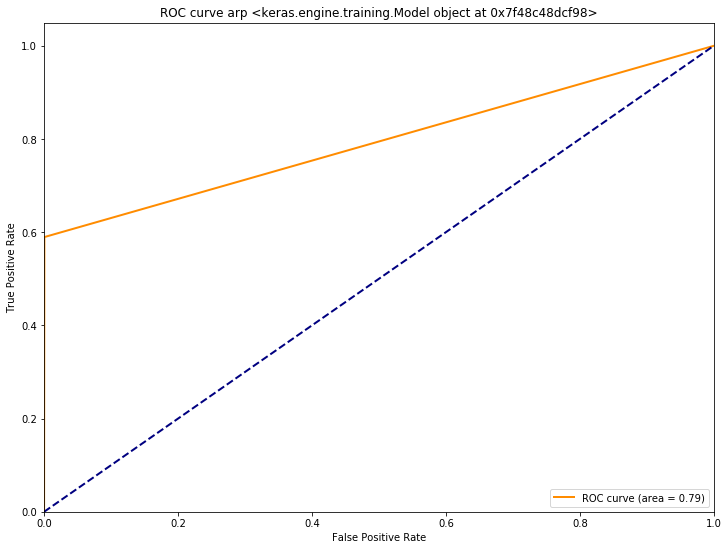

[  0.00000000e+00   2.90301496e-04   1.00000000e+00] [ 0.  0.  1.]


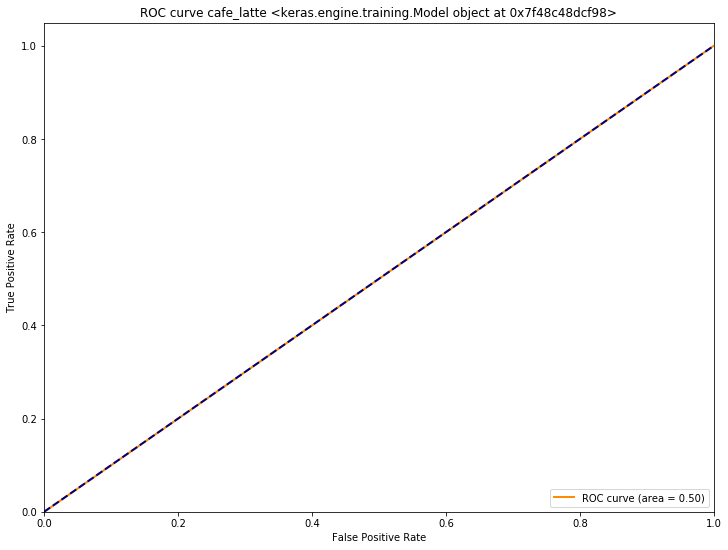

[ 0.          0.00180817  1.        ] [ 0.         0.7966457  1.       ]


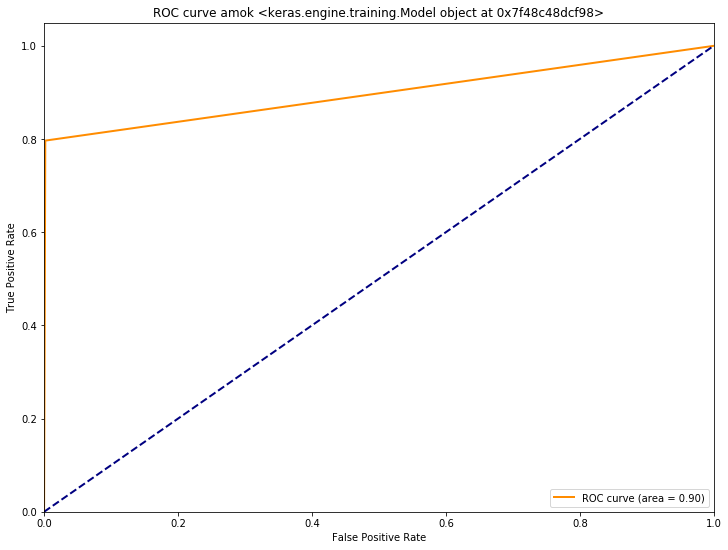

[ 0.          0.00260505  1.        ] [ 0.          0.85354331  1.        ]


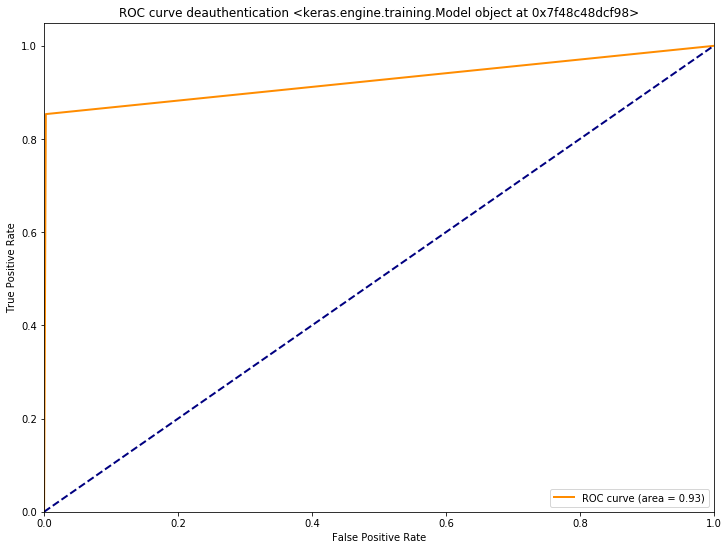

[  0.00000000e+00   4.42982890e-04   1.00000000e+00] [ nan  nan  nan]


/home/a/.local/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


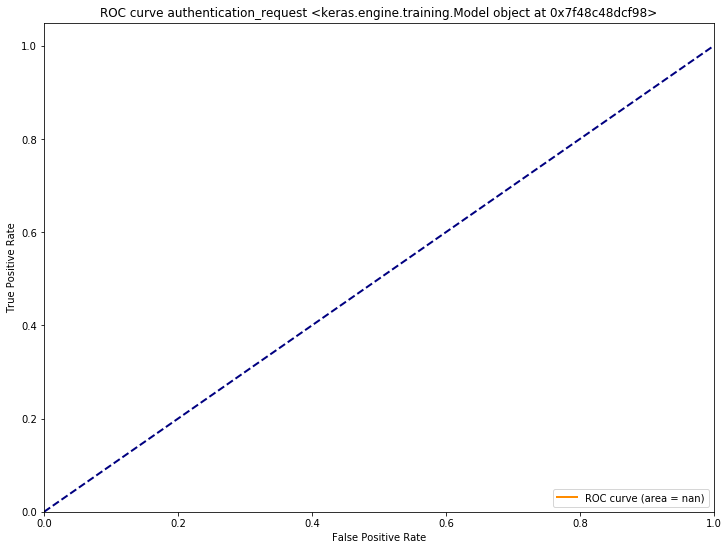

[ 0.  1.] [ 0.  1.]


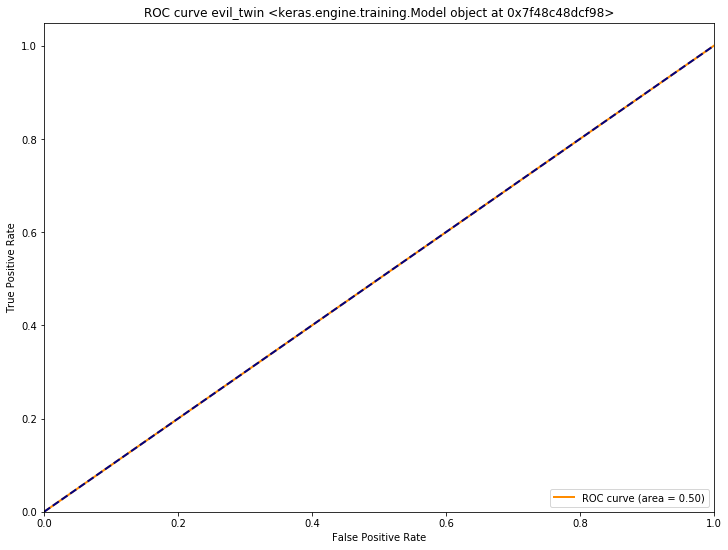

[  0.00000000e+00   1.73899736e-06   1.00000000e+00] [ 0.          0.99833055  1.        ]


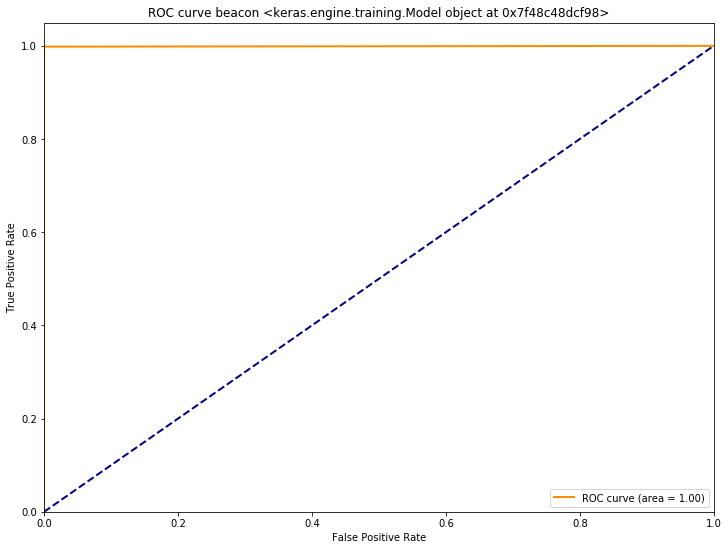

[ 0.          0.00311999  1.        ] [ nan  nan  nan]


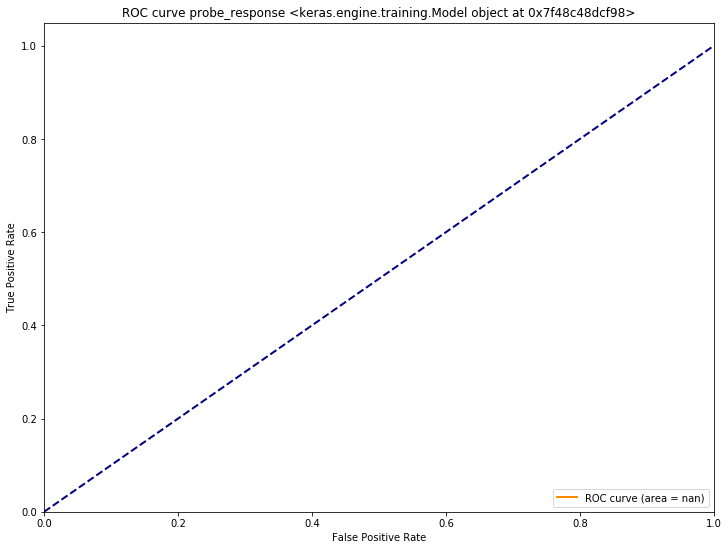

[ 0.          0.04369426  1.        ] [ 0.         0.8502994  1.       ]


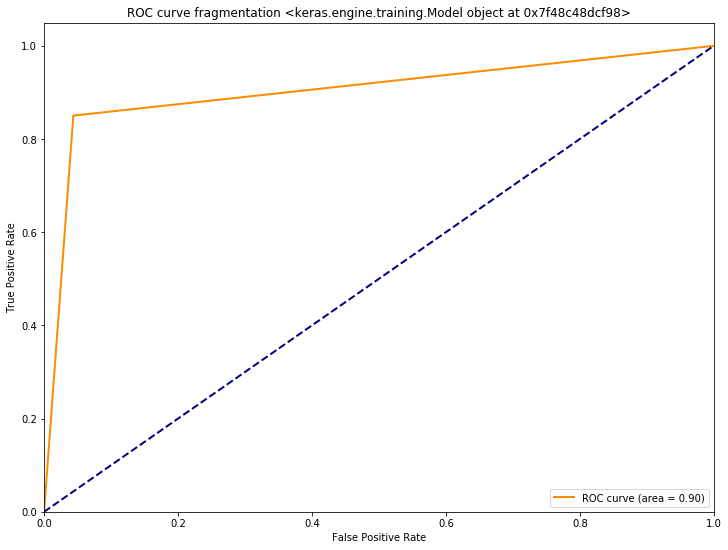

[ 0.  1.] [ 0.  1.]


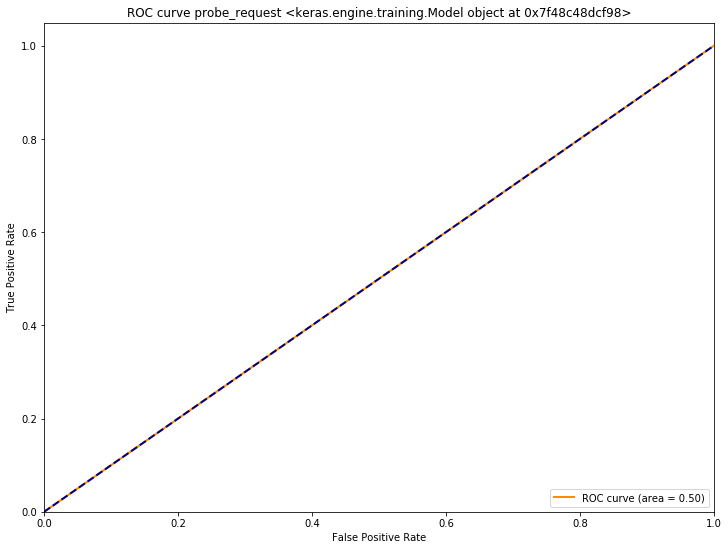

[ 0.  1.] [ 0.  1.]


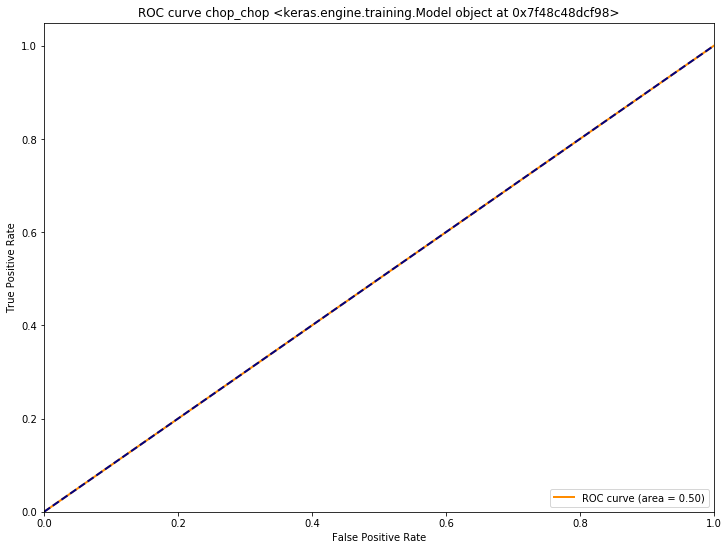

[ 0.  1.] [ 0.  1.]


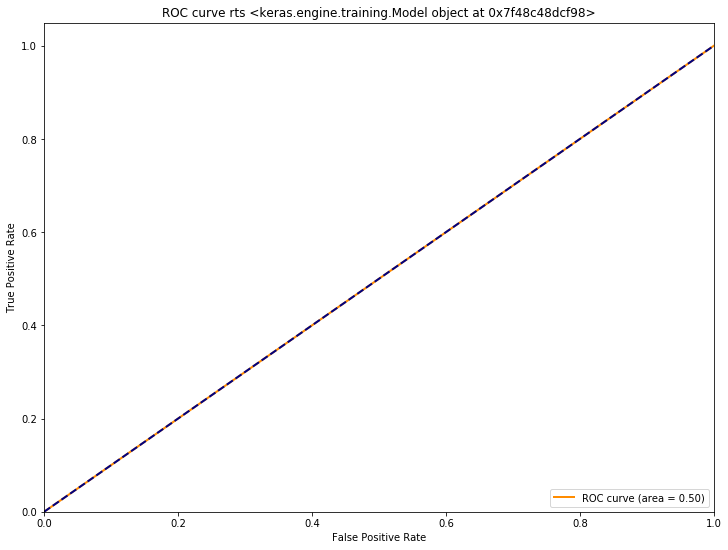

[ 0.  1.] [ 0.  1.]


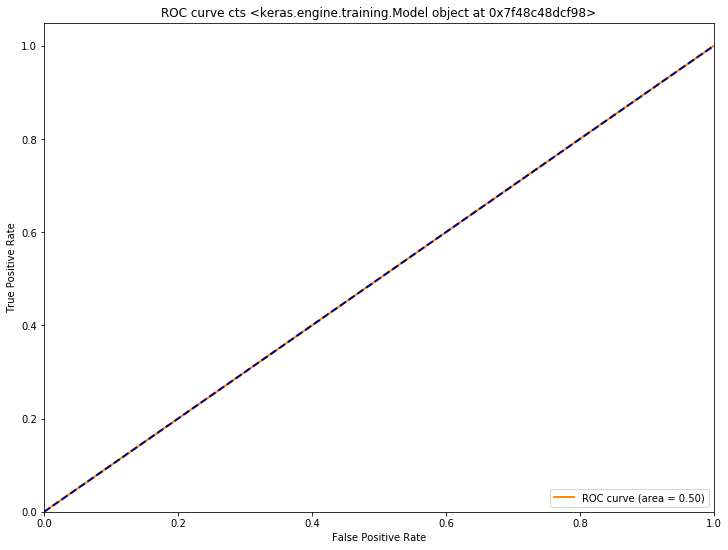

[ 0.  1.] [ 0.  1.]


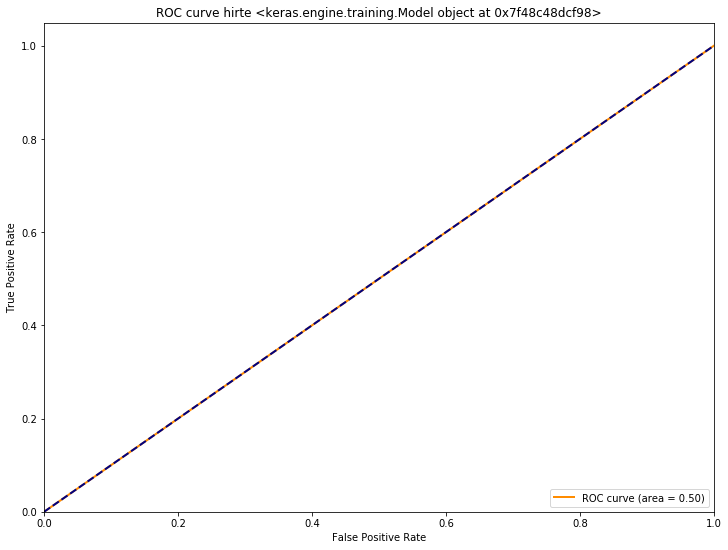

[ 0.  1.] [ 0.  1.]


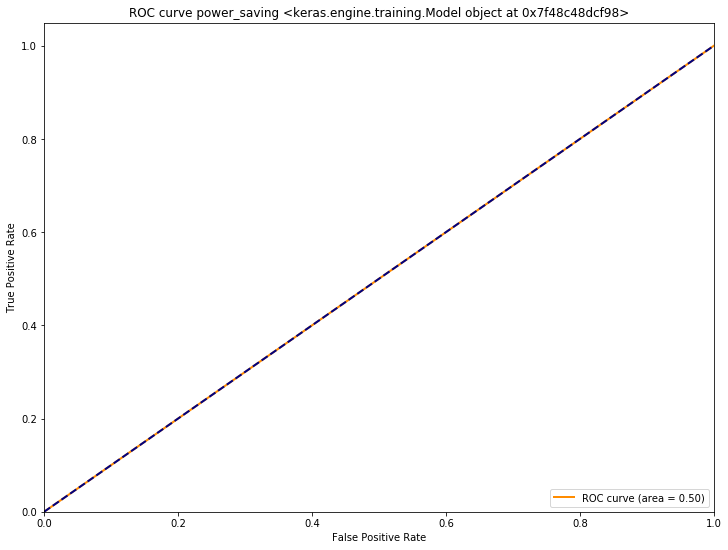

[ 0.  1.] [ 0.  1.]


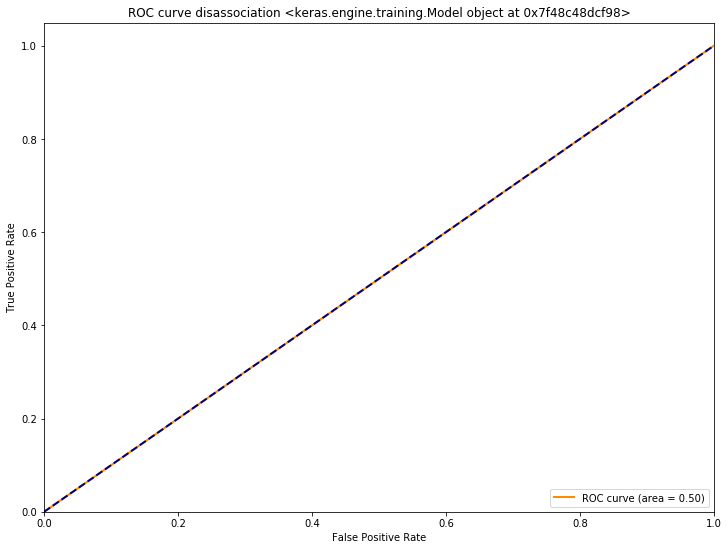

In [61]:
y_pred = model2.predict(X_tst)
y_classes = list(map(np.argmax, y_pred))
classes = np.array([list(map(int,i)) for i in np.array(Y_tst)])


A = {
        0 :  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        1 :  [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        2 :  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        3 :  [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        4 :  [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
        5 :  [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
        6 :  [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
        7 :  [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
        8 :  [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
        9 :  [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
        10 : [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
        11 : [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
        12 : [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
        13 : [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
        14 : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
        15 : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
        16 : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
    }

y_classes_list = [A[i] for i in y_classes]
classes_pred = np.array([list(map(int,i)) for i in y_classes_list])

print(classification_report(list(map(np.argmax, y_pred)), list(map(np.argmax, Y_tst))))
accuracy = accuracy_score(list(map(np.argmax, y_pred)), list(map(np.argmax, Y_tst)))
print(accuracy)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(17):
    fpr[i], tpr[i], _ = roc_curve(classes[:,i], classes_pred[:,i] )
    print(fpr[i], tpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(12, 9))
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve ' + class_list[i] + ' ' + str(model2))
    plt.legend(loc="lower right")
    plt.show()
    plt.close()

In [151]:
print(y_classes)

17251907


In [62]:
from keras.models import load_model
model1.save('seq1.h5') 